In [6]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import random
import matplotlib.pyplot as plt

Running a single simulation...

===== Simulation Results =====

Bid values:
User	R1	R2	R3	R4	R5	
u1	0.9	13.5	12.6	15.3	15.8	
u2	9.8	7.2	2.4	9.6	13.1	
u3	4.9	13.0	9.7	8.3	11.1	
u4	9.6	3.8	11.1	12.4	12.0	
u5	17.4	7.3	12.5	8.9	17.9	
u6	9.2	10.5	15.0	13.8	6.7	
u7	11.5	18.7	0.4	13.2	16.6	
u8	10.1	14.0	7.1	8.0	3.5	
u9	18.0	14.8	9.9	12.3	9.4	
u10	18.3	3.2	1.5	9.8	12.3	

Resource Allocations:
Resource r1 is allocated to User u10
Resource r2 is allocated to User u7
Resource r3 is allocated to User u6
Resource r4 is allocated to User u1
Resource r5 is allocated to User u5

User Payments:
User u1 pays 13.81
User u2 pays 0.00
User u3 pays 0.00
User u4 pays 0.00
User u5 pays 16.58
User u6 pays 12.61
User u7 pays 14.77
User u8 pays 0.00
User u9 pays 0.00
User u10 pays 17.98

Executing quantum job using allocated resources...
Quantum Circuit:
     ┌───┐                             ┌─┐   
q_0: ┤ H ├──■────■───────■───────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐  │       │     └╥┘   
q_1: ─────┤ X ├──┼──┤M

/tmp/ipykernel_3998/4269279969.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))



===== Aggregate Results =====
Overall Average Winning Bid: 18.14
Overall Average Payment: 16.21


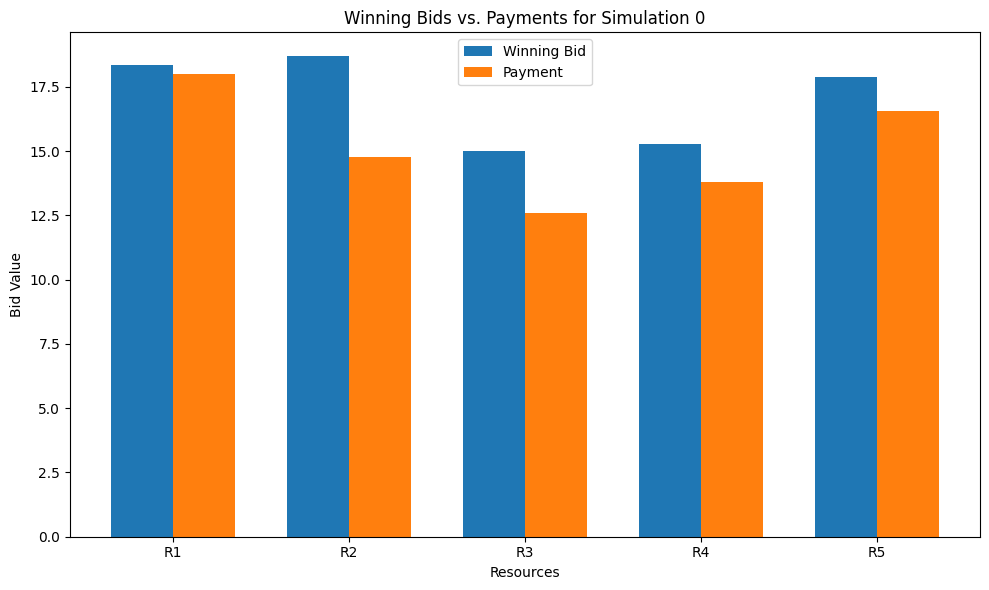

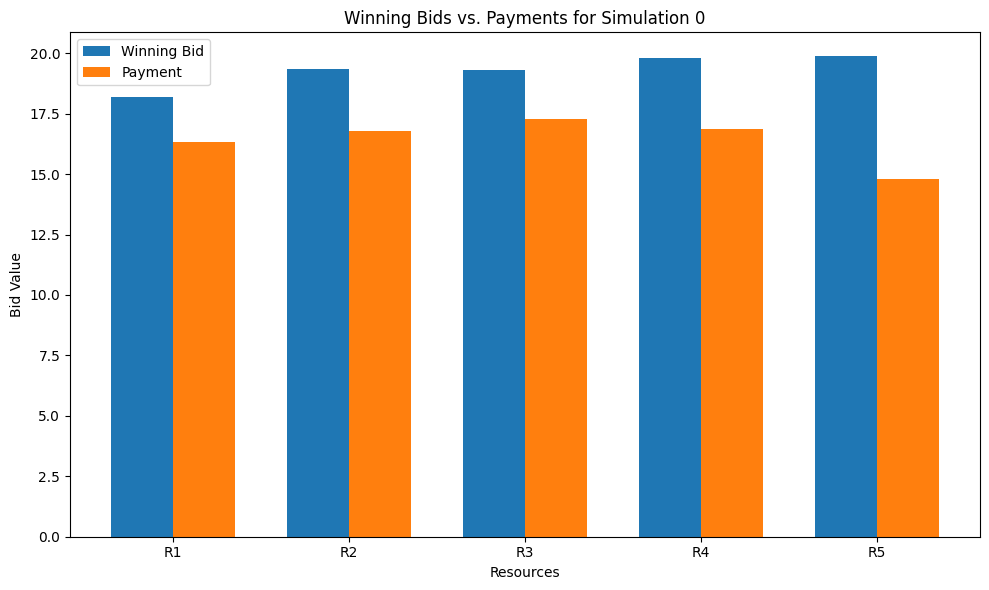

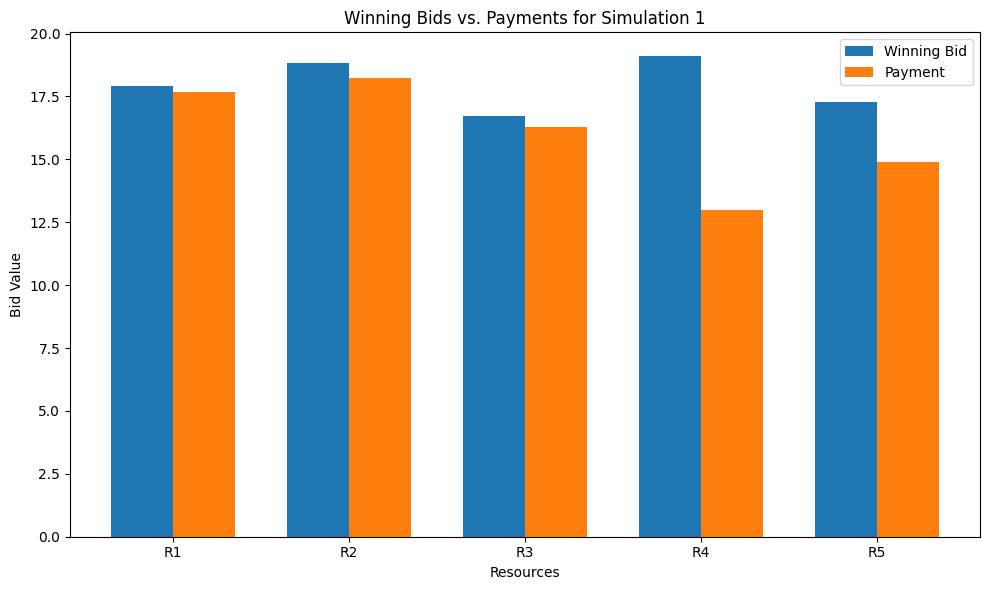

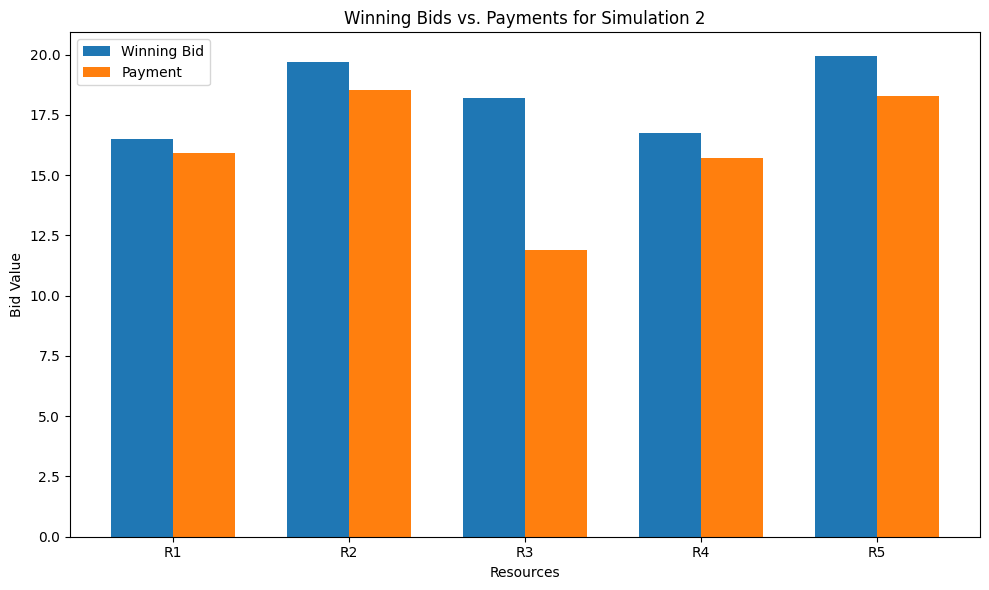

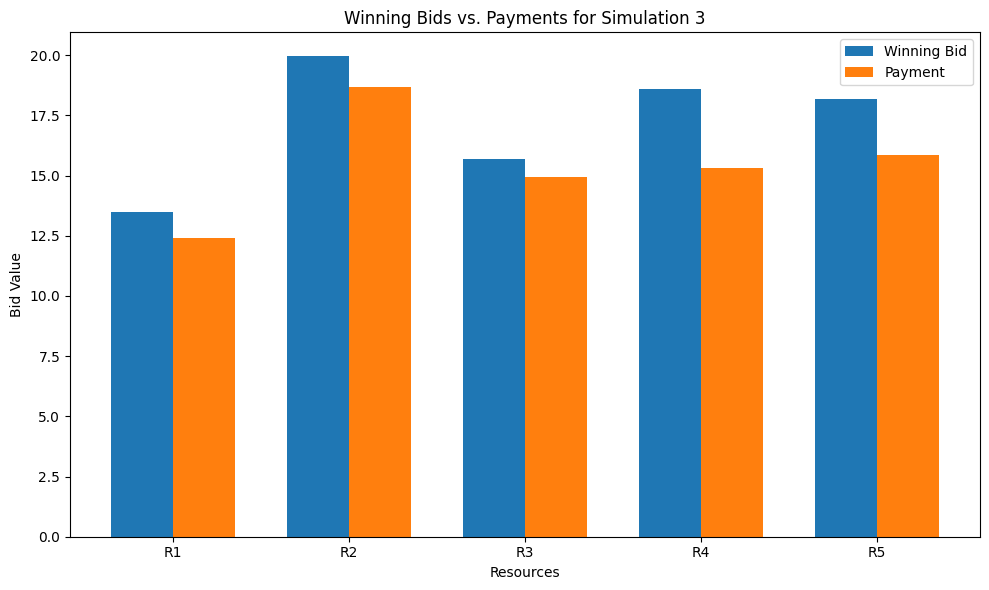

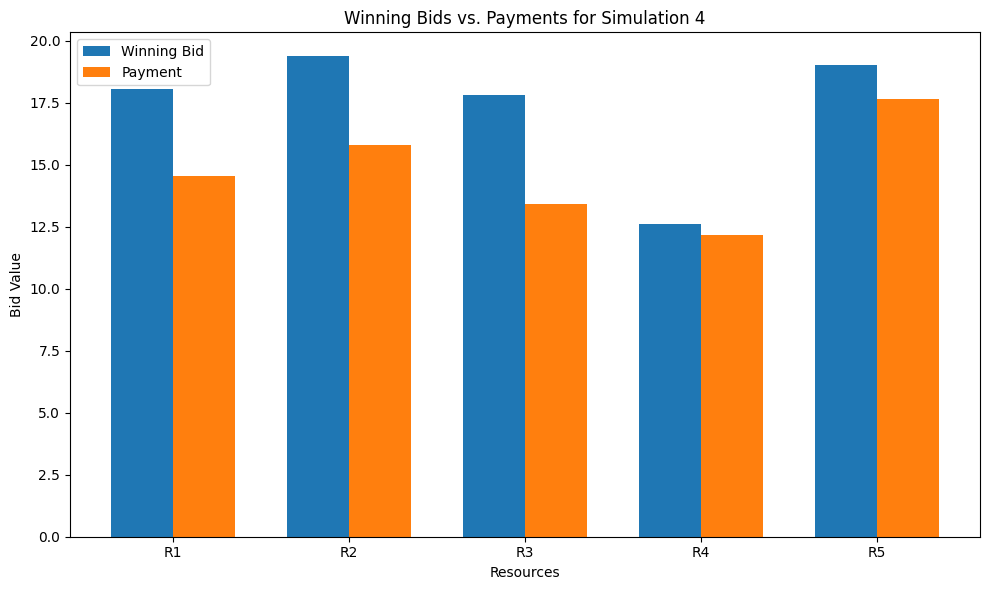

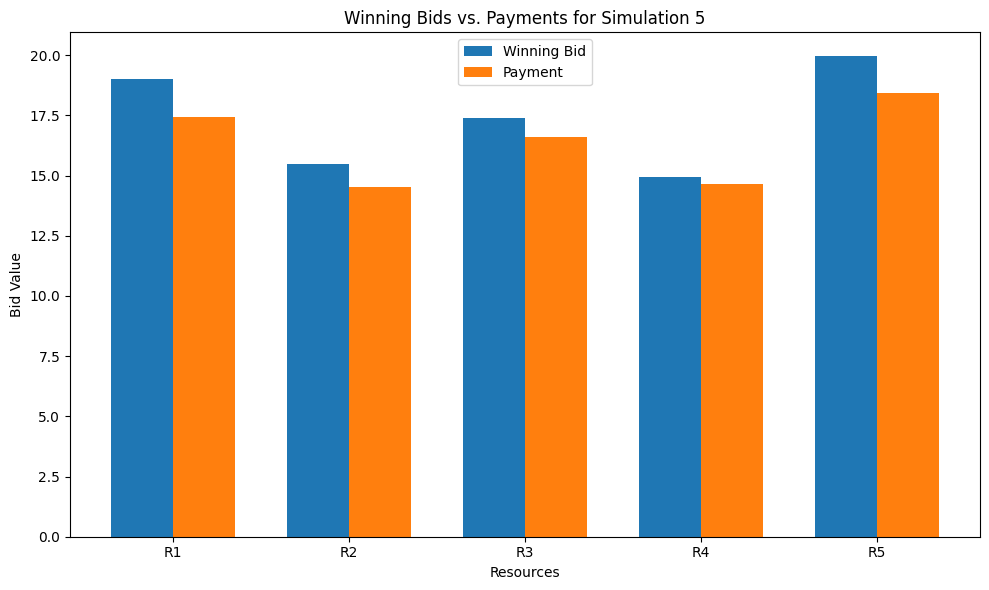

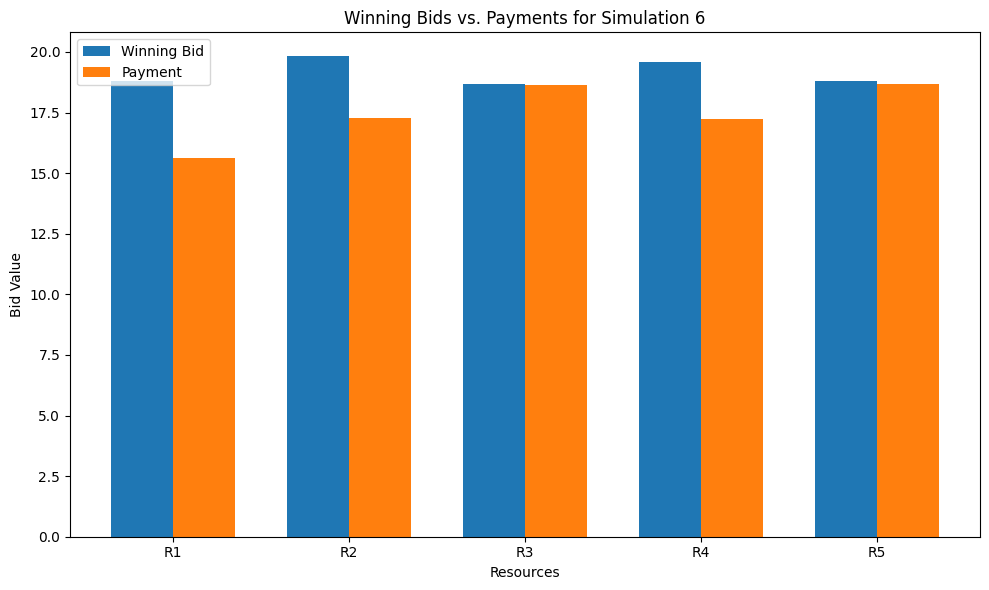

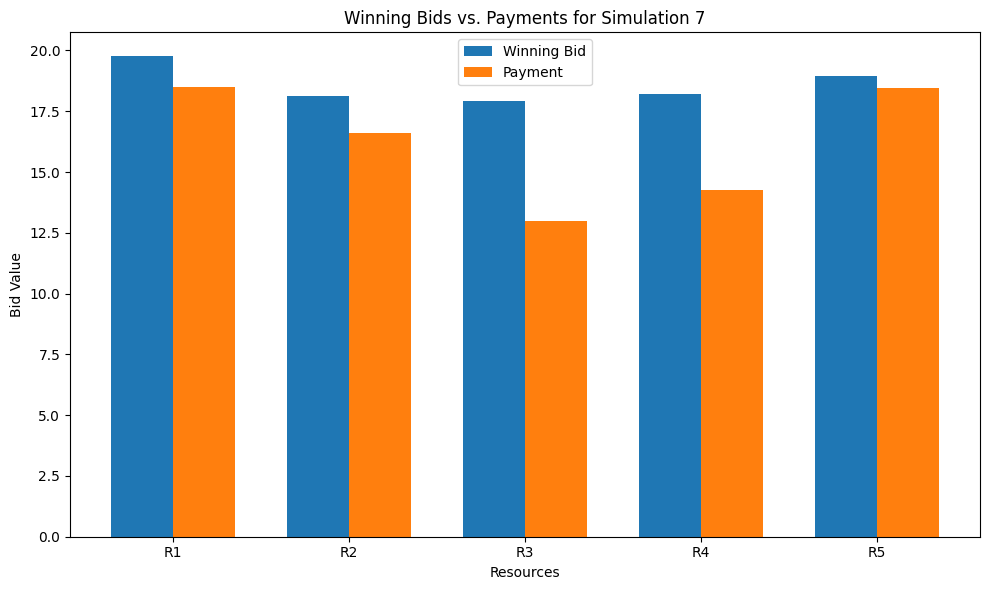

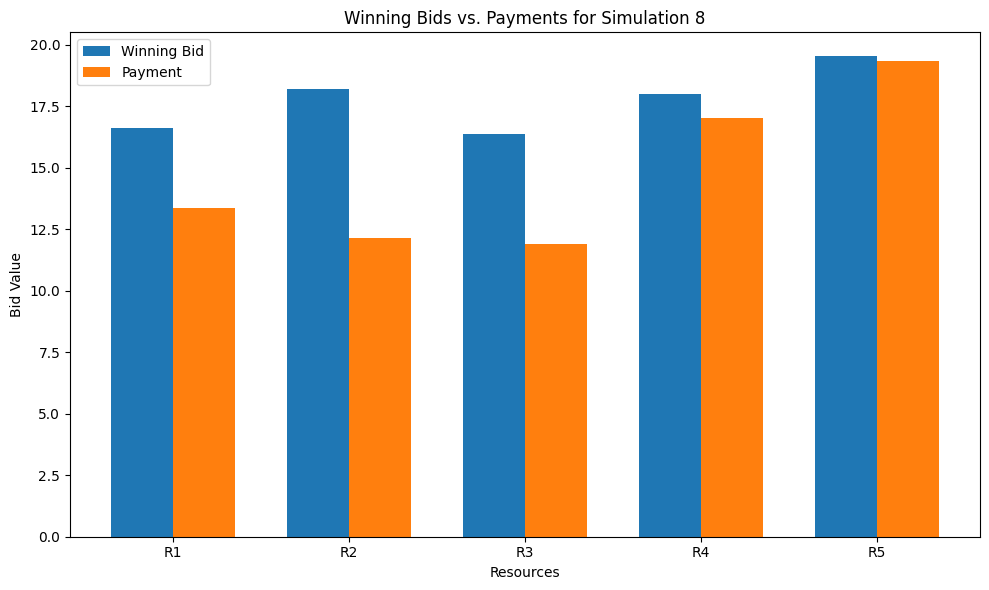

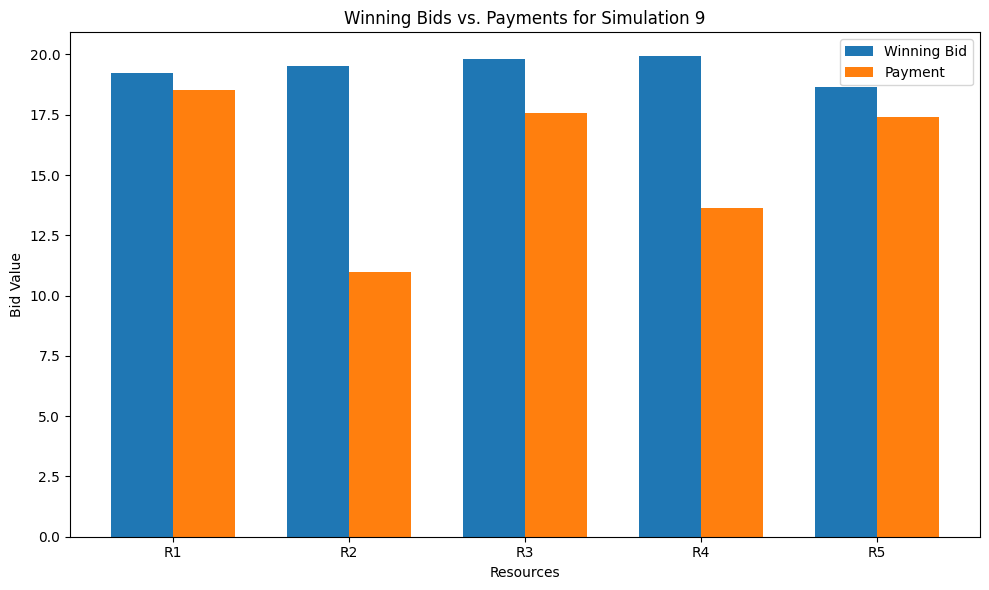

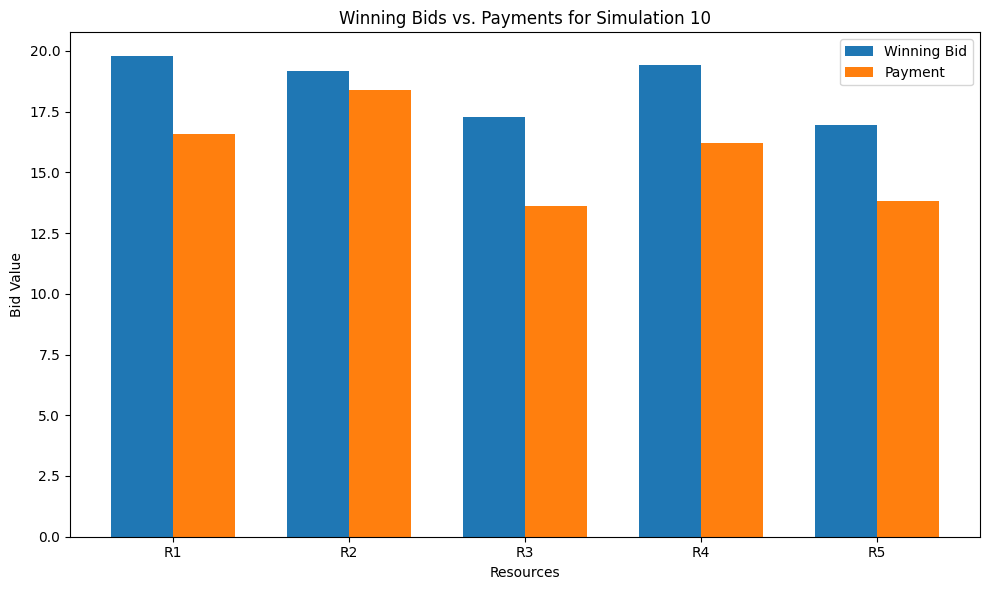

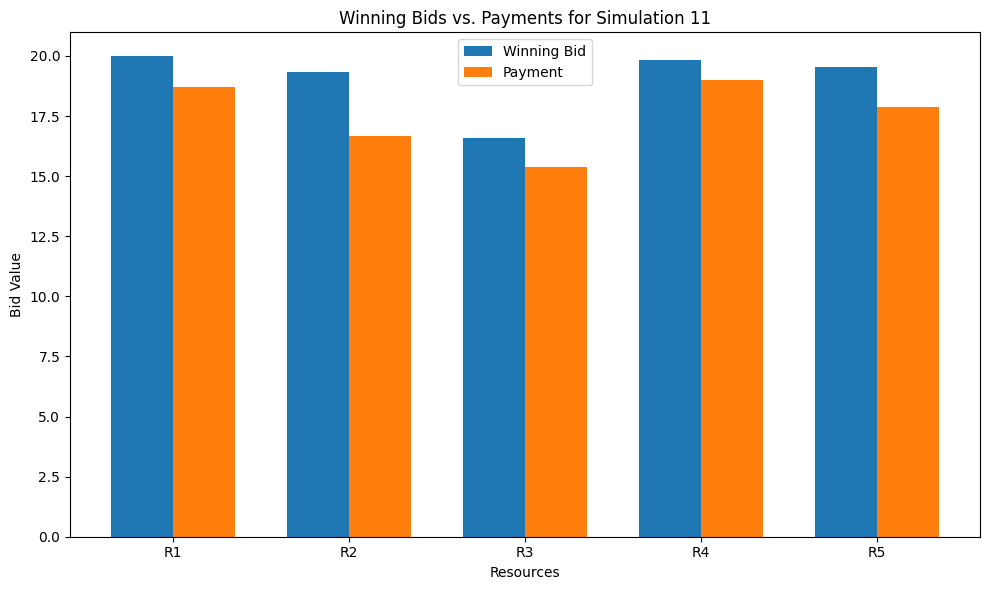

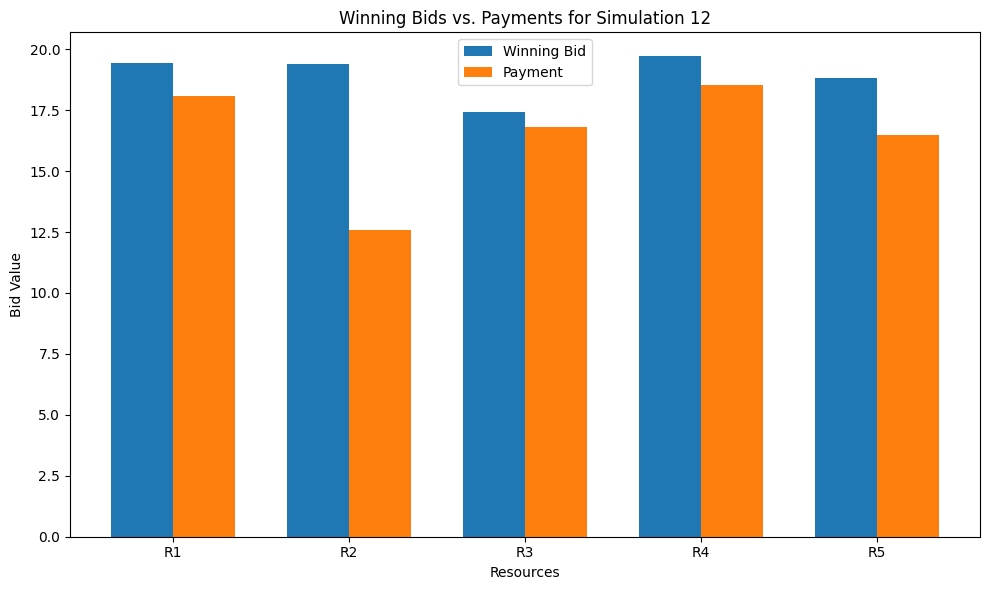

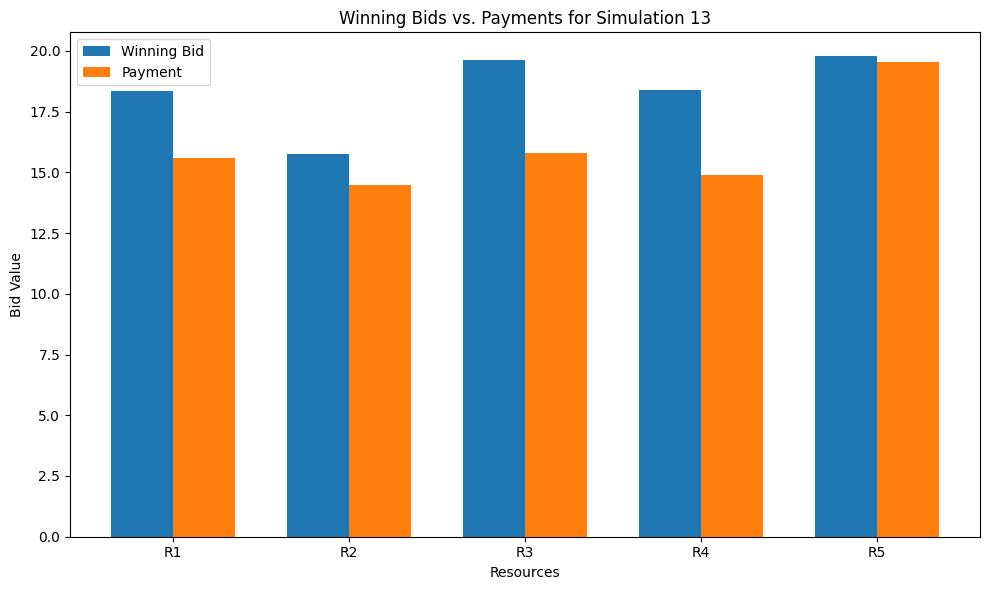

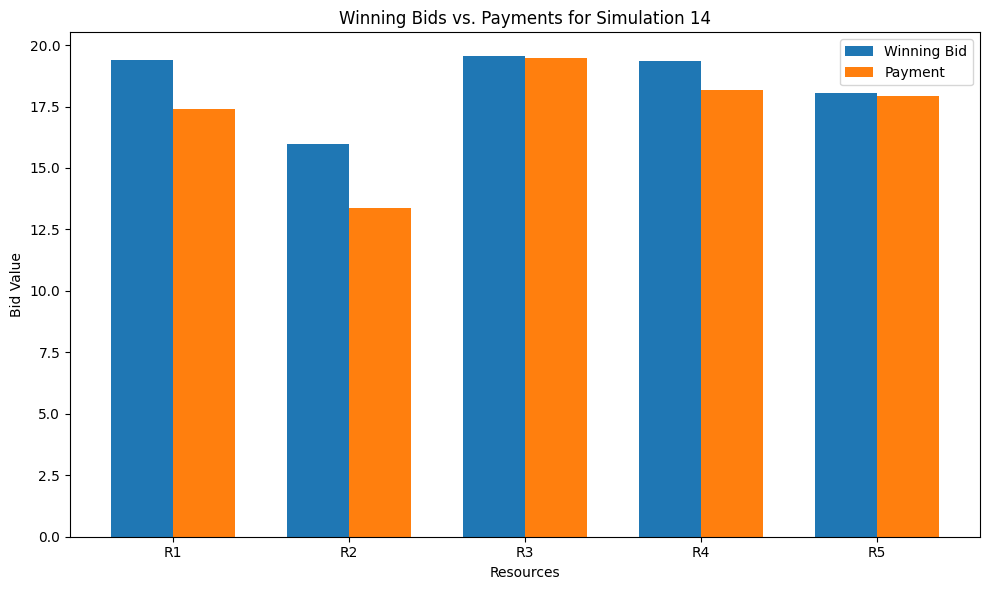

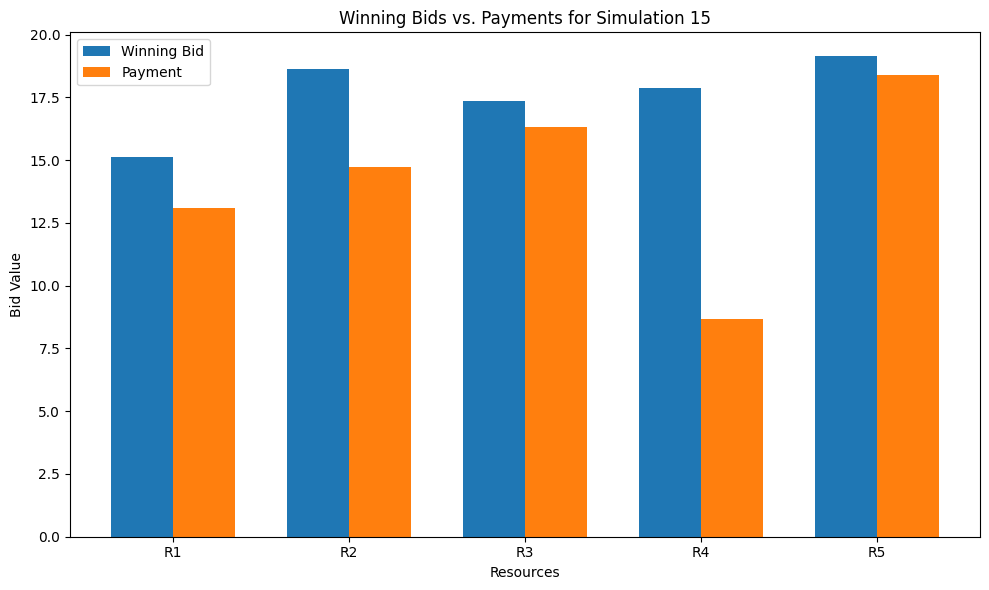

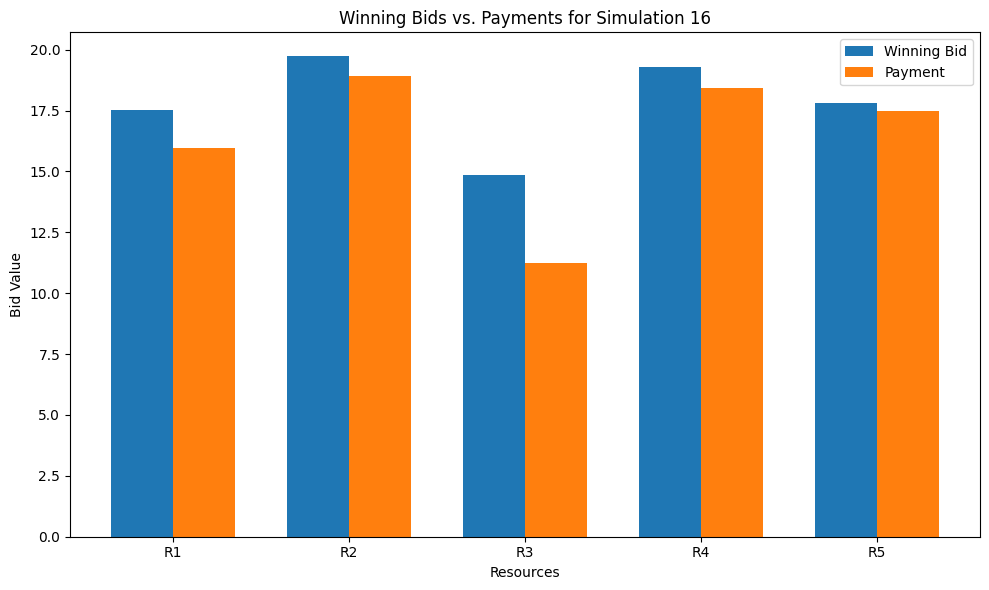

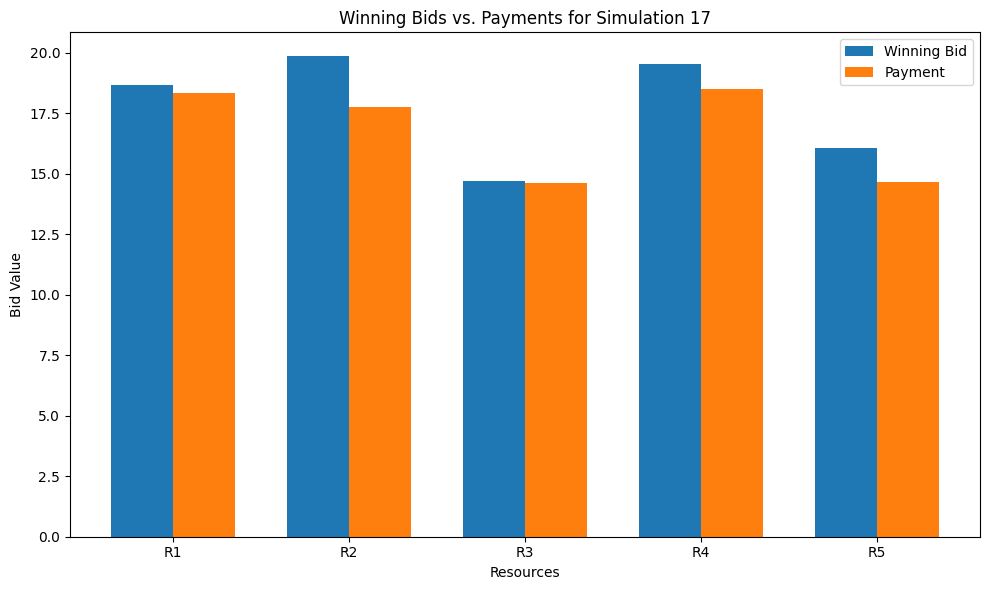

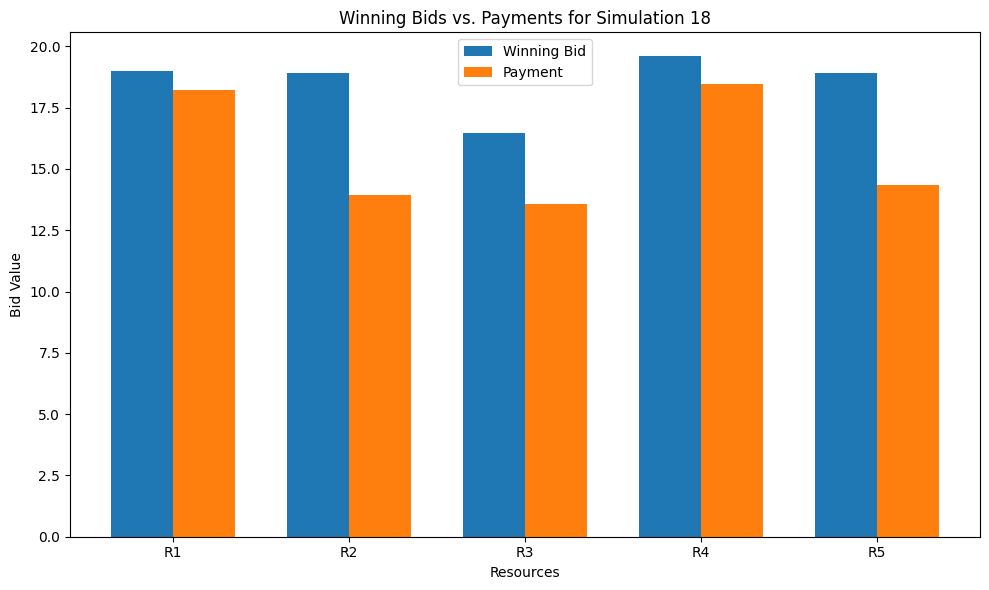

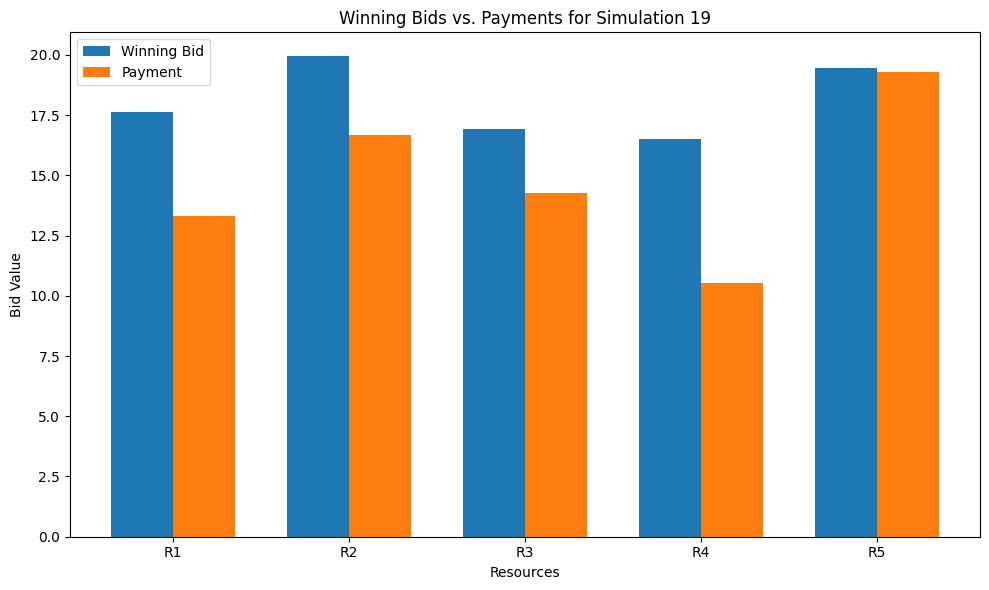

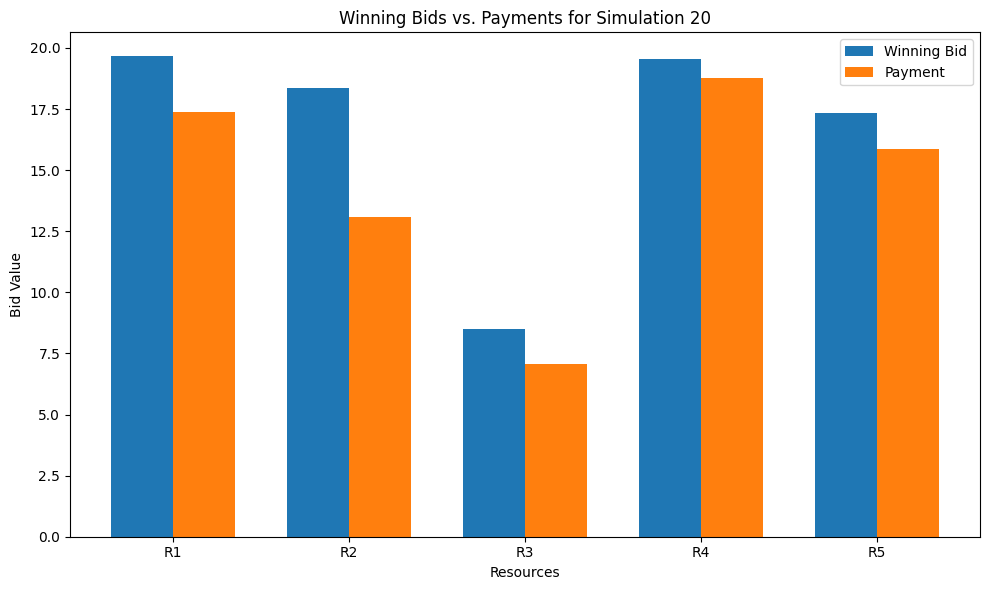

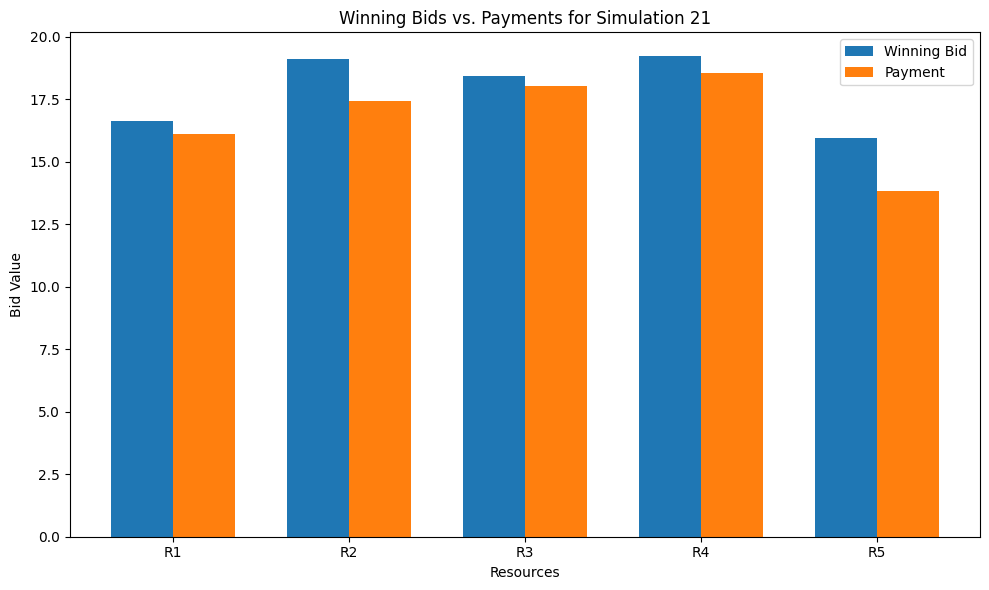

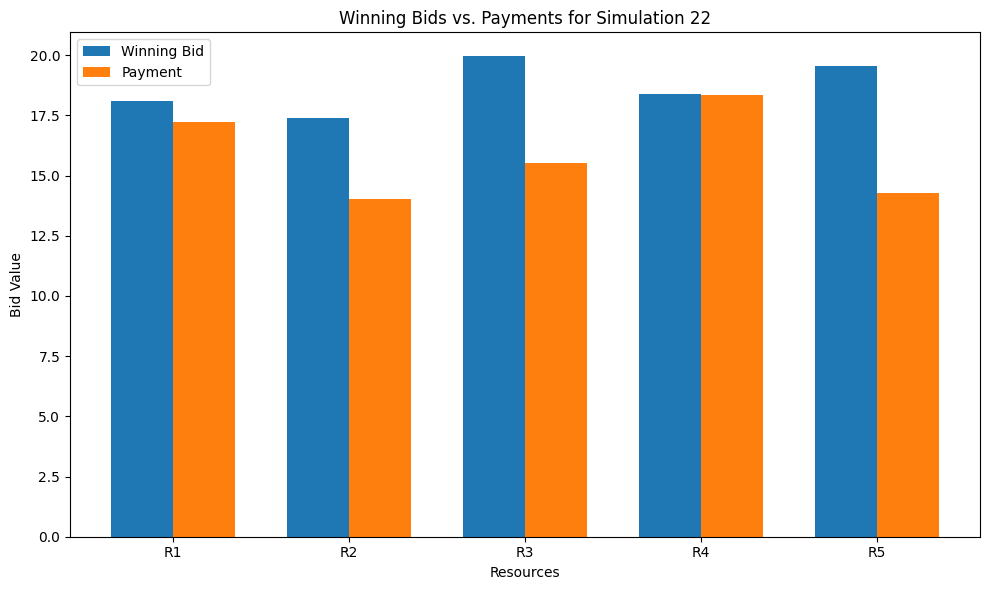

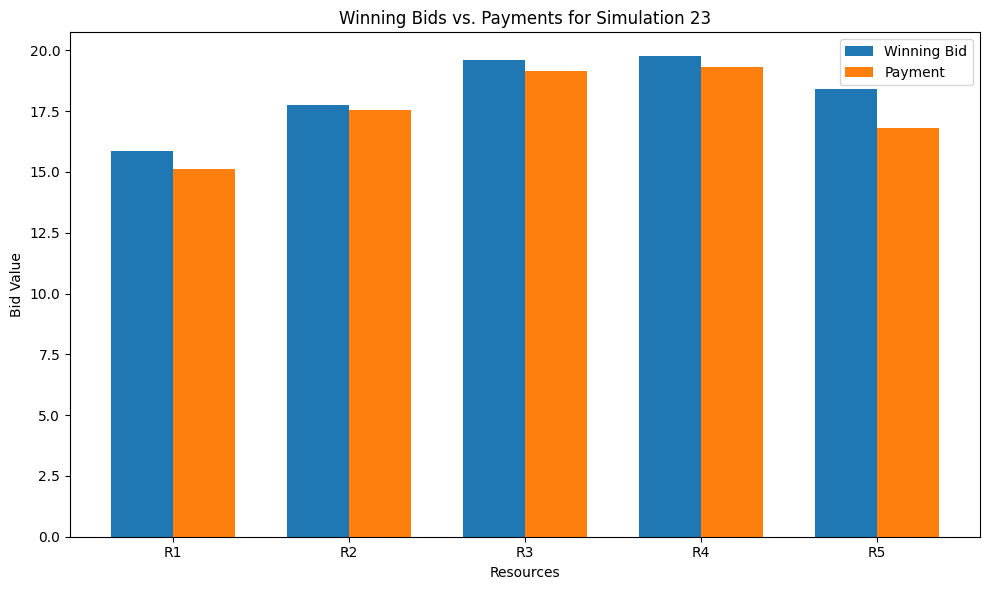

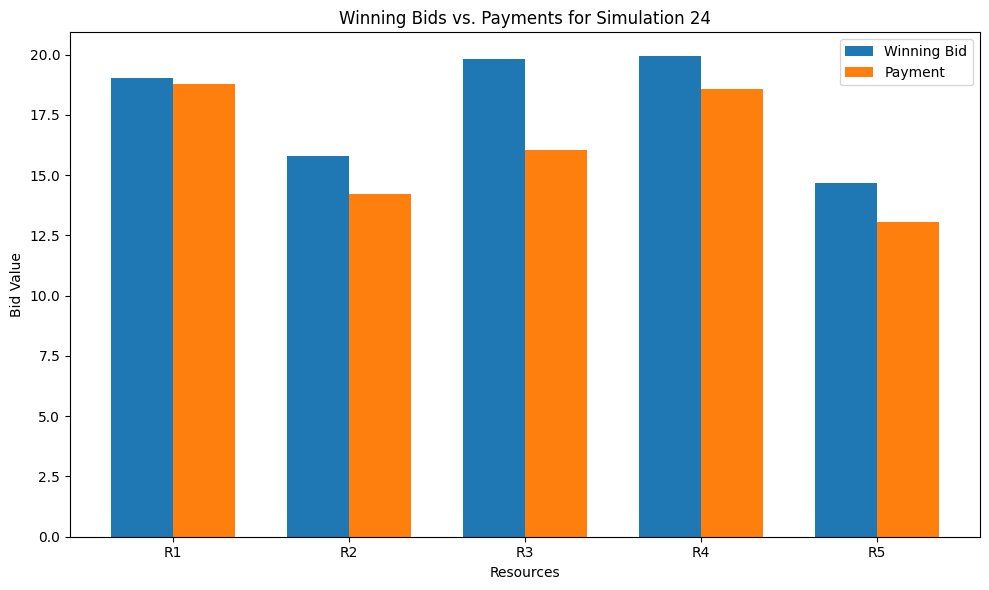

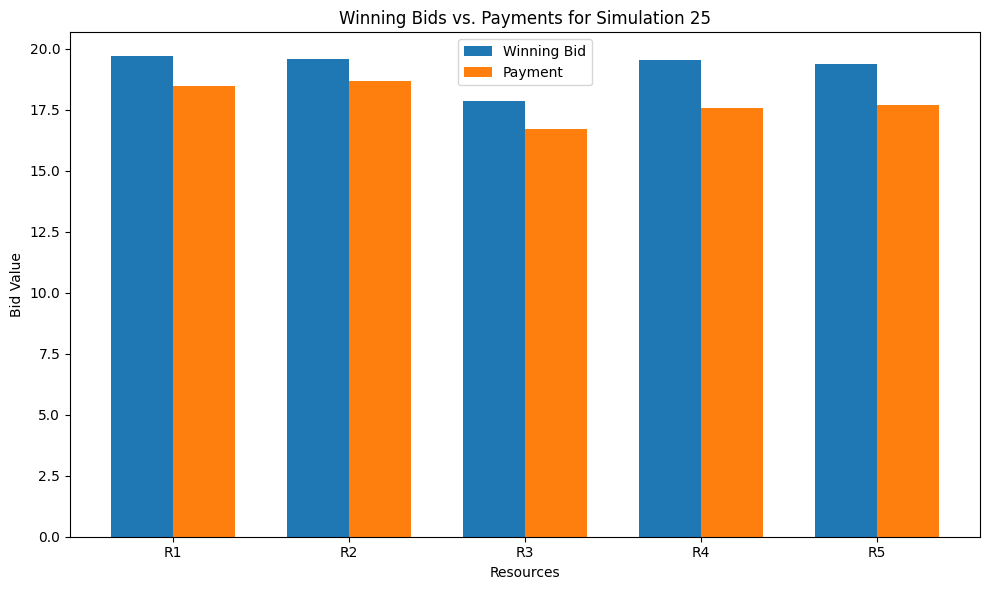

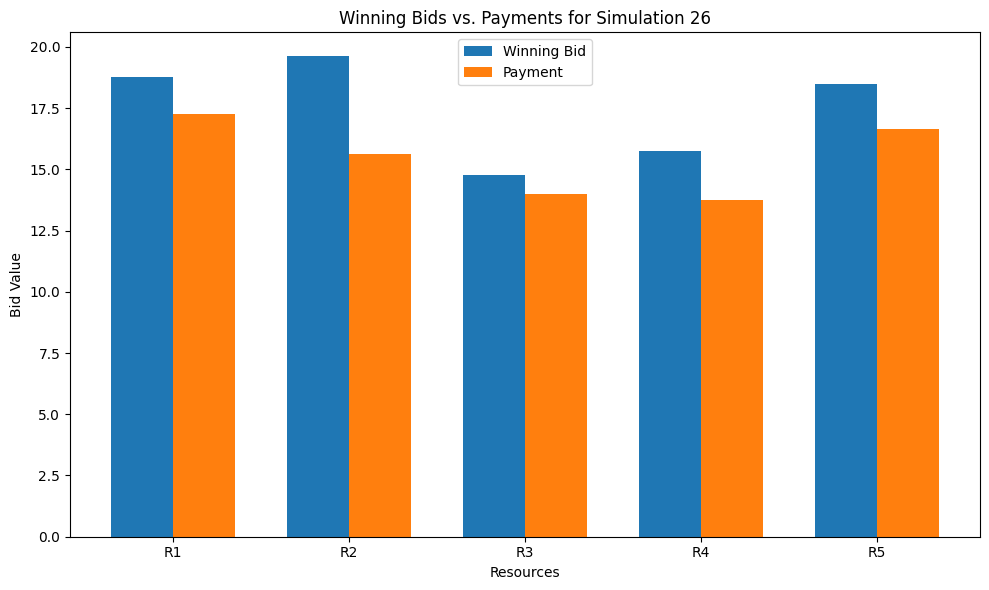

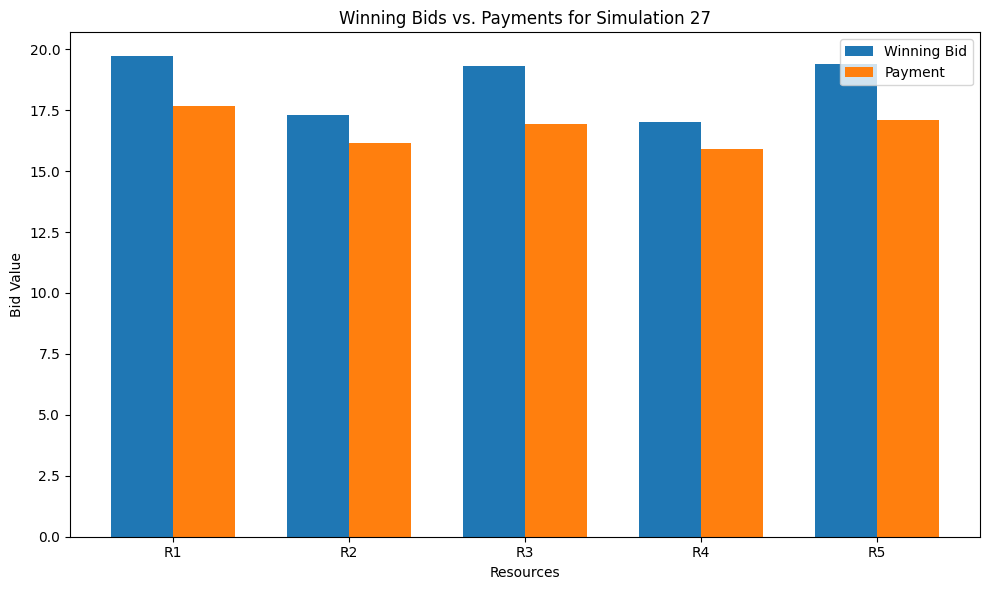

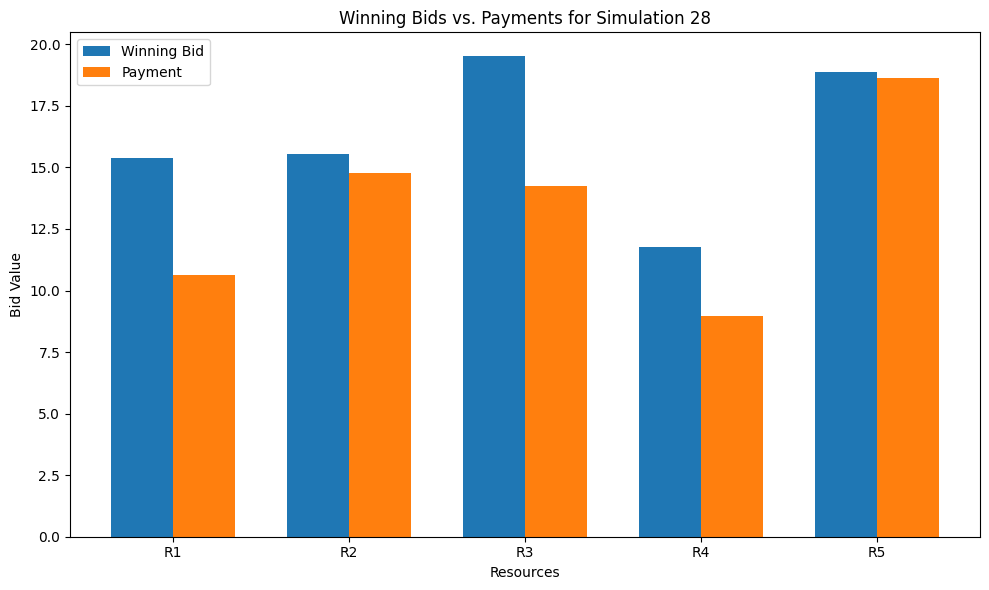

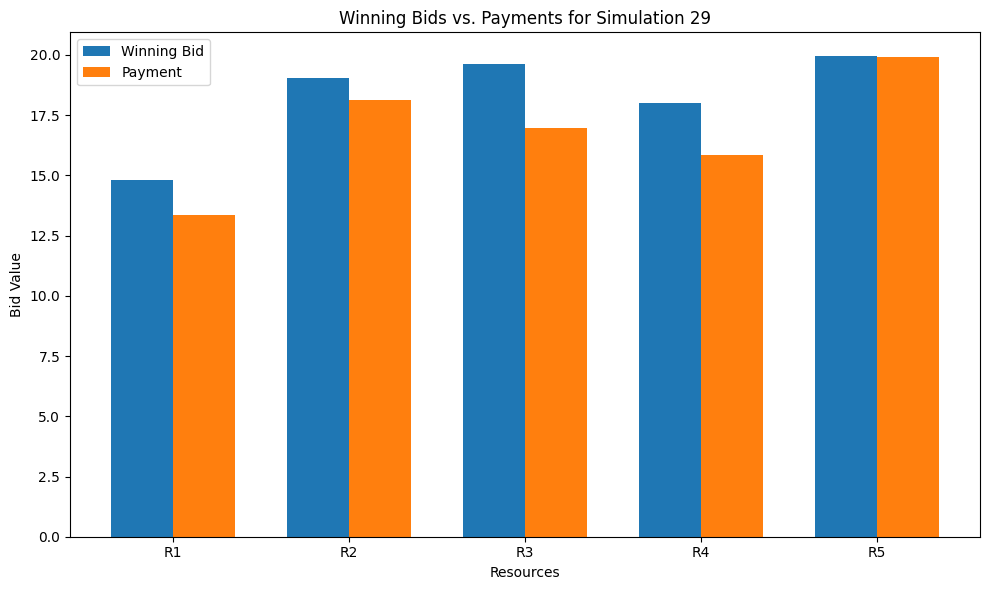

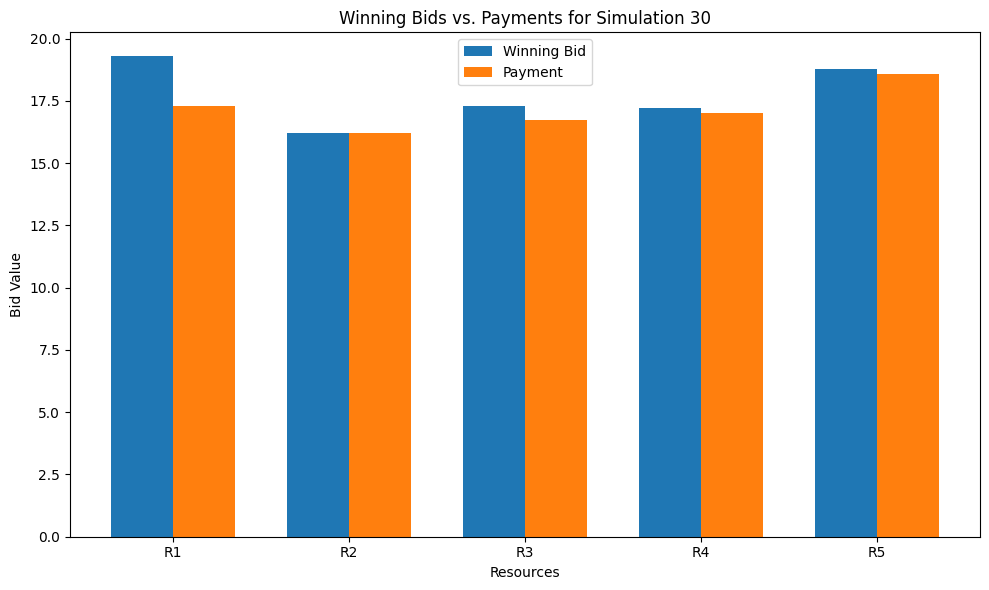

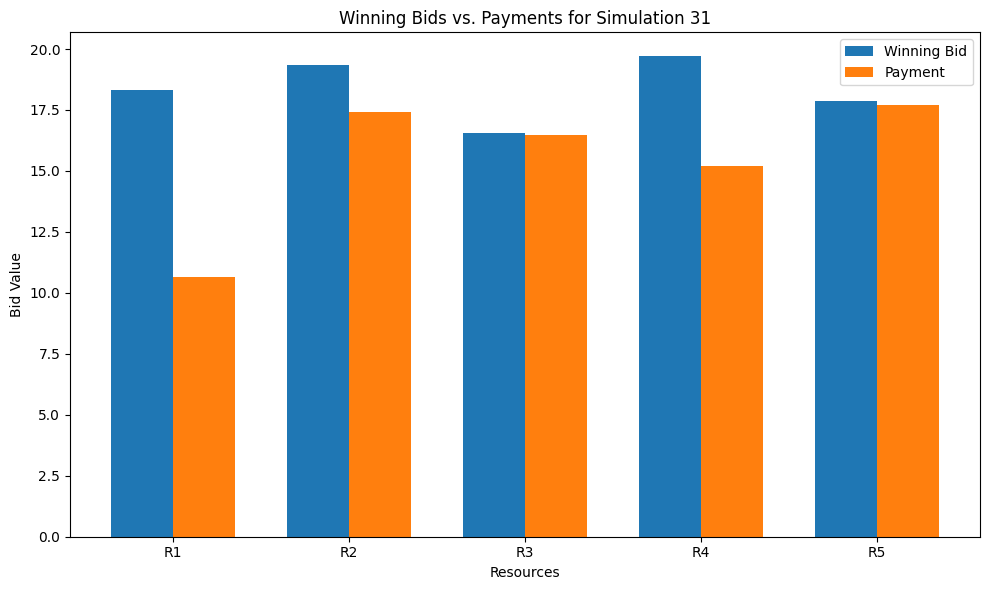

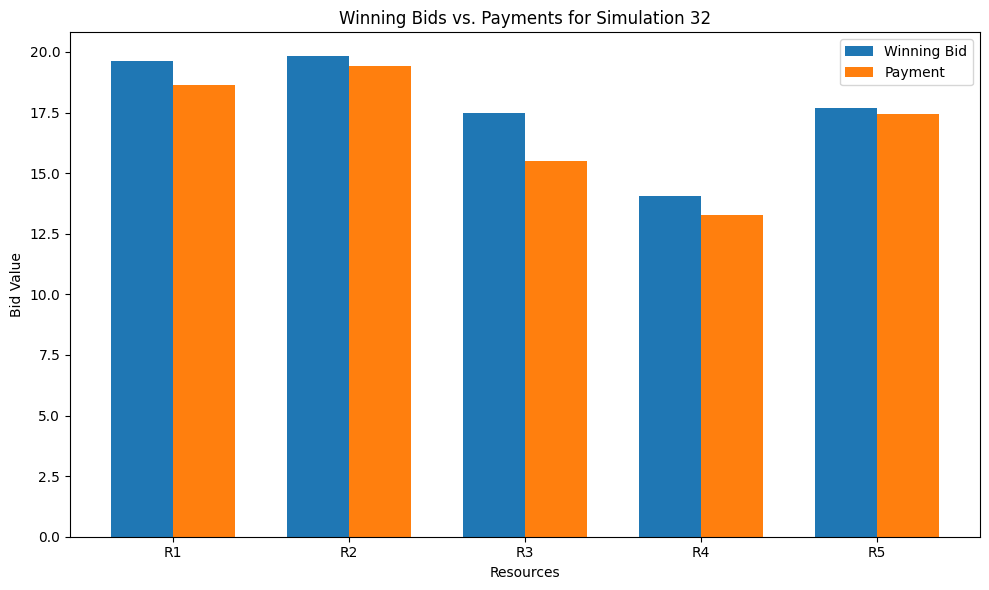

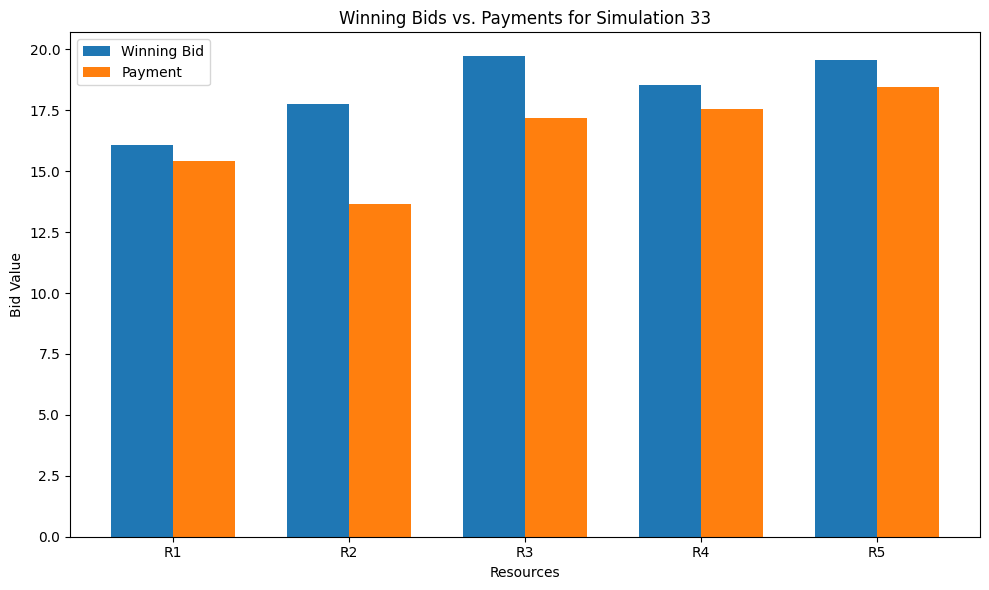

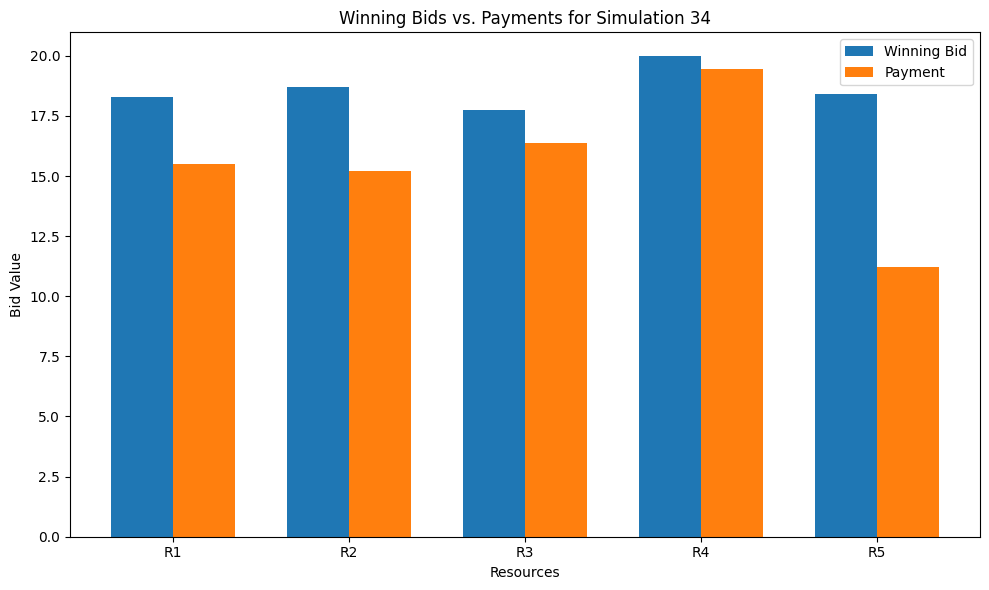

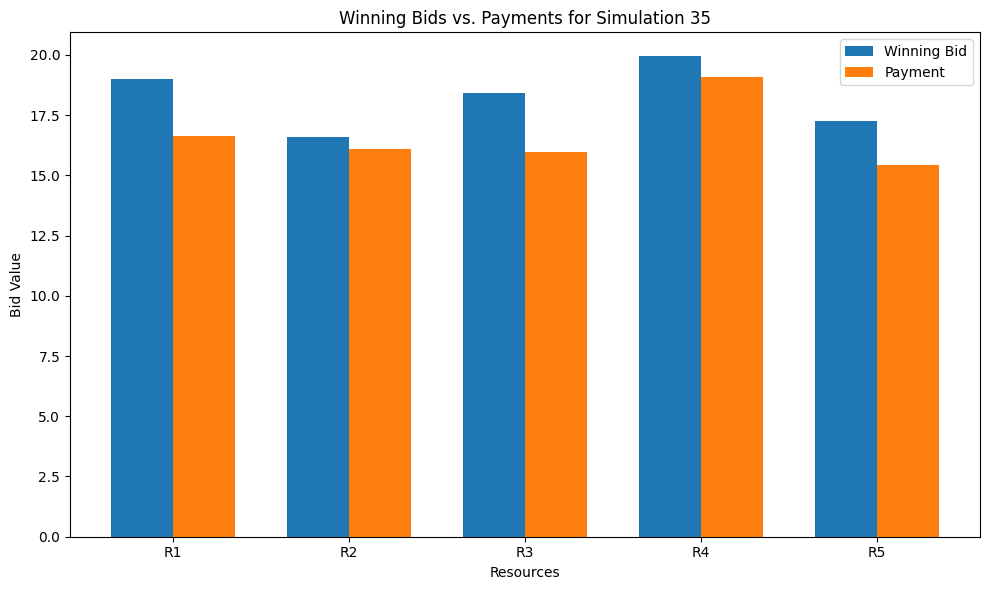

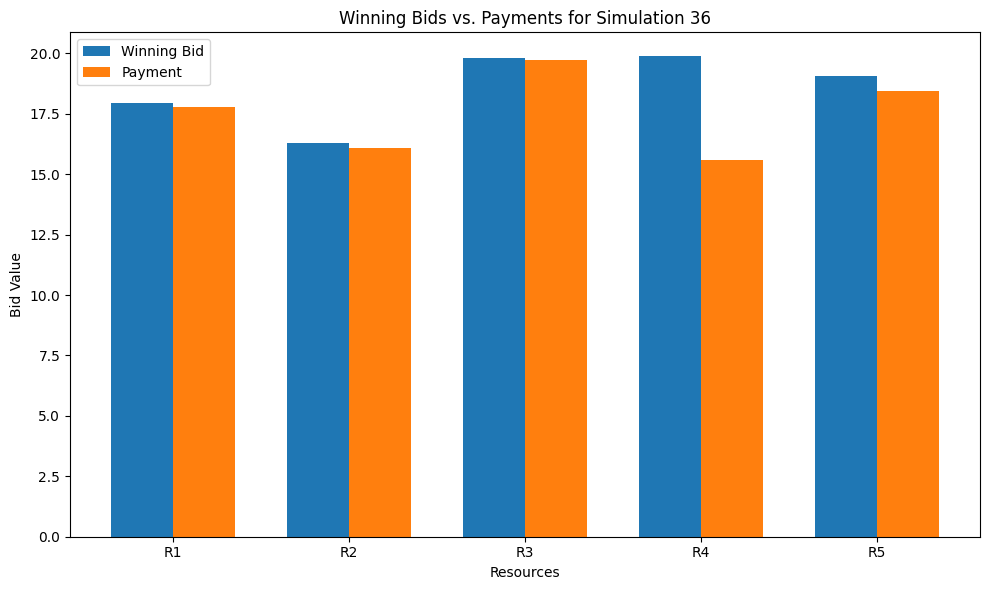

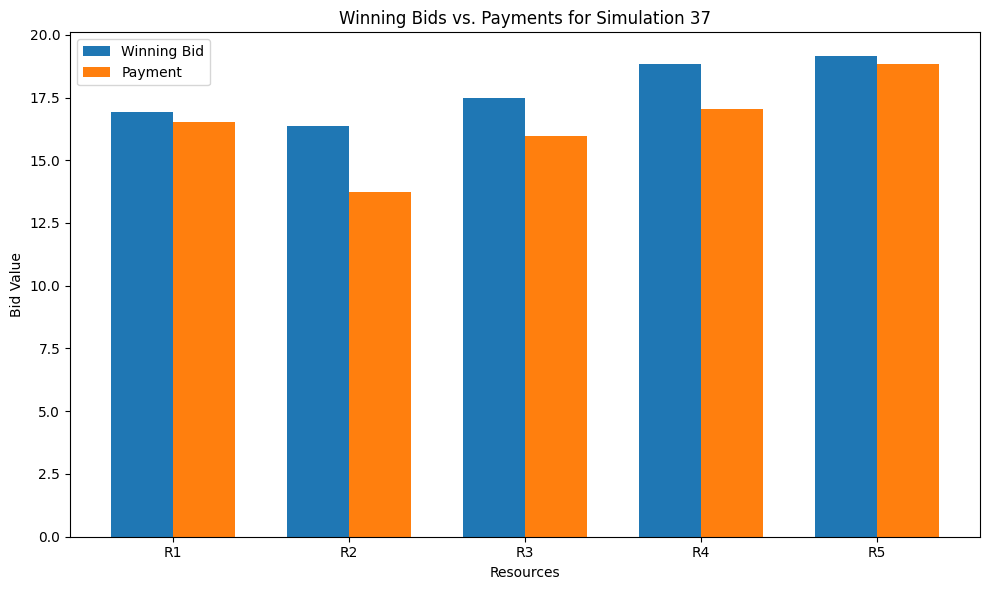

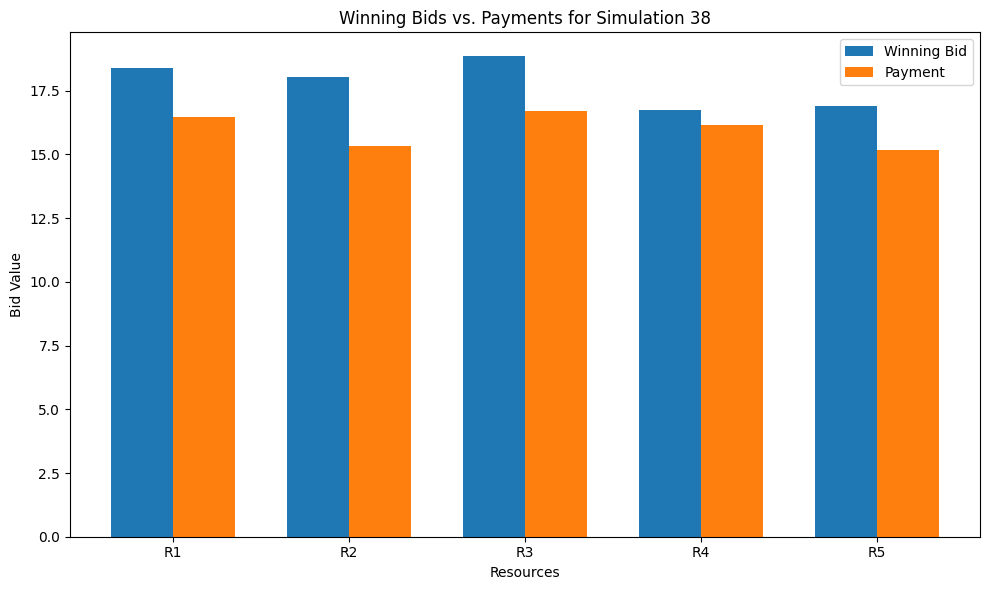

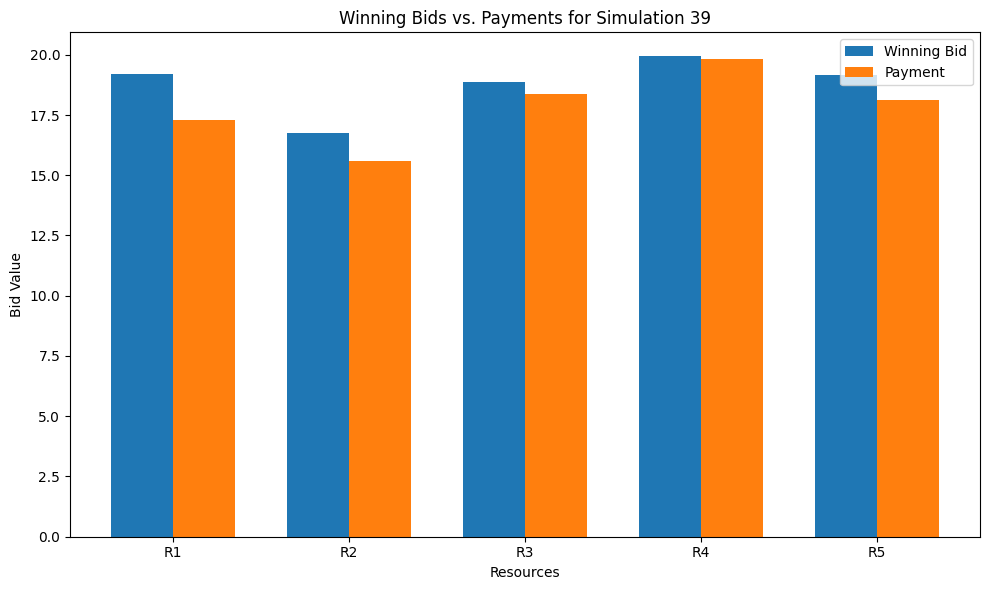

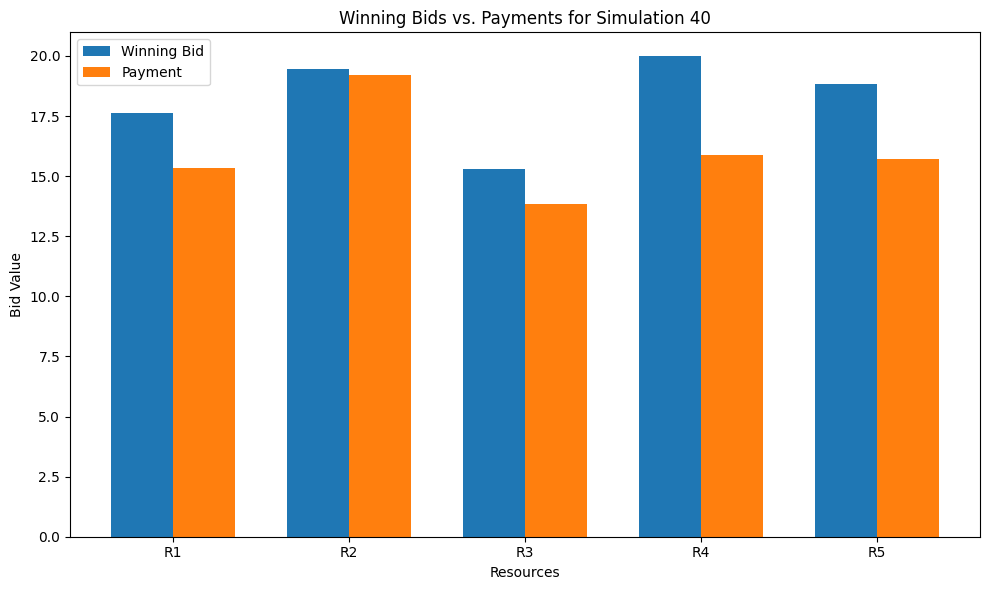

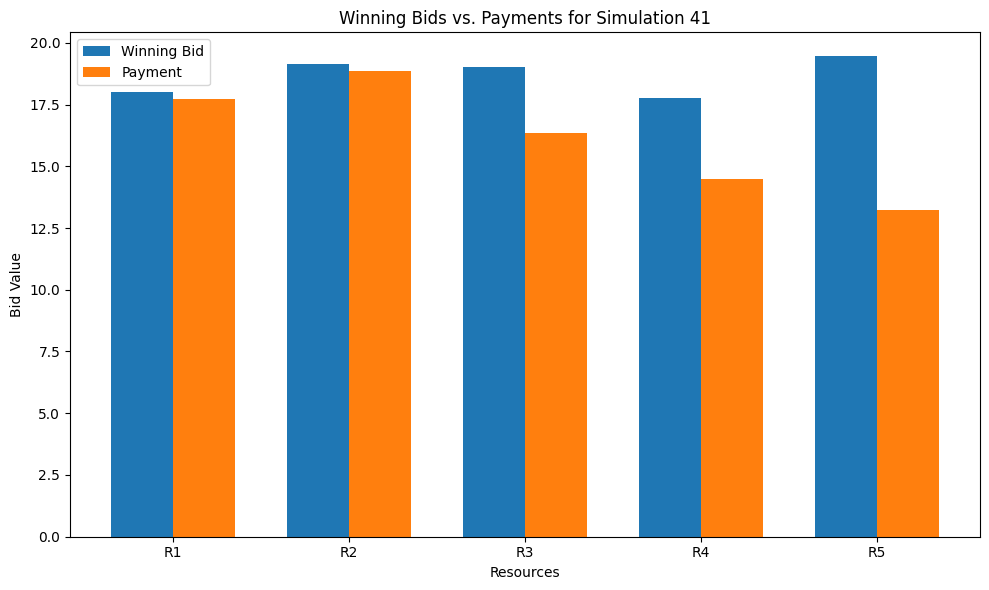

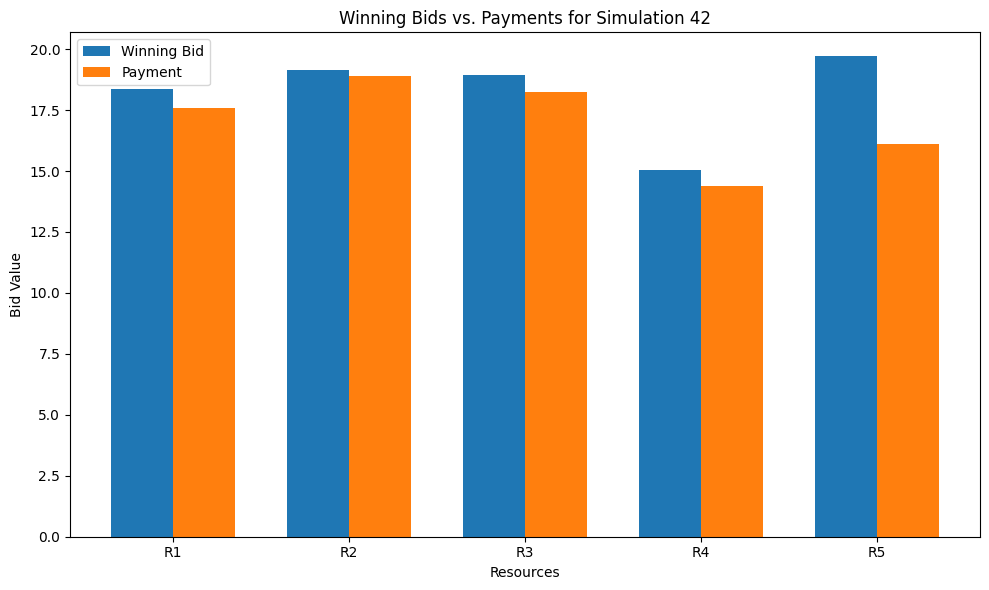

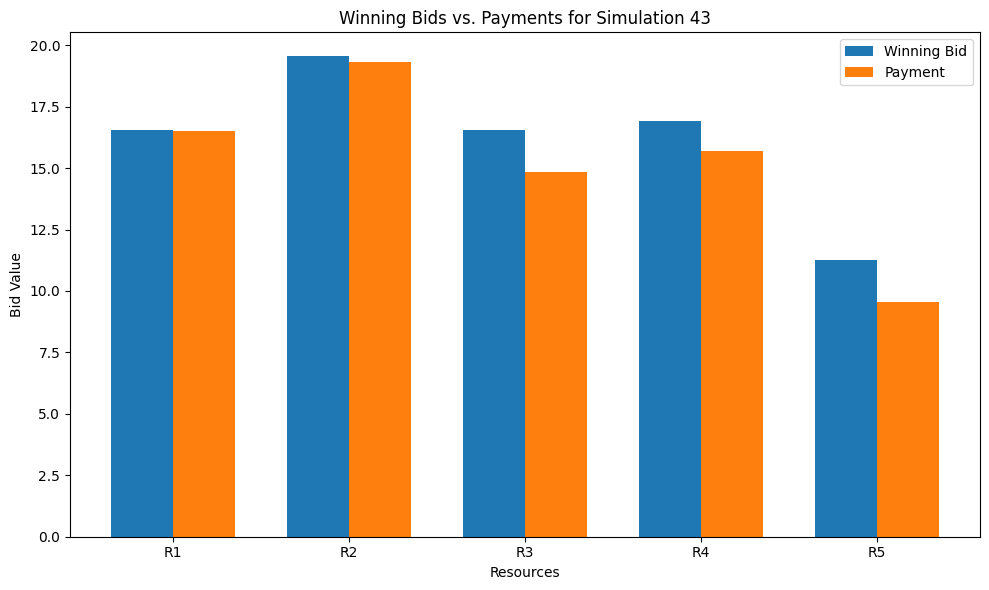

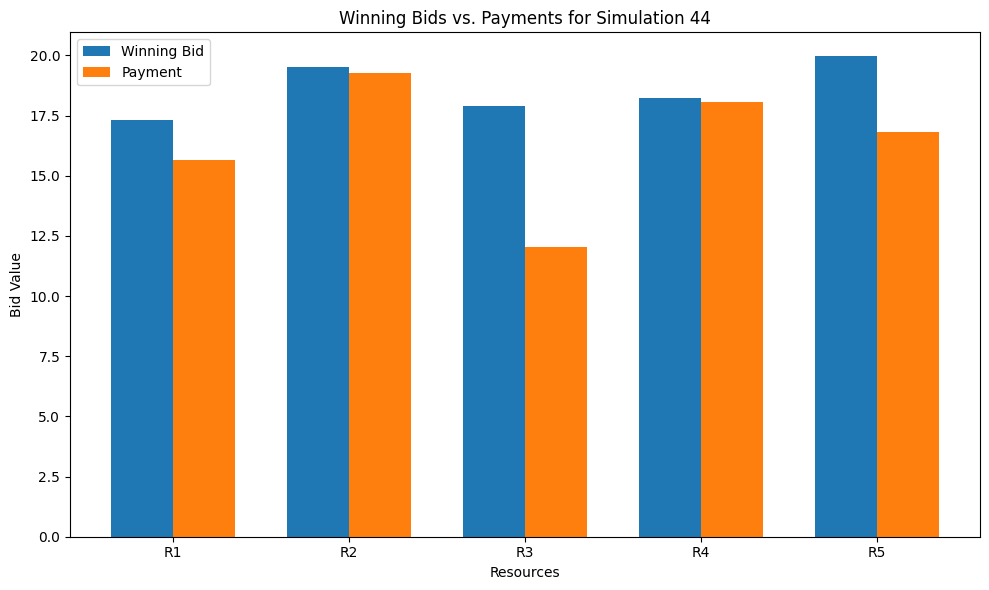

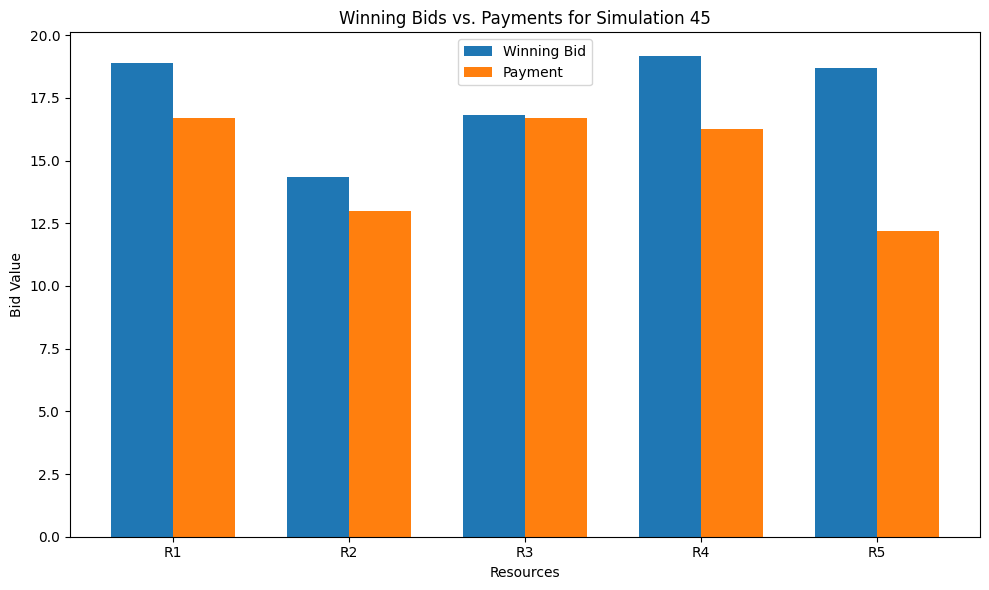

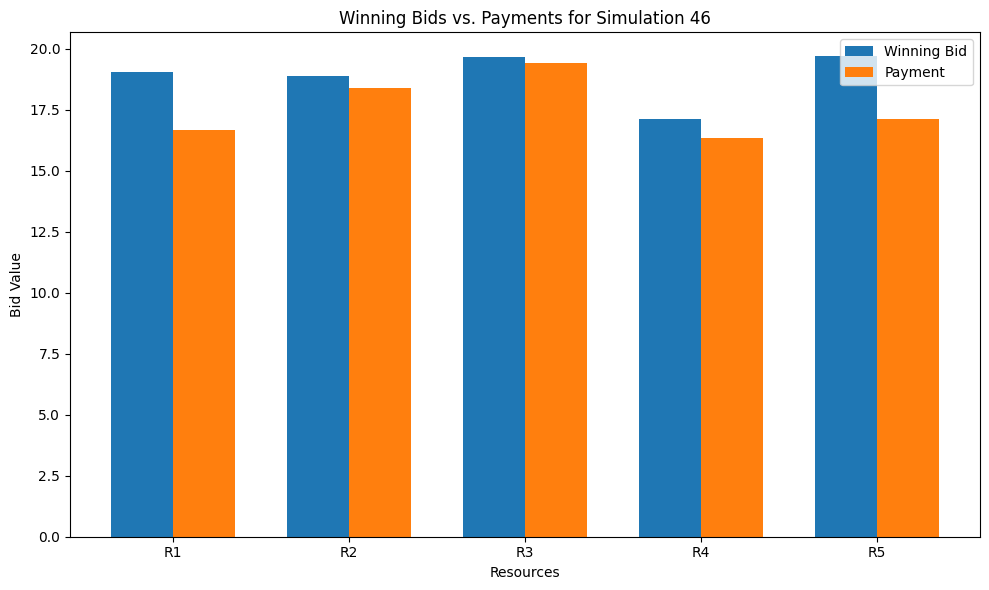

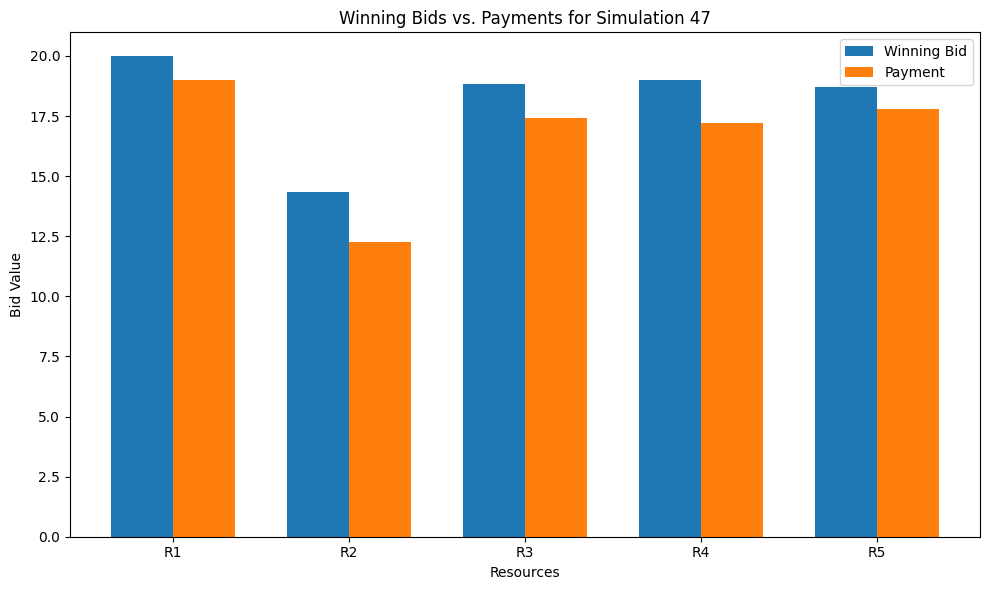

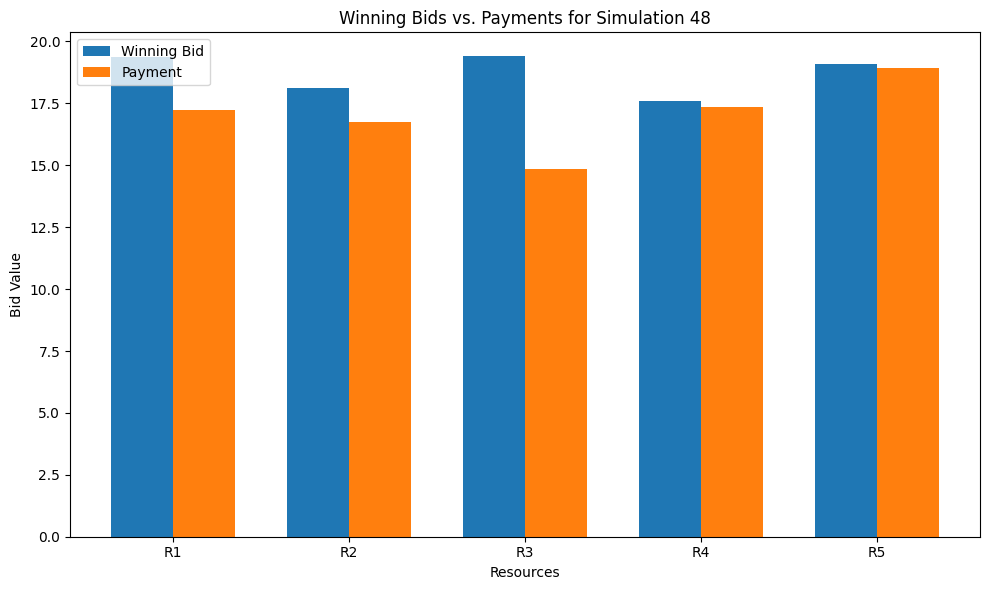

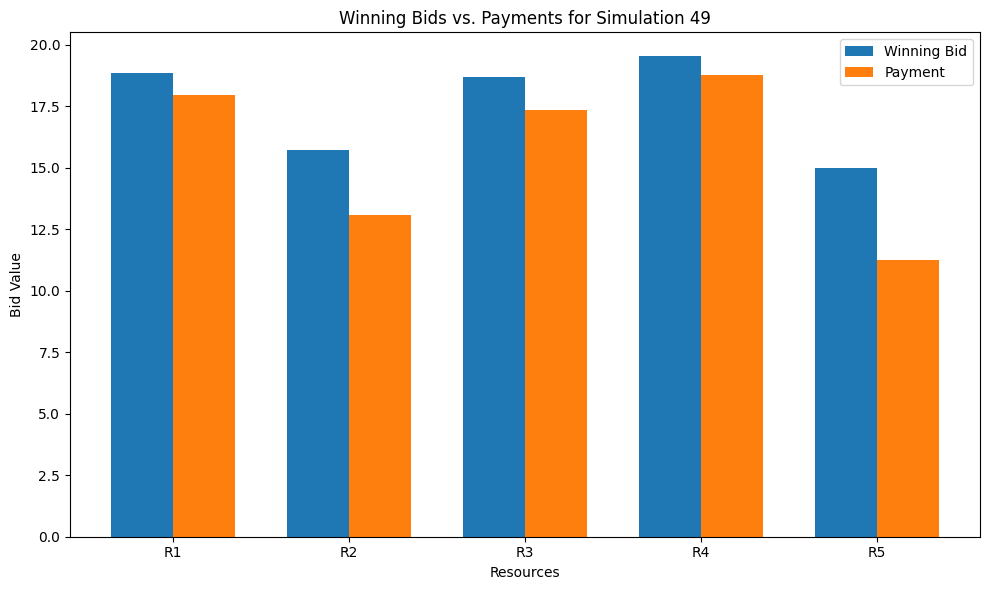

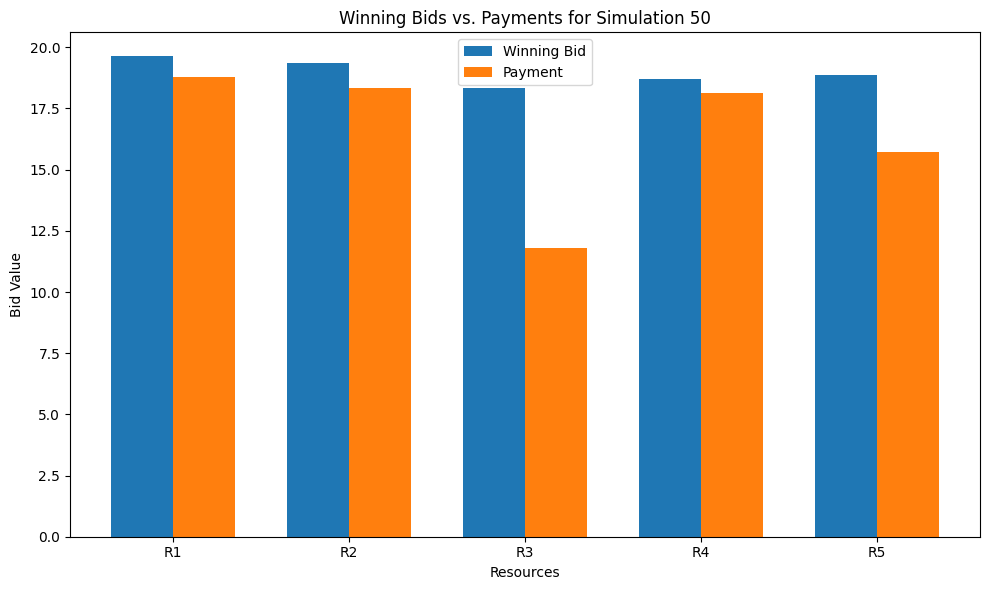

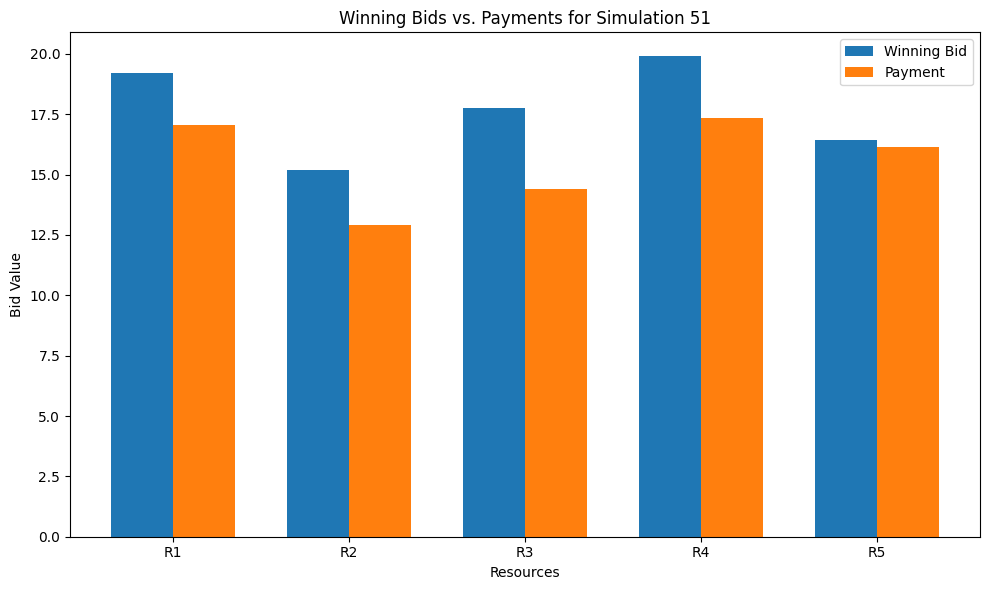

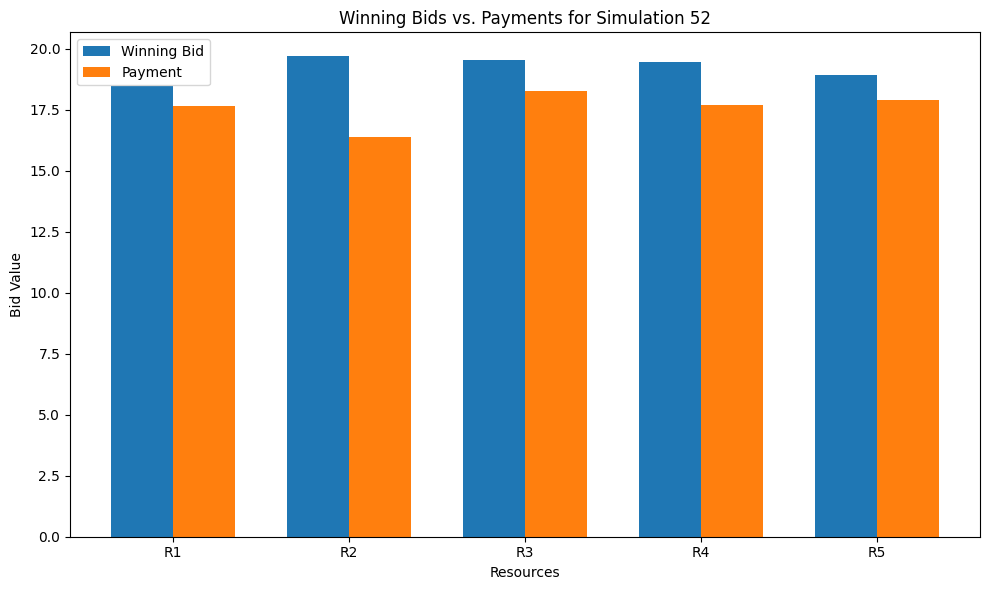

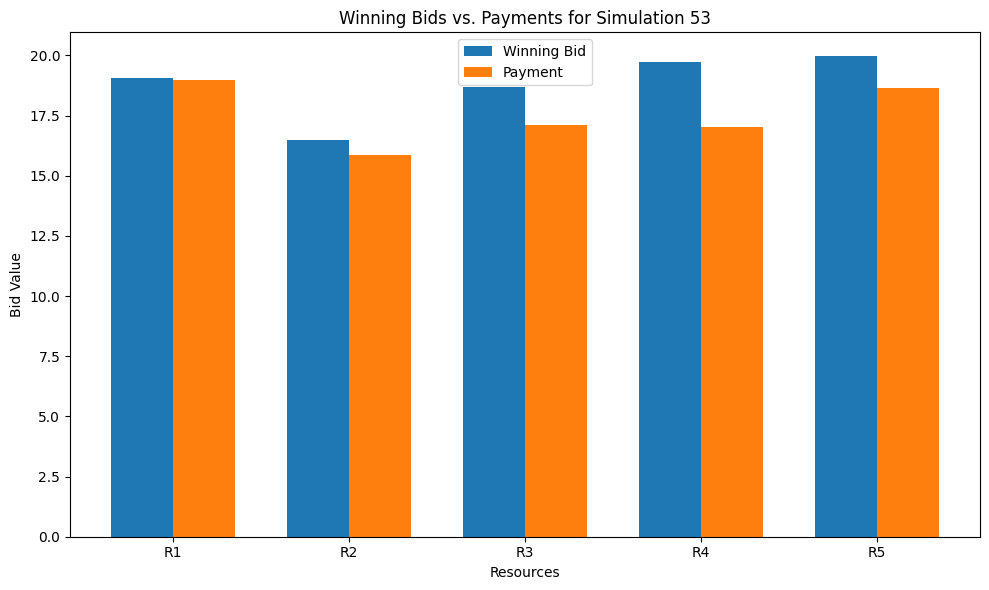

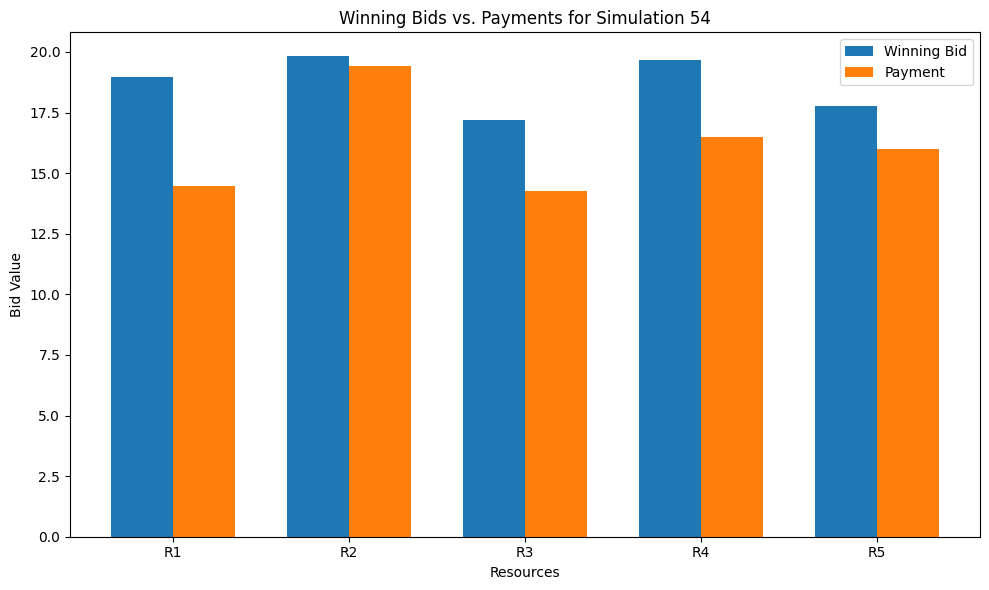

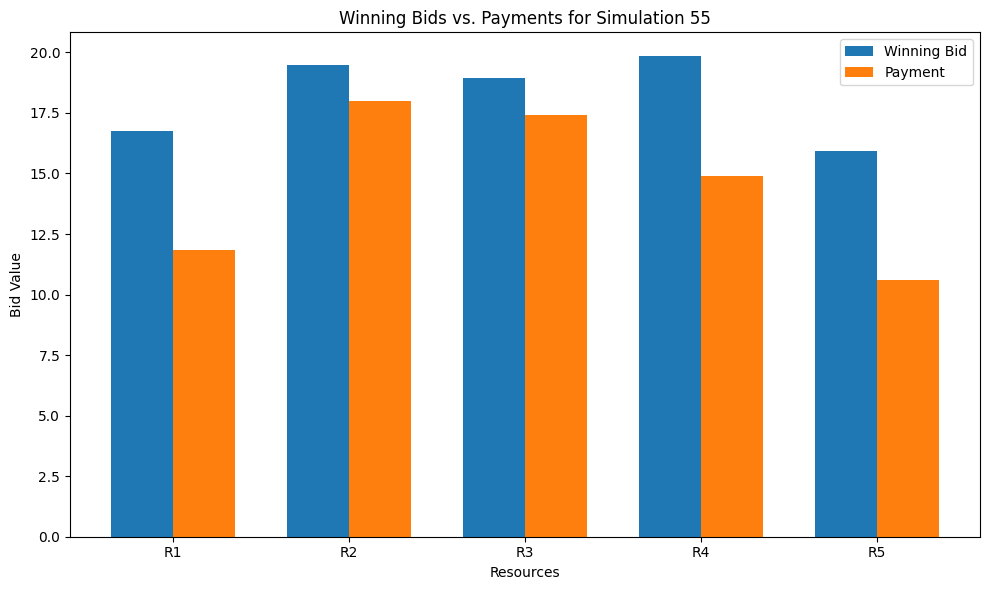

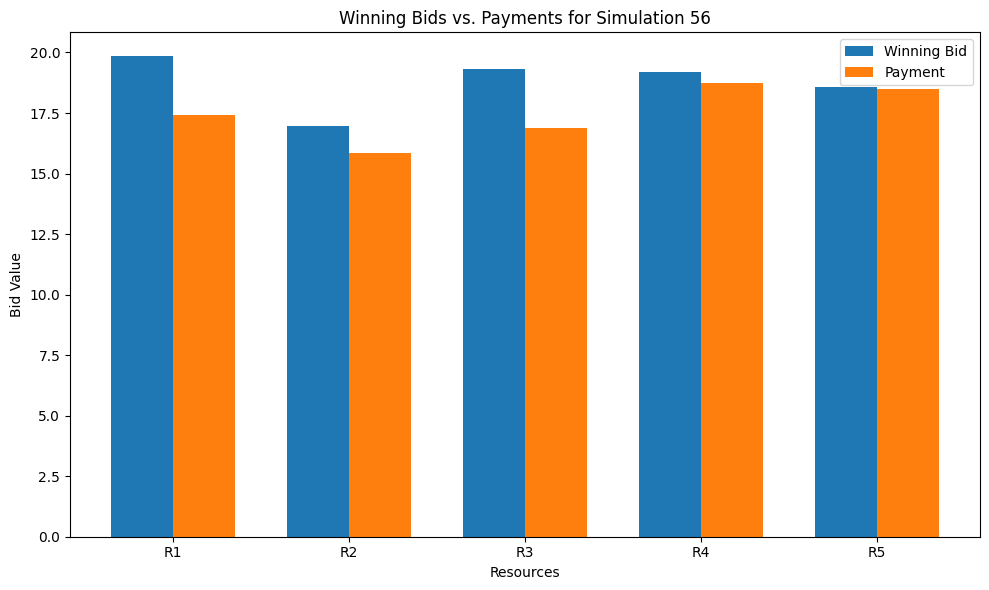

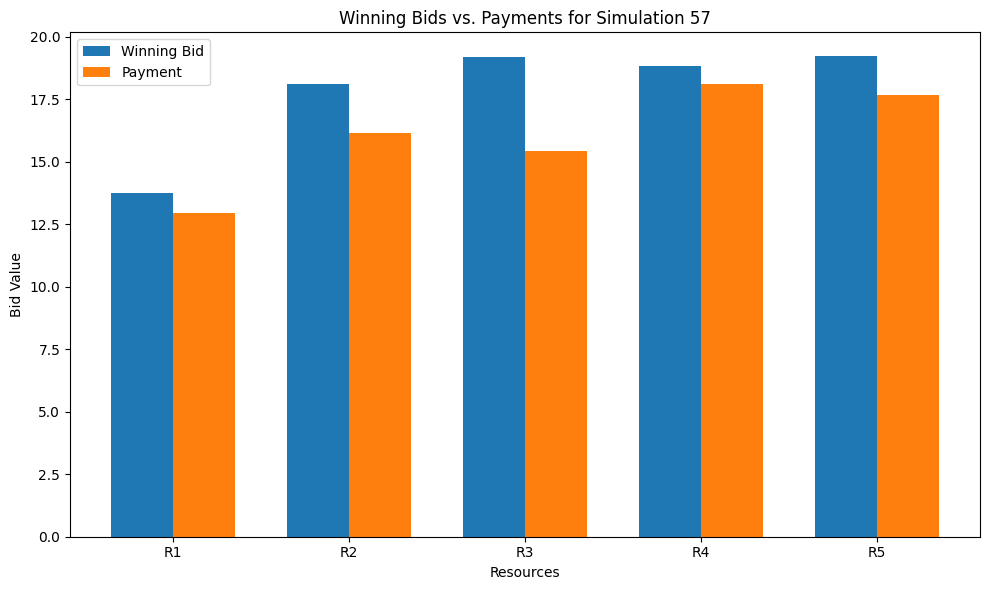

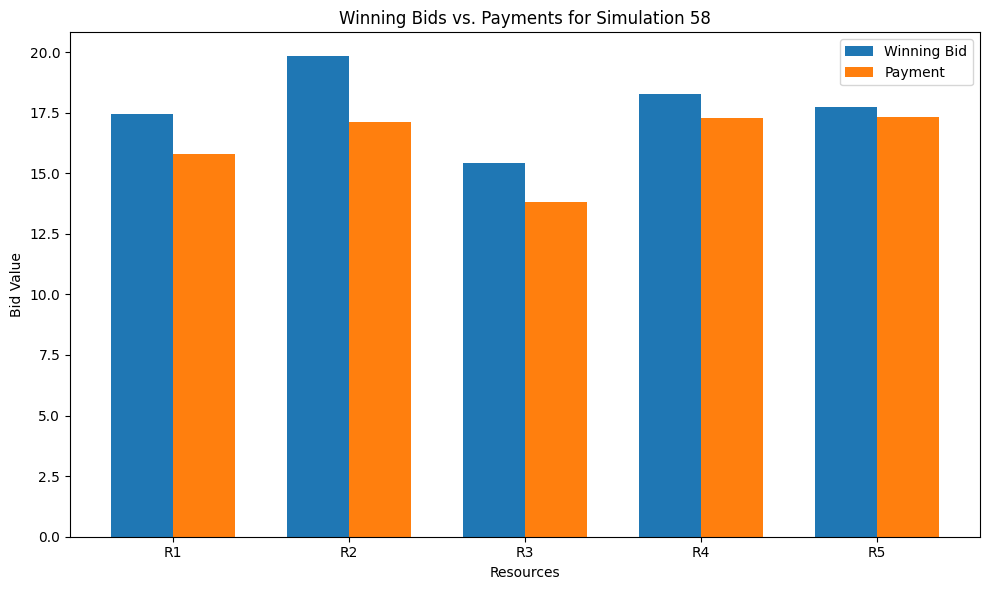

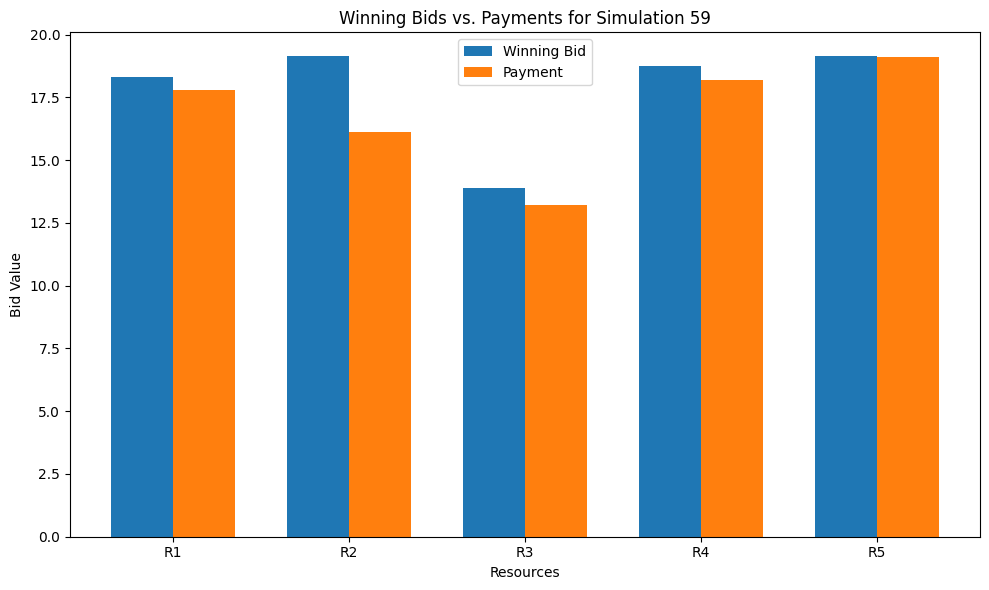

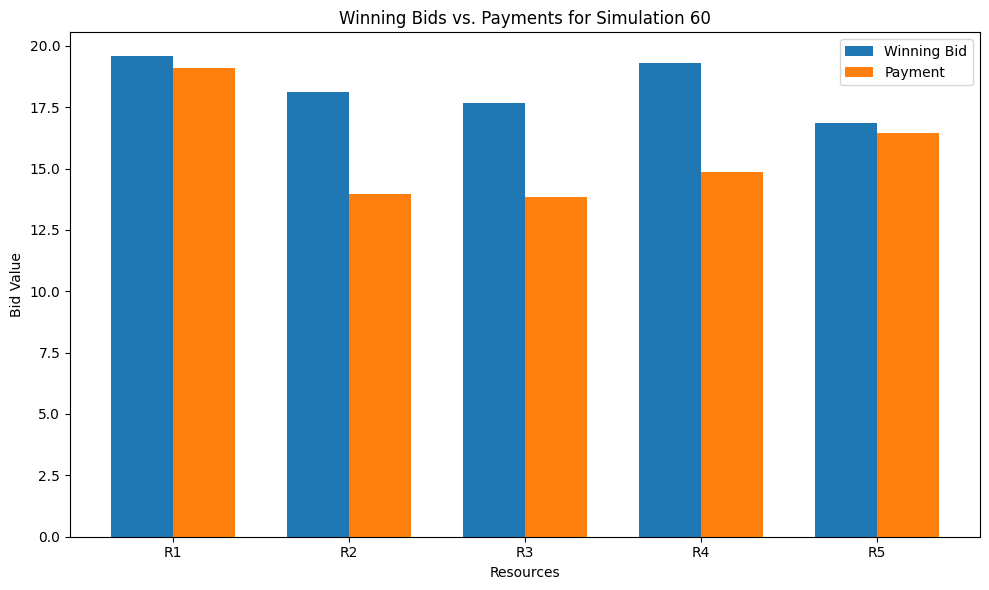

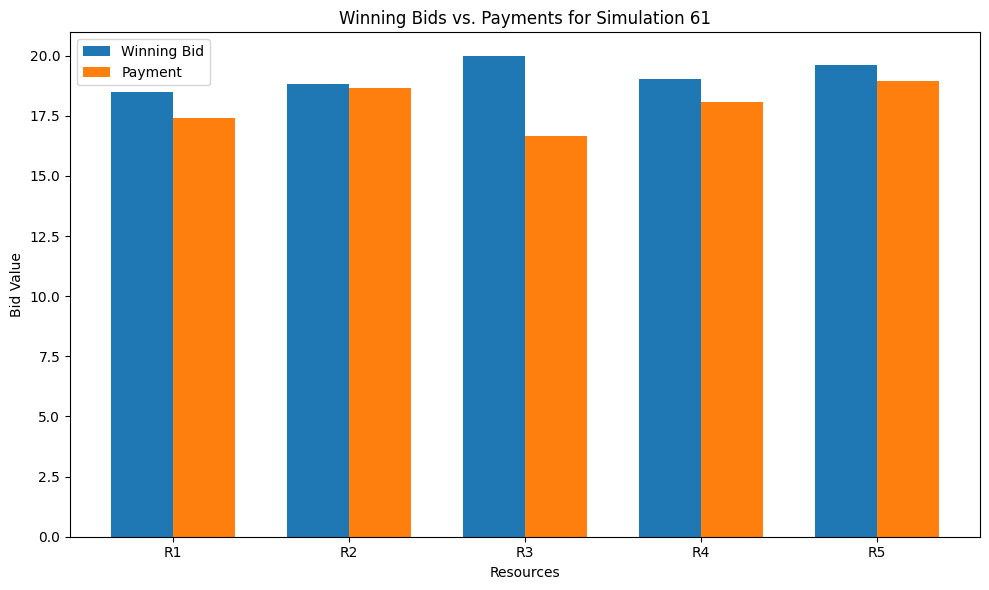

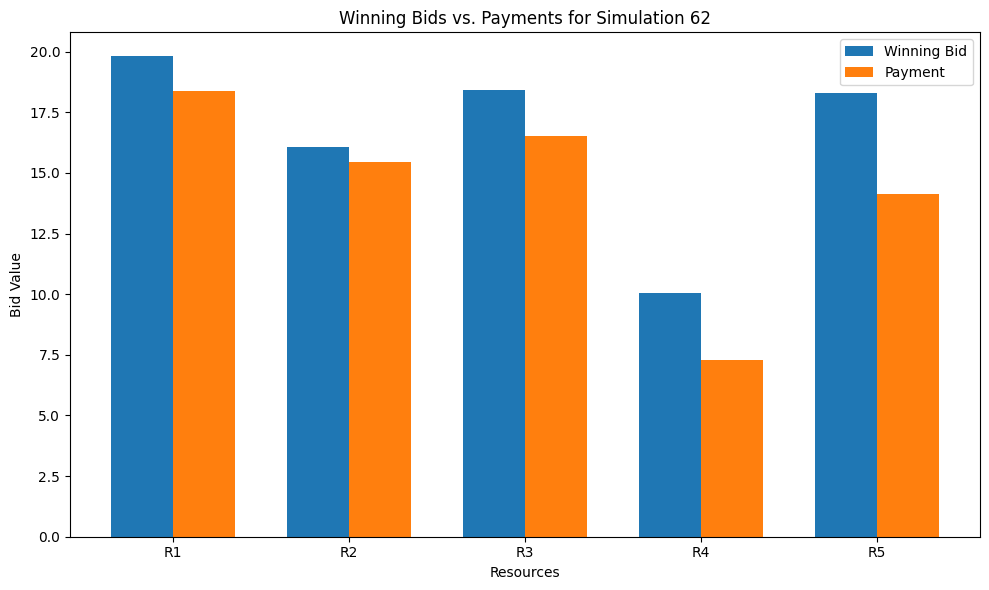

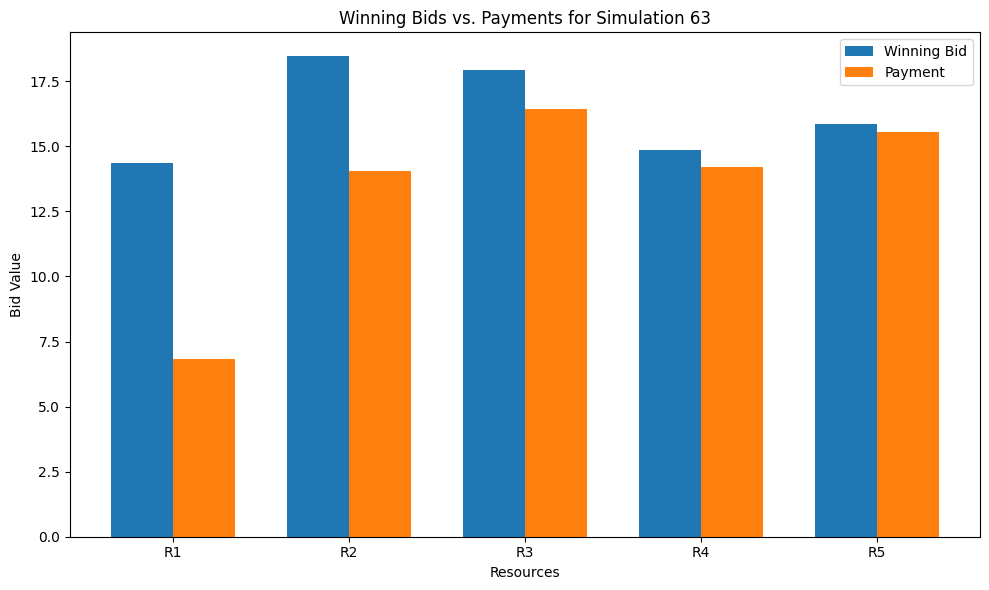

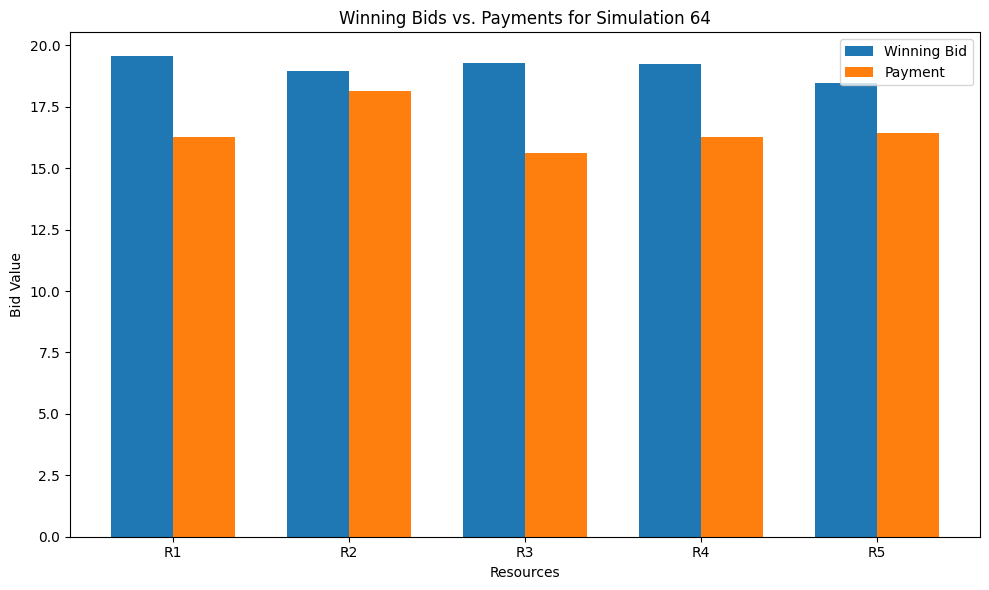

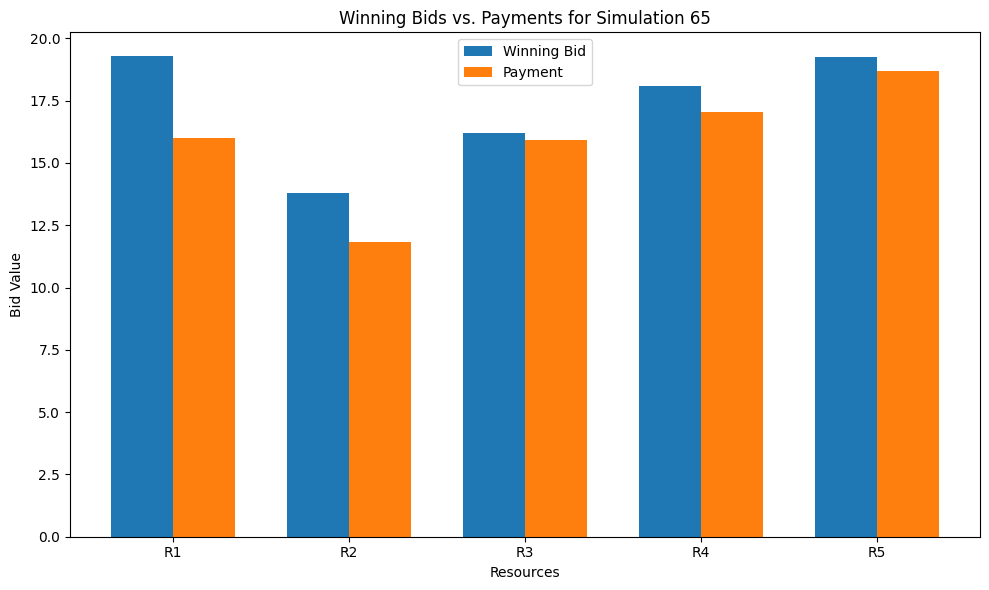

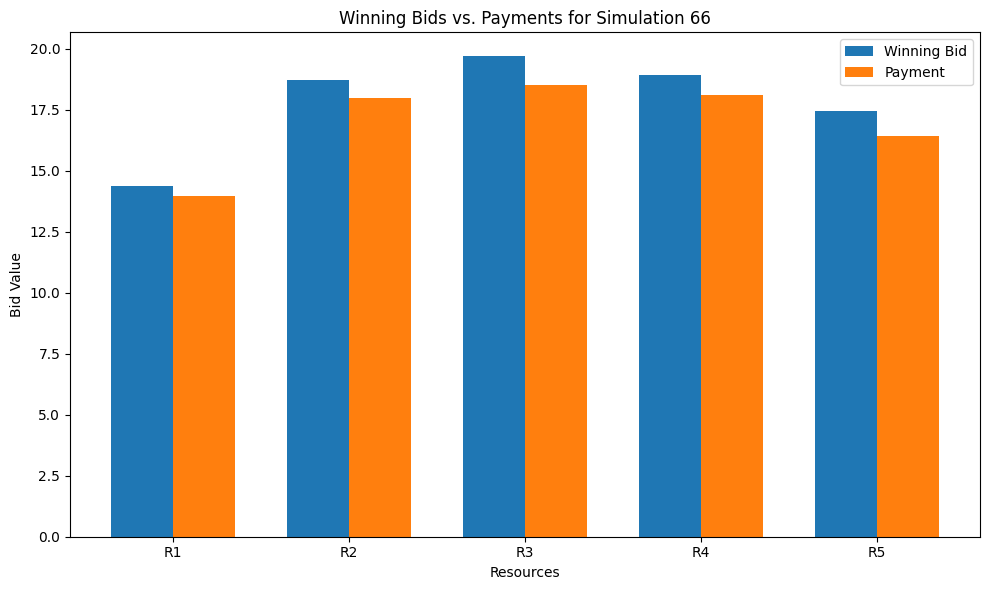

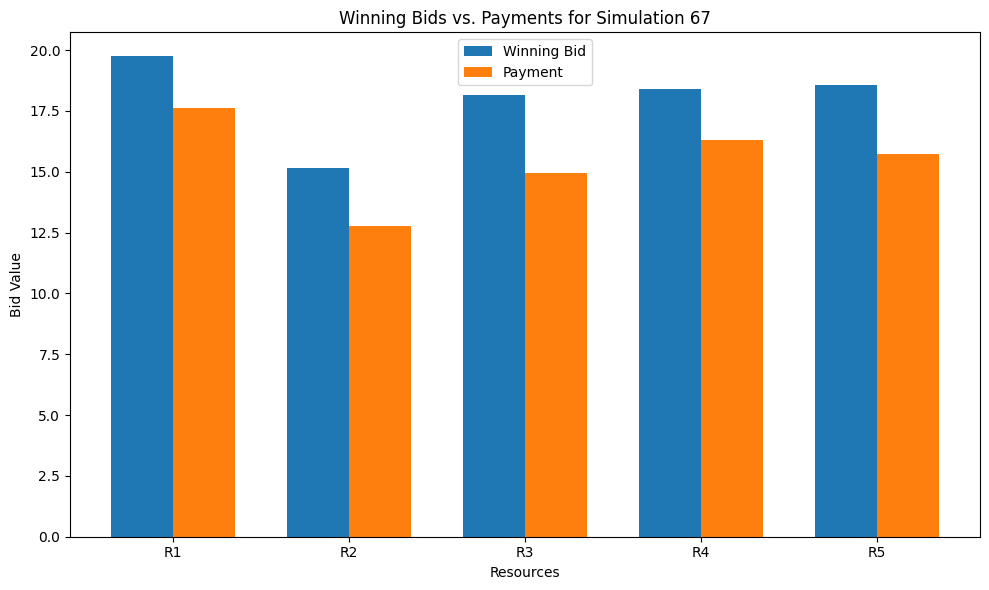

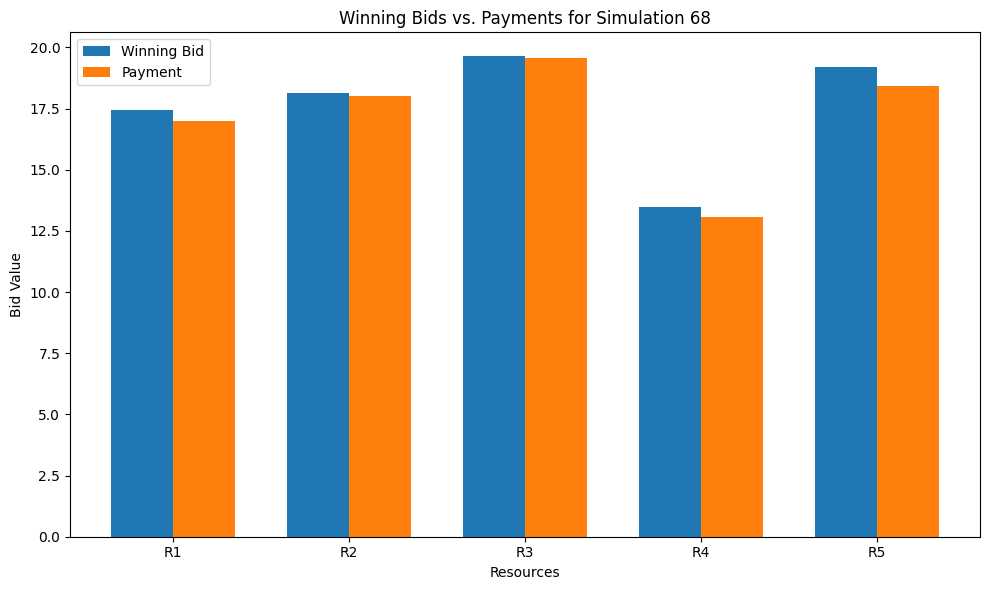

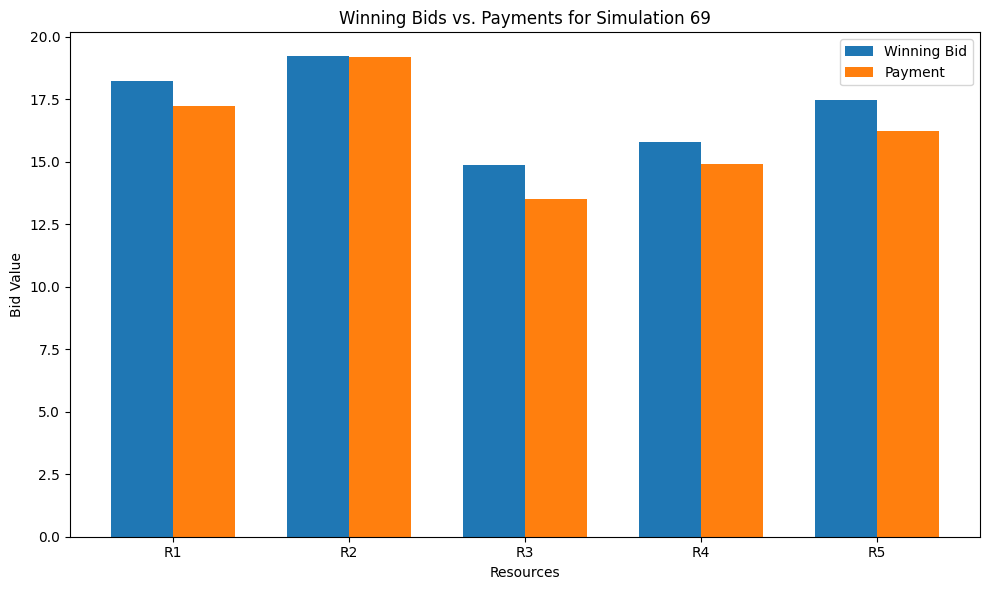

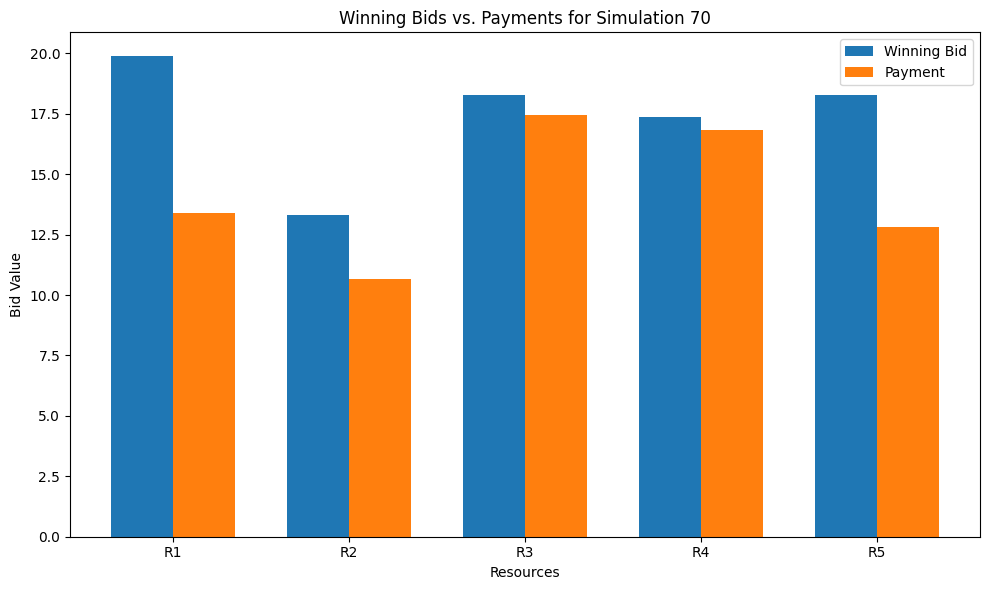

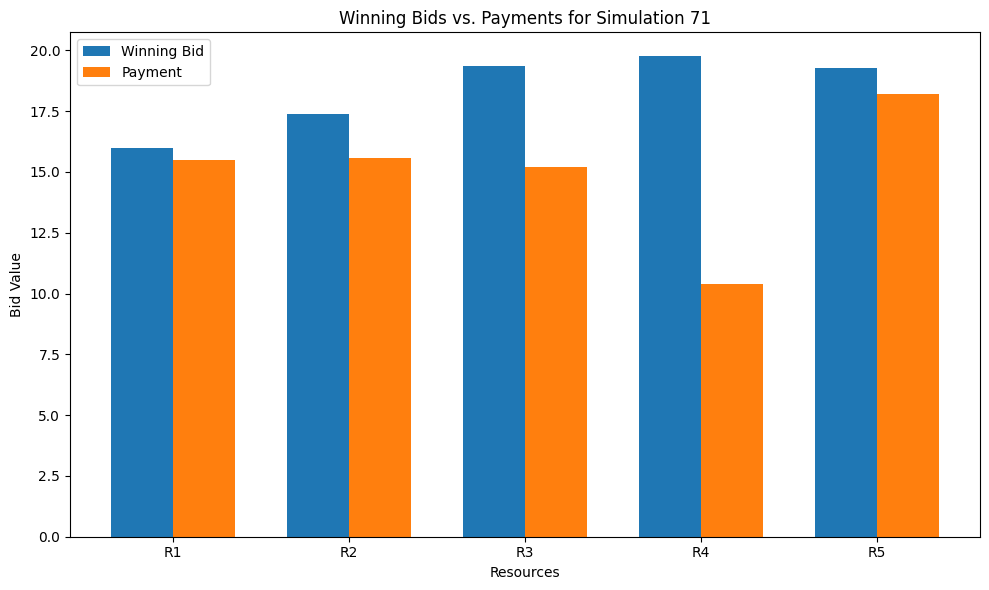

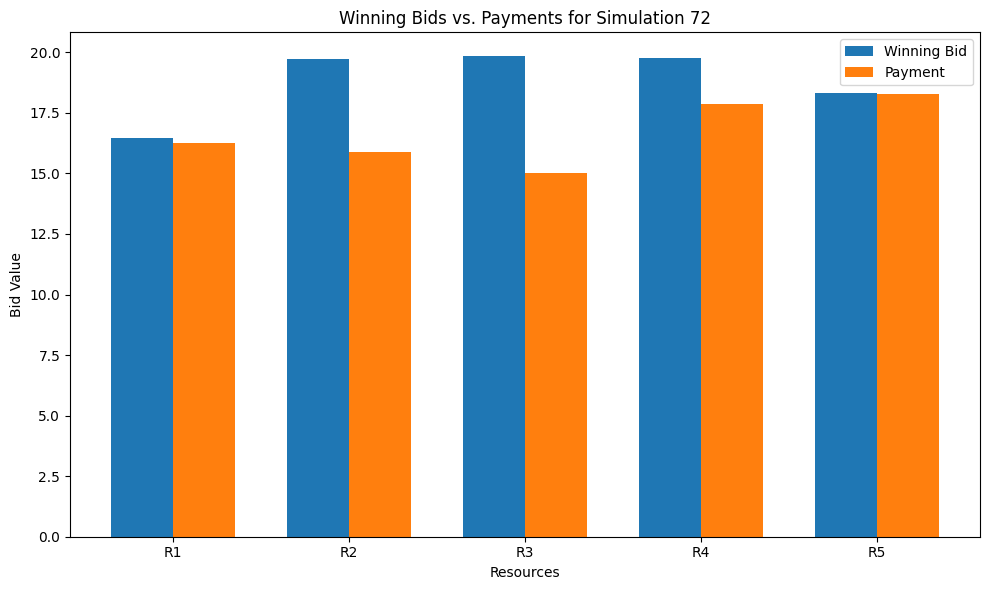

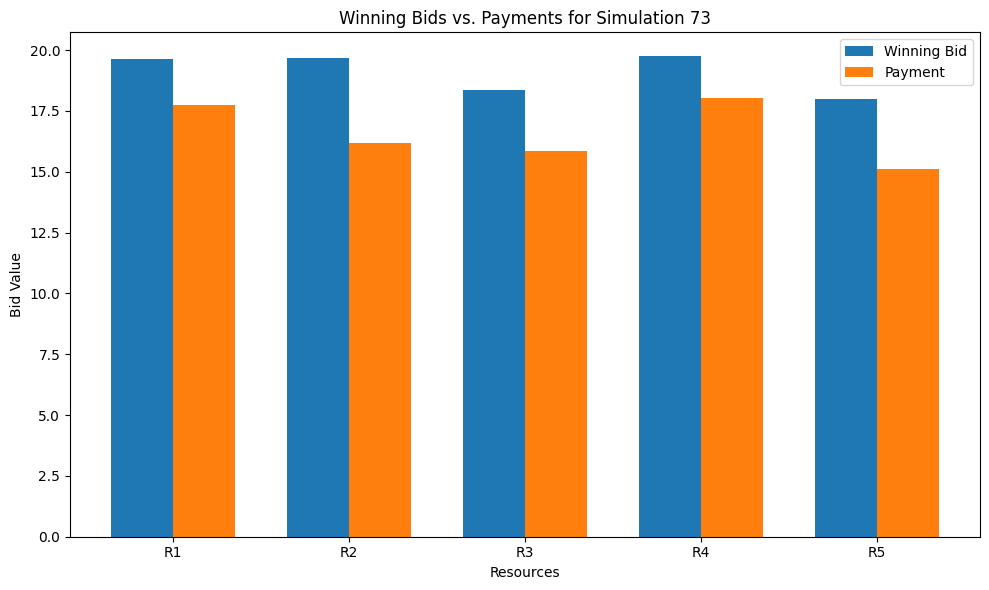

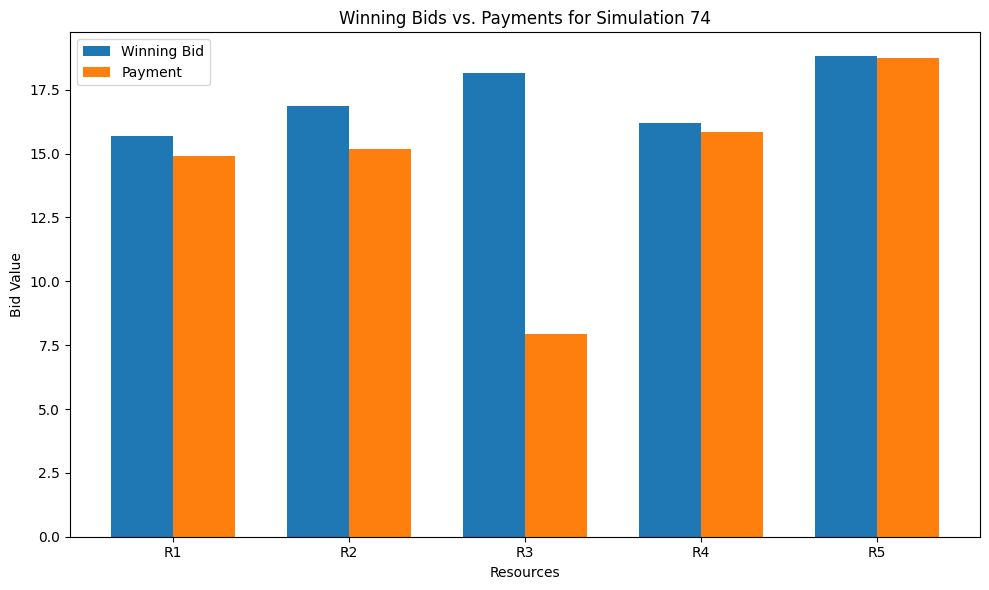

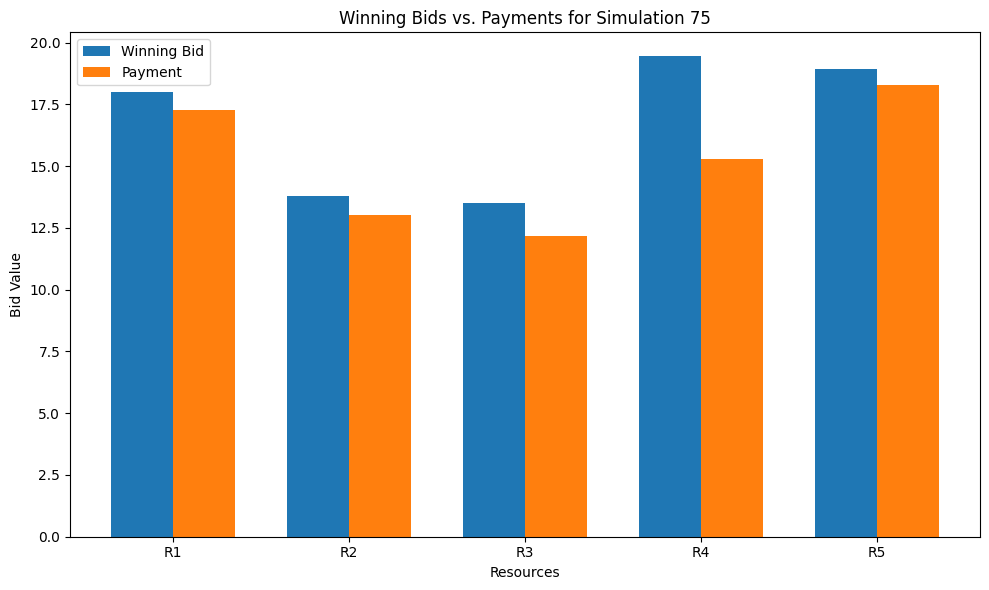

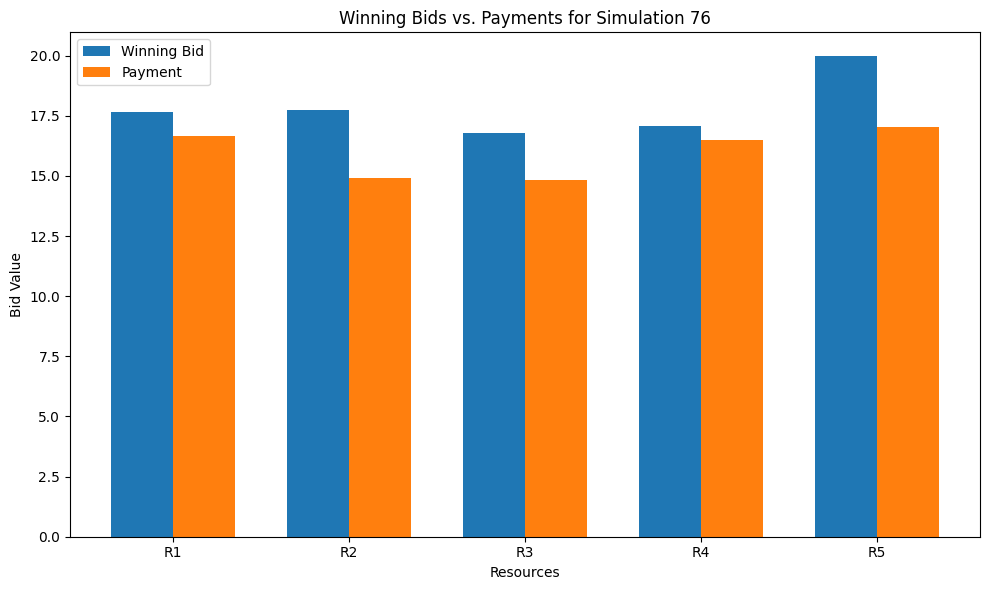

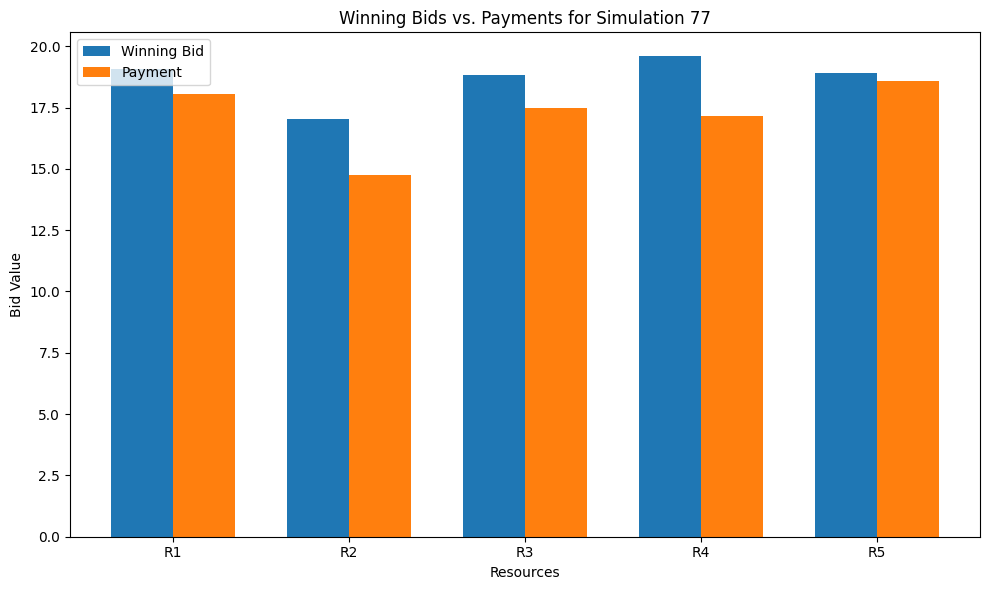

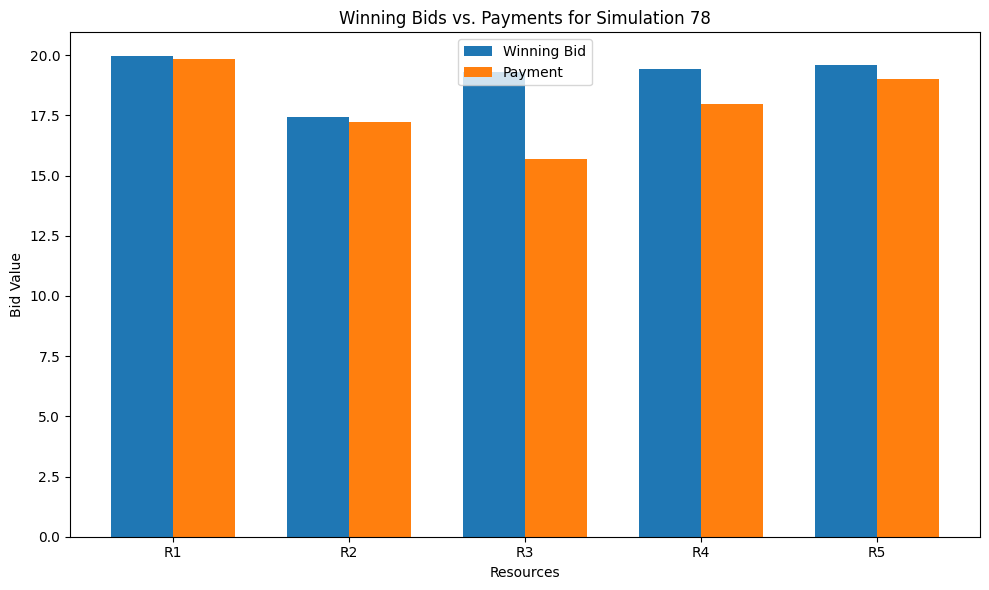

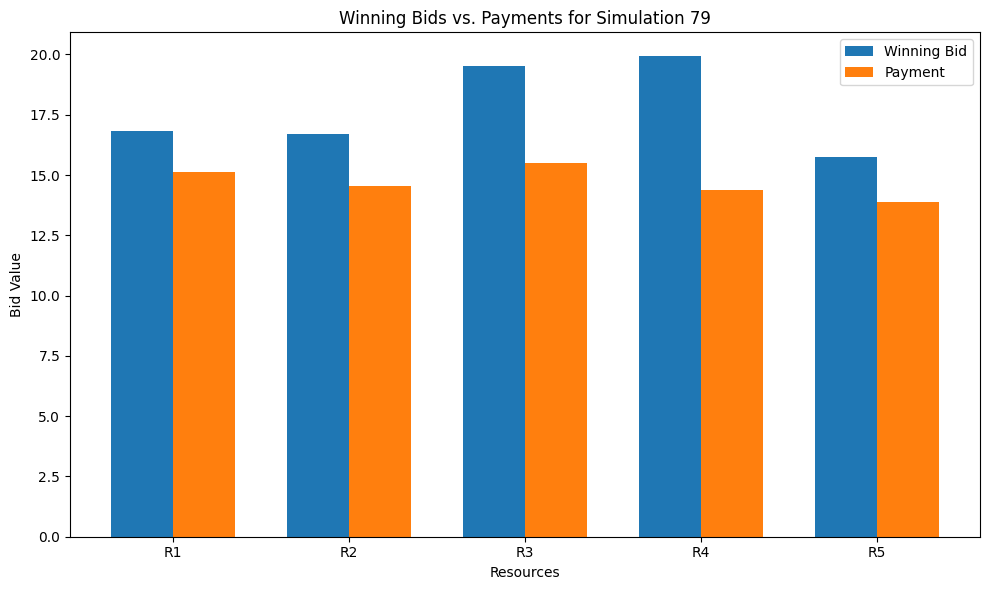

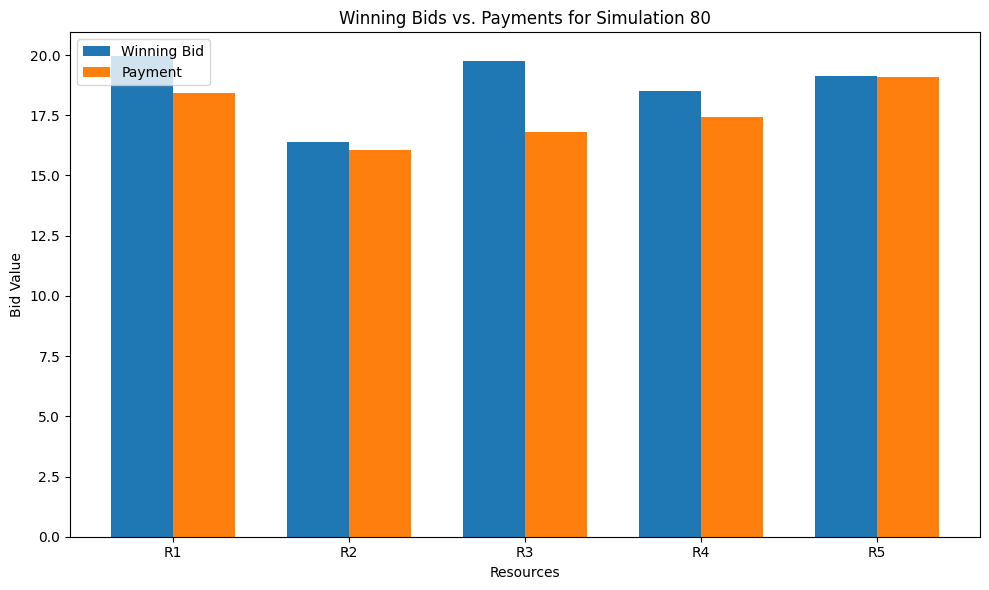

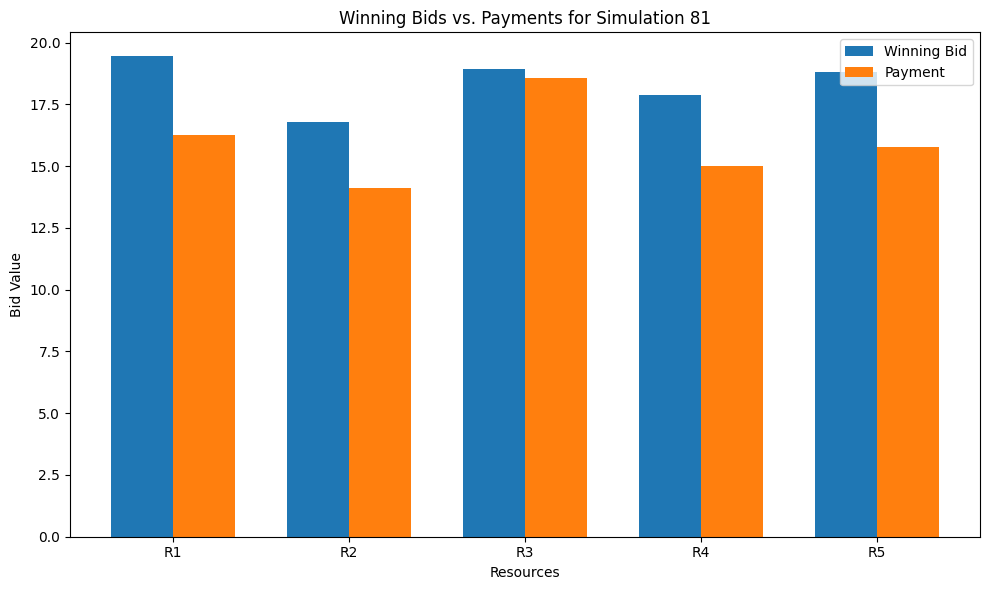

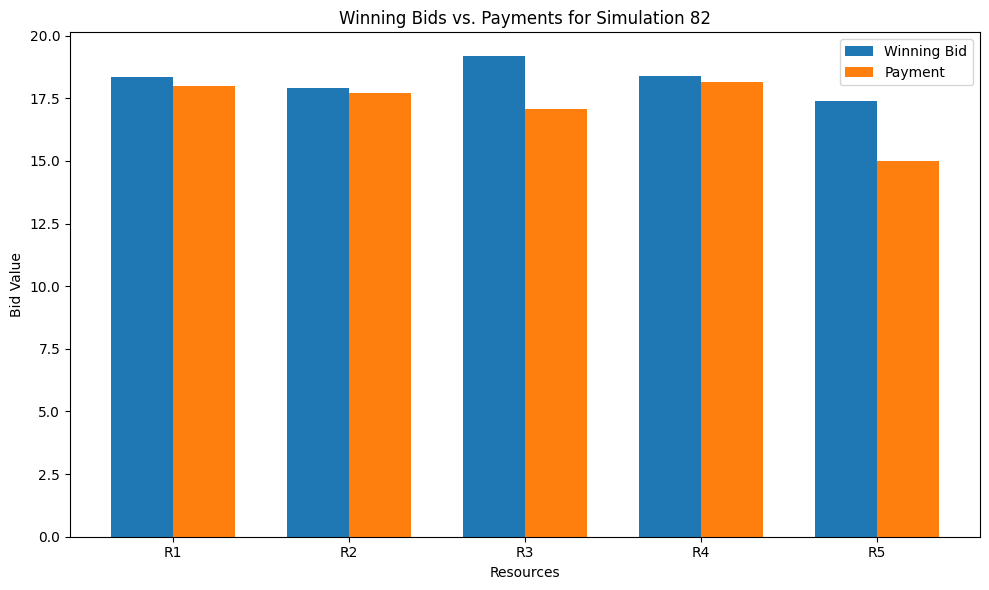

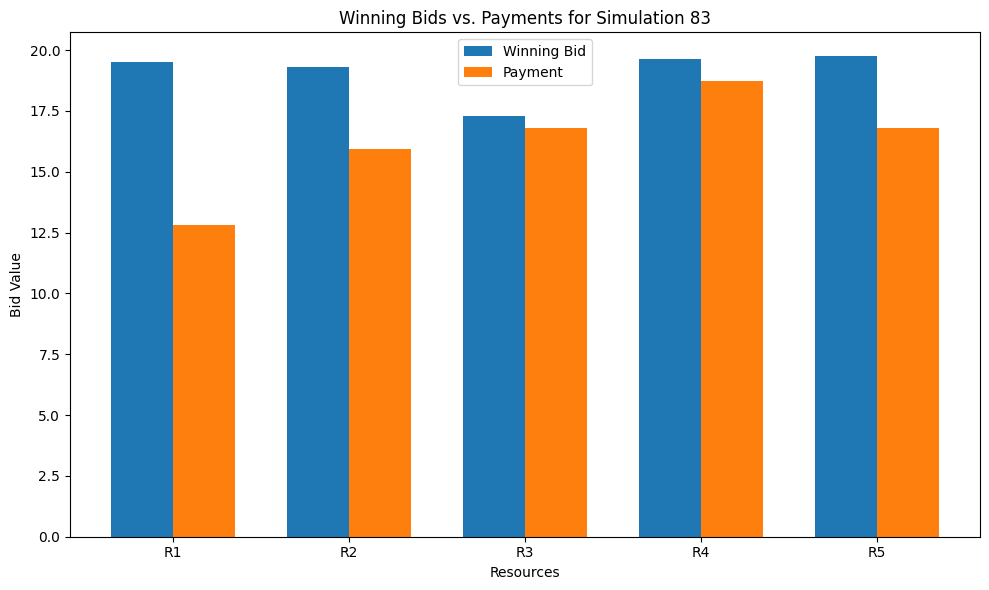

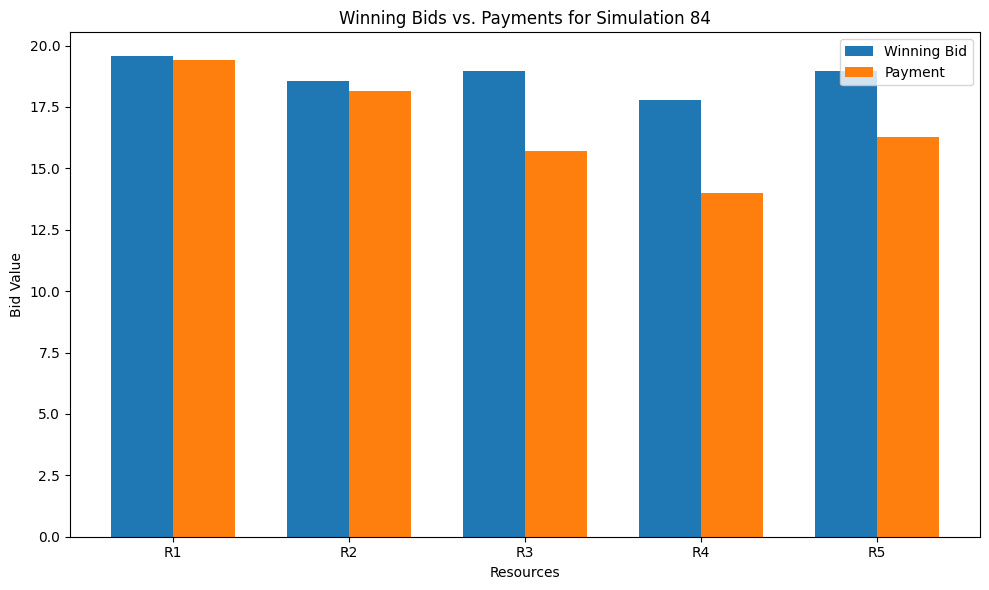

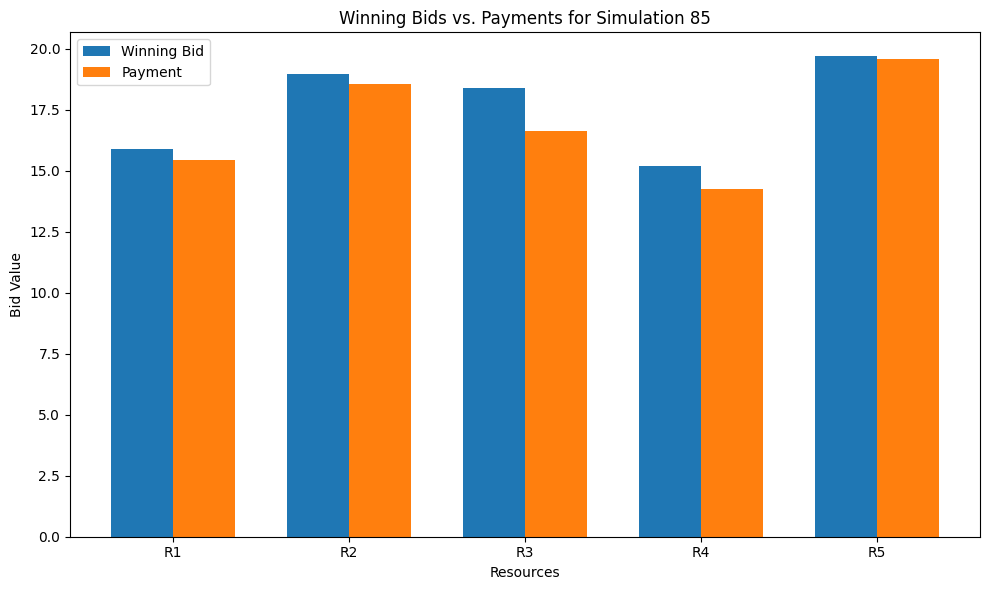

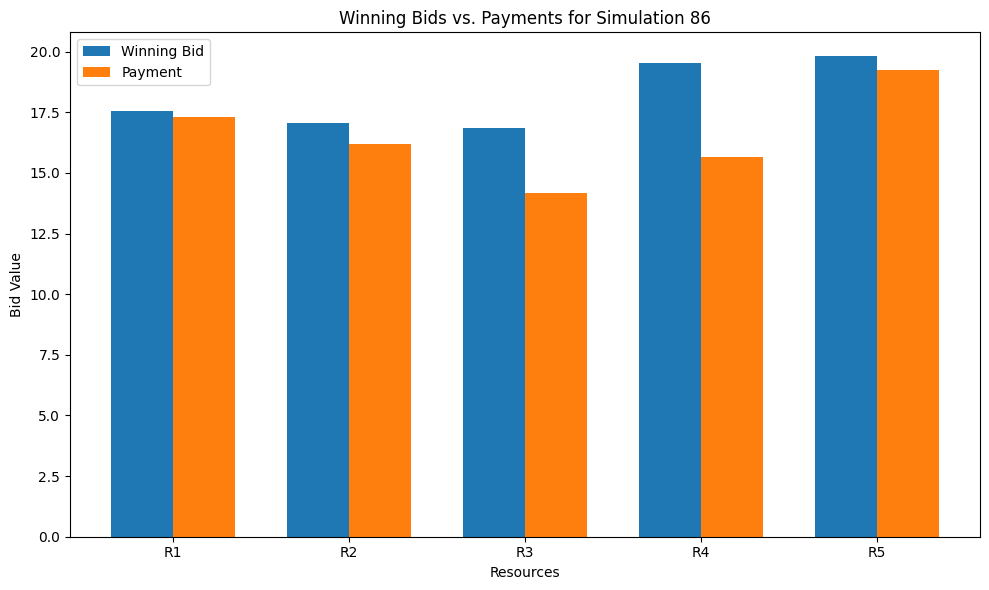

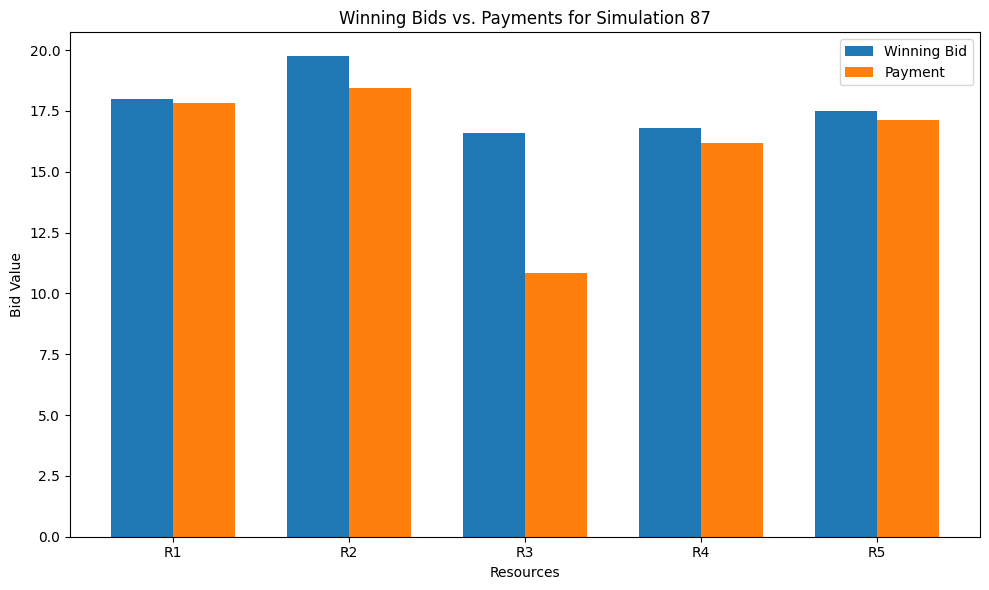

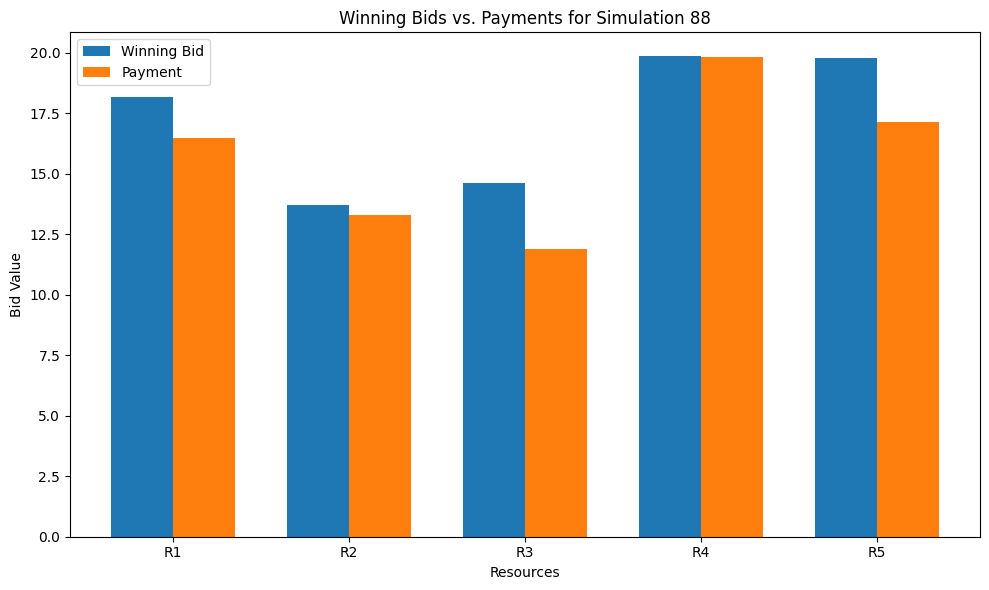

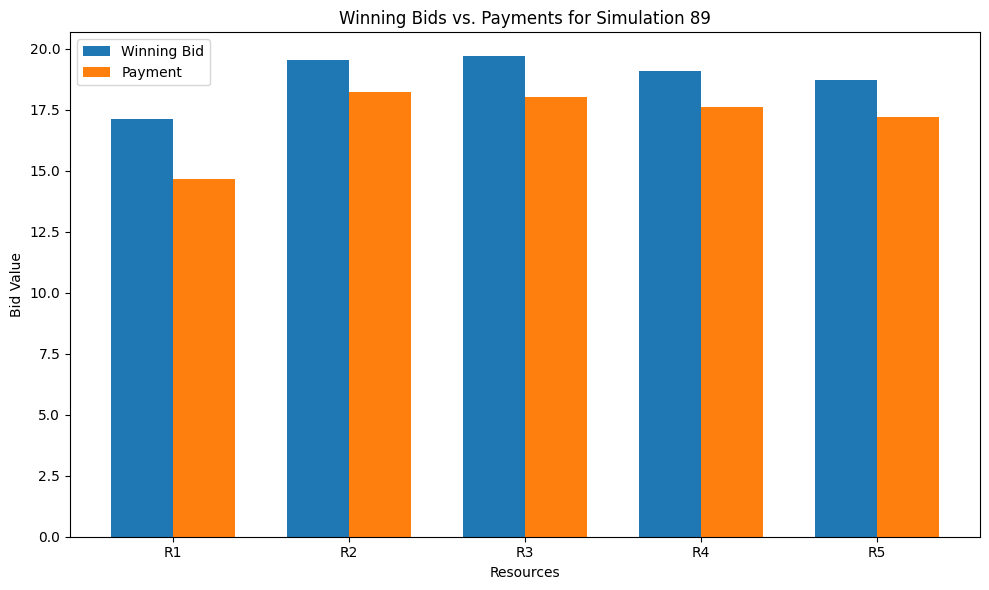

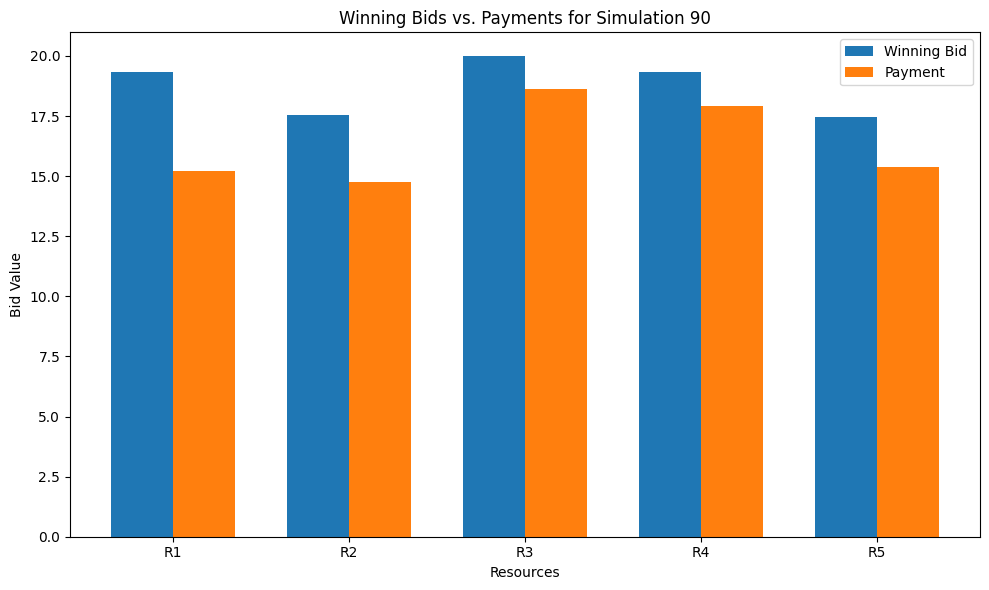

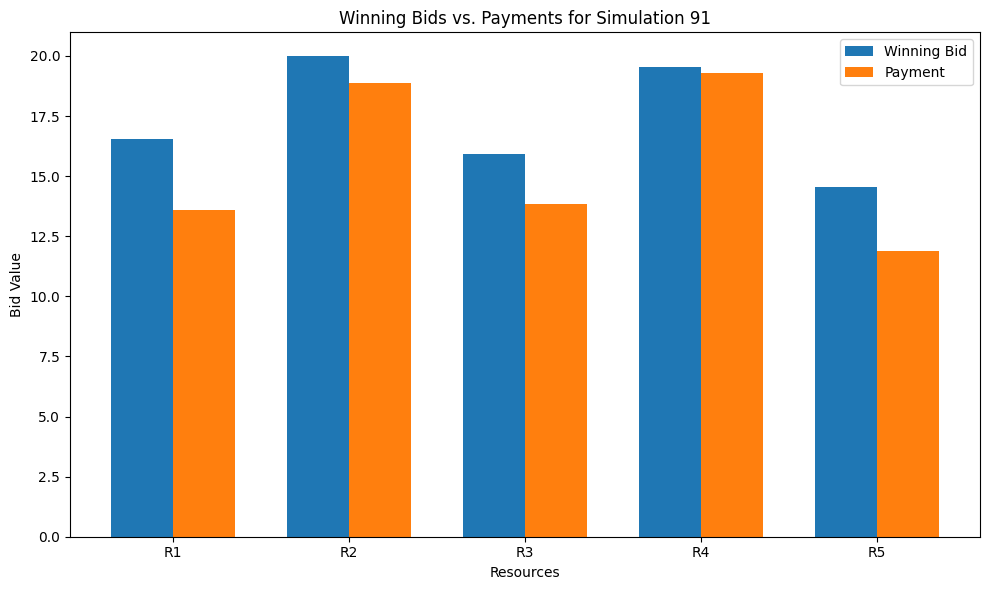

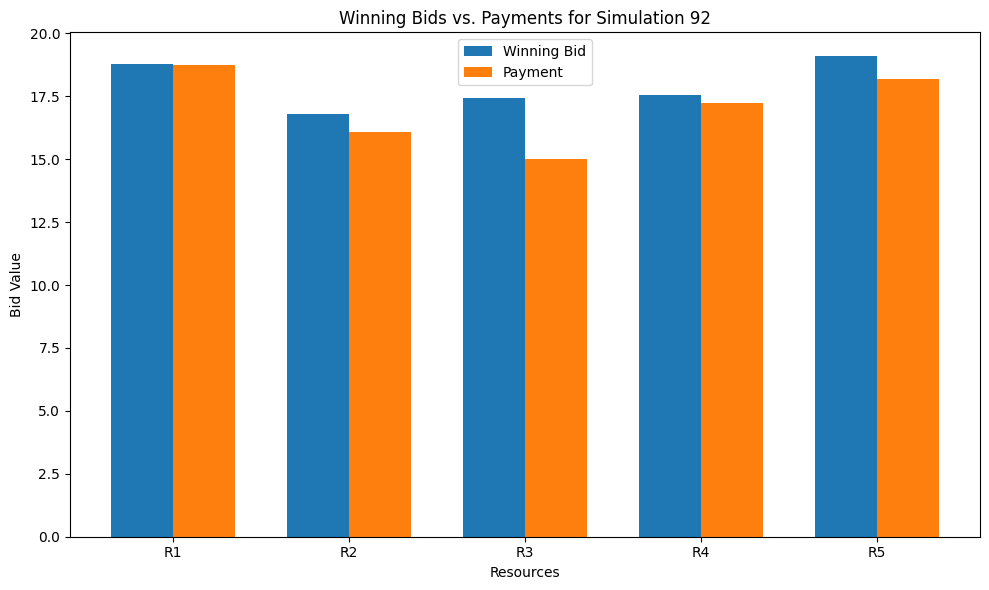

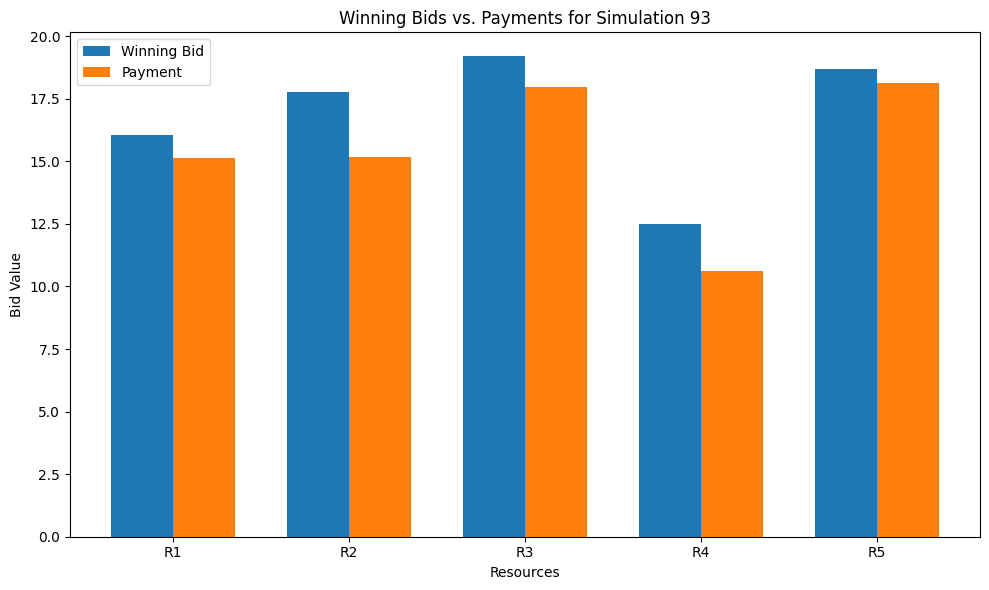

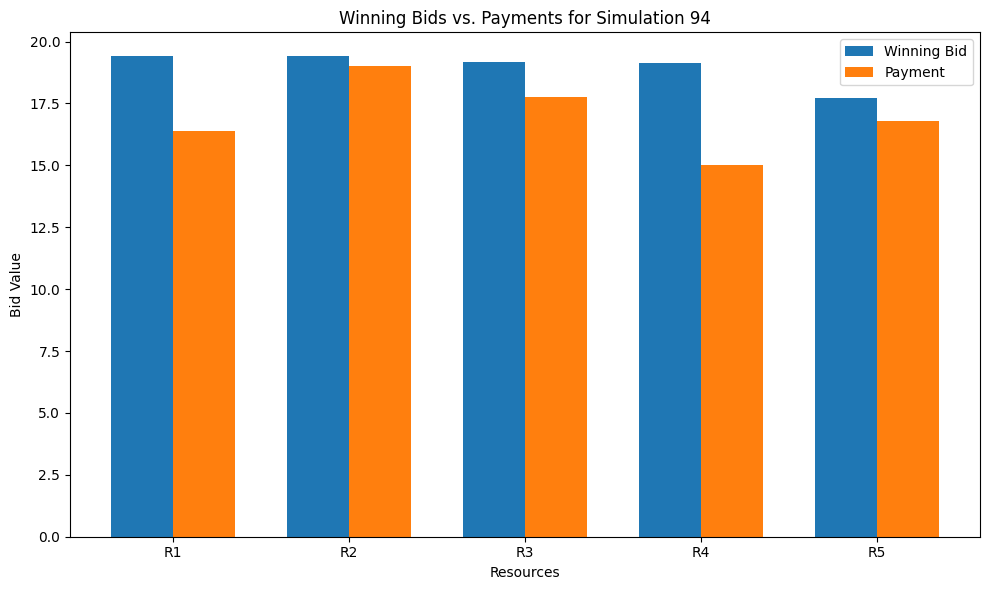

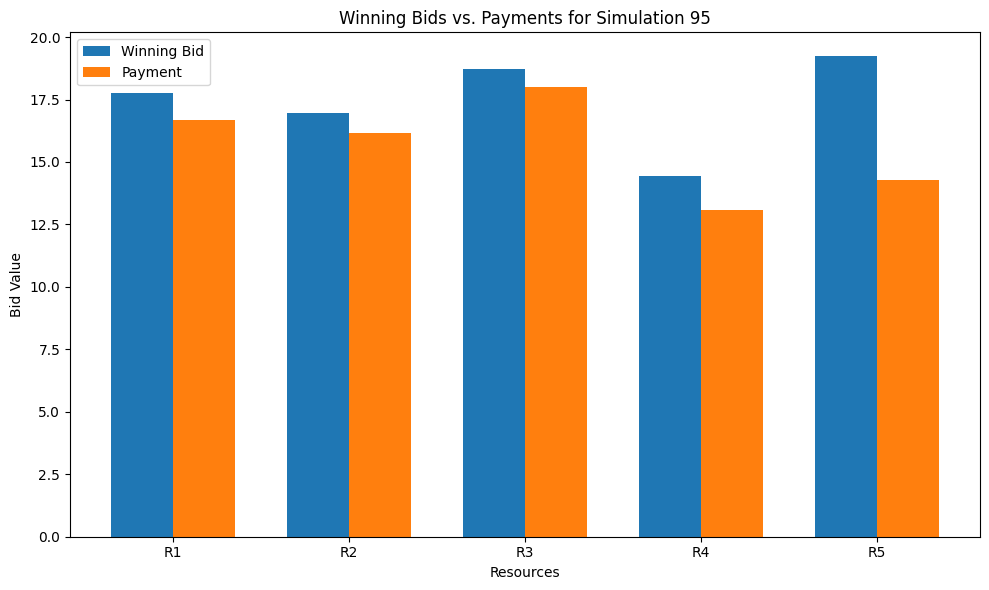

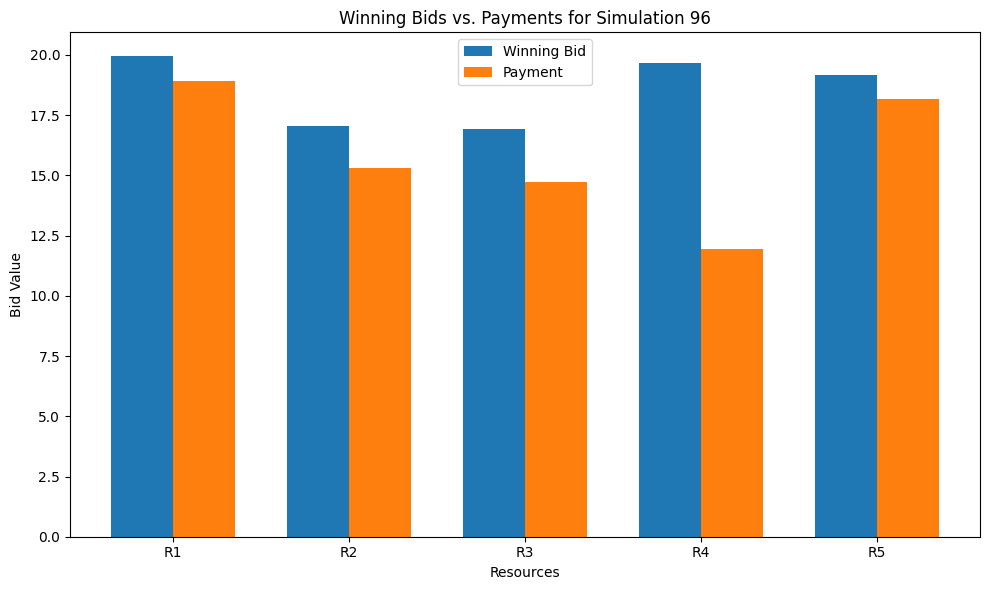

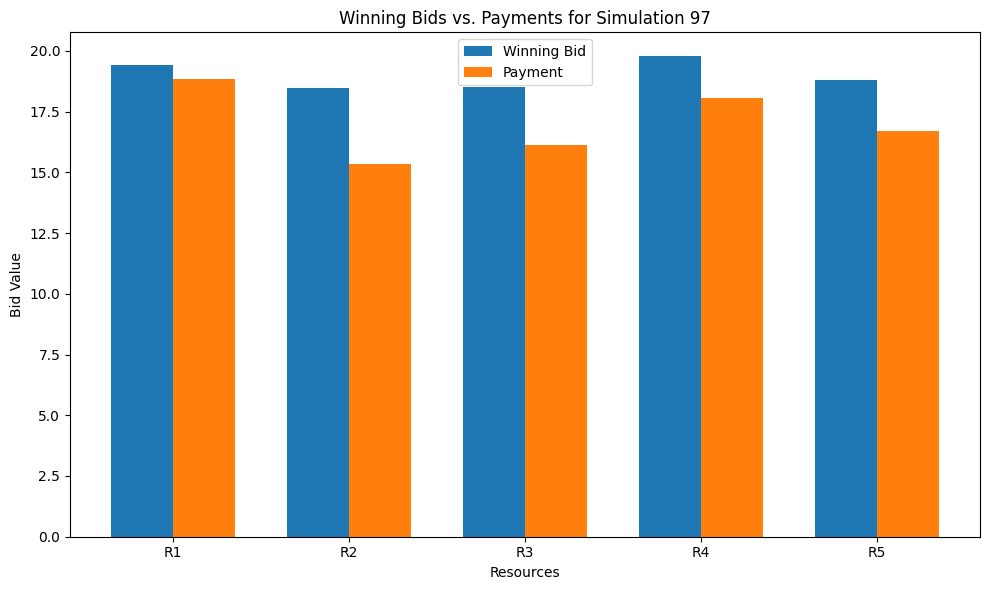

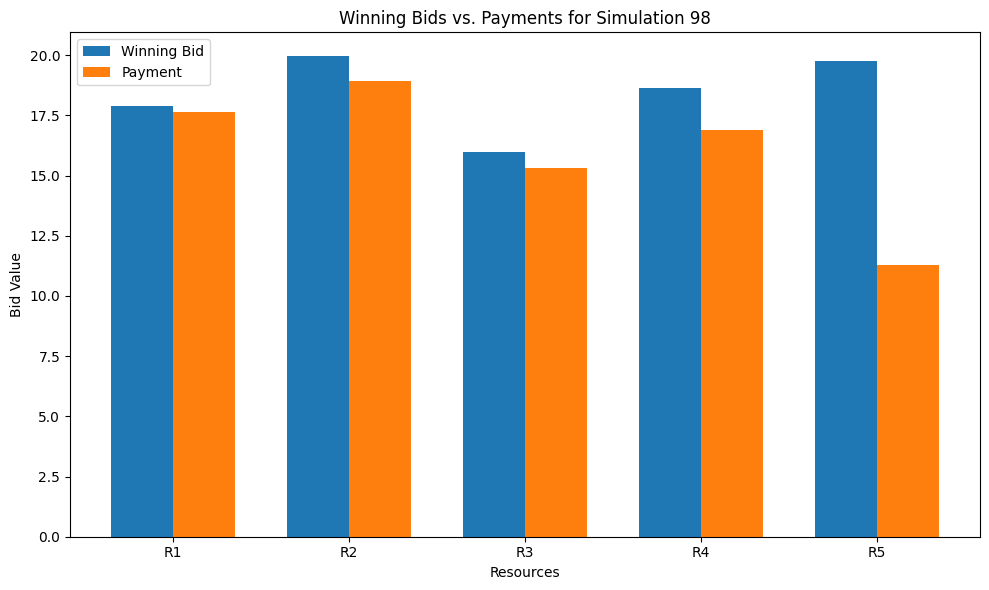

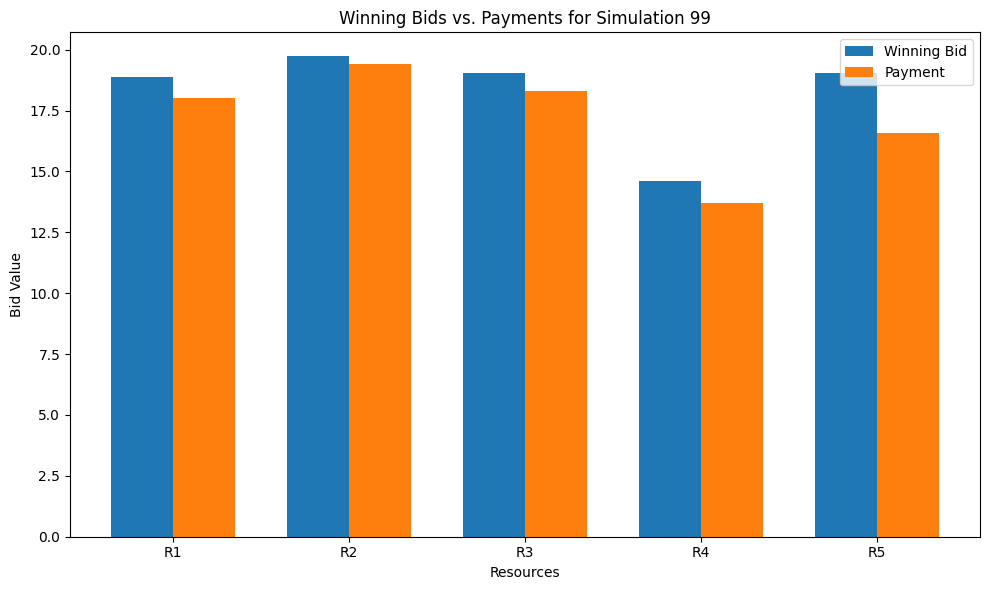

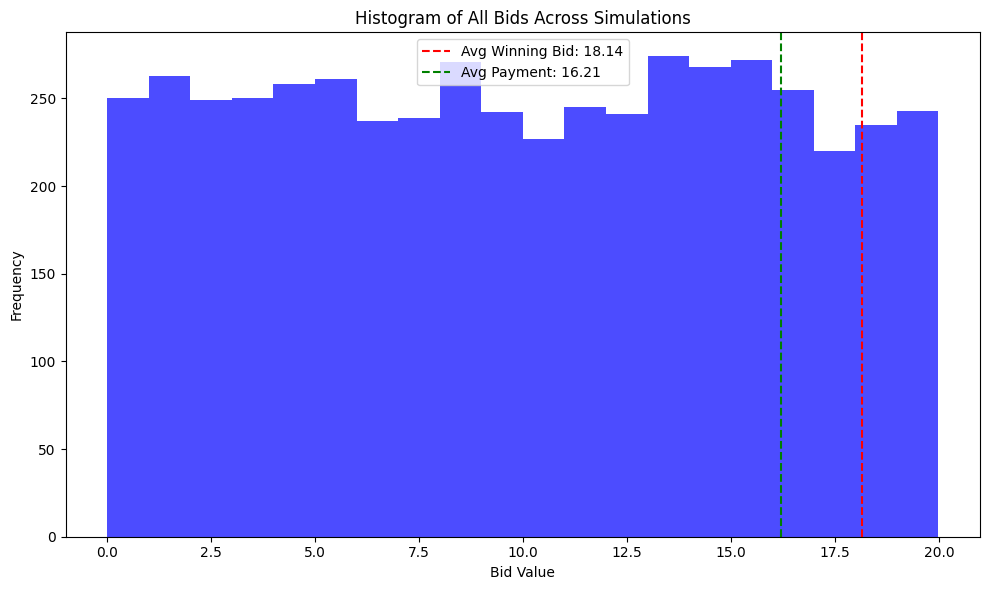


===== Simulation Results =====

Bid values:
User	R1	R2	R3	R4	R5	
u1	0.1	8.1	2.9	5.6	15.2	
u2	5.5	15.8	4.8	4.1	3.8	
u3	3.5	16.6	8.4	18.2	8.8	
u4	8.5	9.9	7.5	7.2	6.2	
u5	16.2	6.2	14.0	8.4	18.4	
u6	4.7	13.6	9.5	2.2	1.1	
u7	14.9	17.4	4.8	4.3	17.8	
u8	18.6	8.4	18.6	6.5	8.9	
u9	5.0	13.4	10.4	19.9	11.5	
u10	3.5	1.5	5.0	17.9	12.2	

Resource Allocations:
Resource r1 is allocated to User u8
Resource r2 is allocated to User u7
Resource r3 is allocated to User u8
Resource r4 is allocated to User u9
Resource r5 is allocated to User u5

User Payments:
User u1 pays 0.00
User u2 pays 0.00
User u3 pays 0.00
User u4 pays 0.00
User u5 pays 17.82
User u6 pays 0.00
User u7 pays 16.59
User u8 pays 30.23
User u9 pays 18.18
User u10 pays 0.00

Executing quantum job using allocated resources...
Quantum Circuit:
     ┌───┐                             ┌─┐   
q_0: ┤ H ├──■────■───────■───────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐  │       │     └╥┘   
q_1: ─────┤ X ├──┼──┤M├──┼───────┼──────╫────
          └───┘┌─

/tmp/ipykernel_3998/4269279969.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


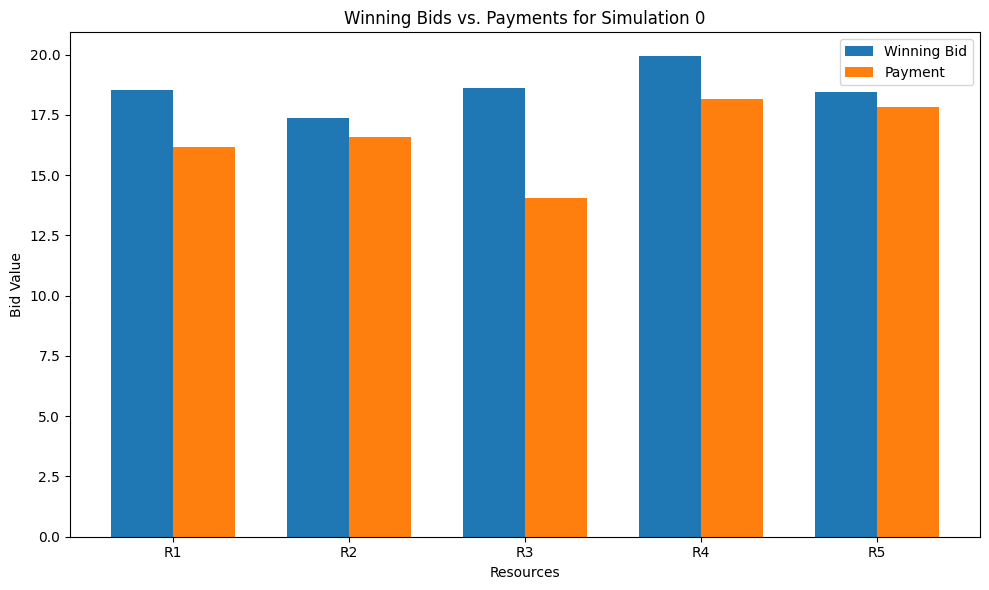

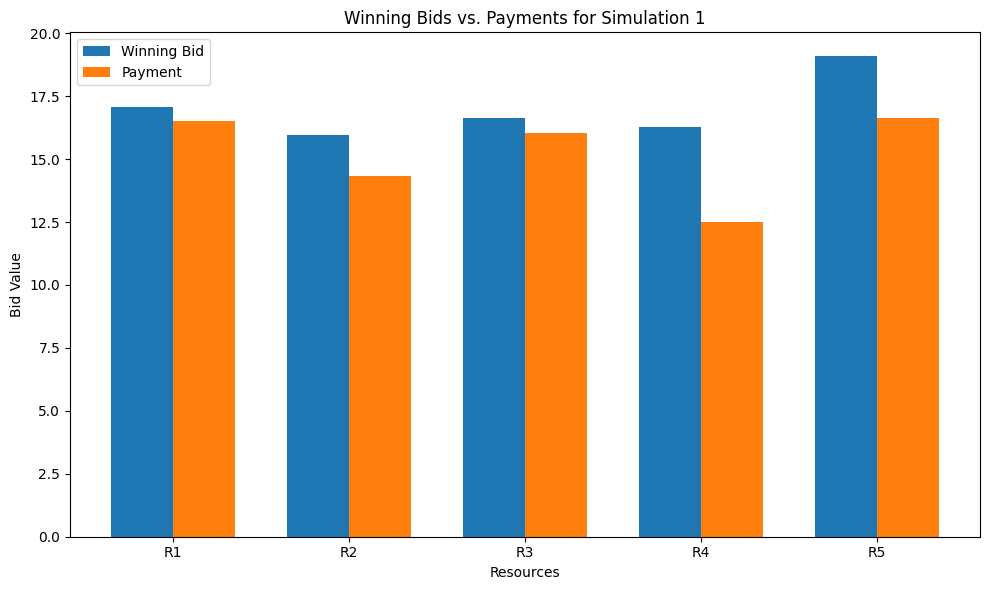

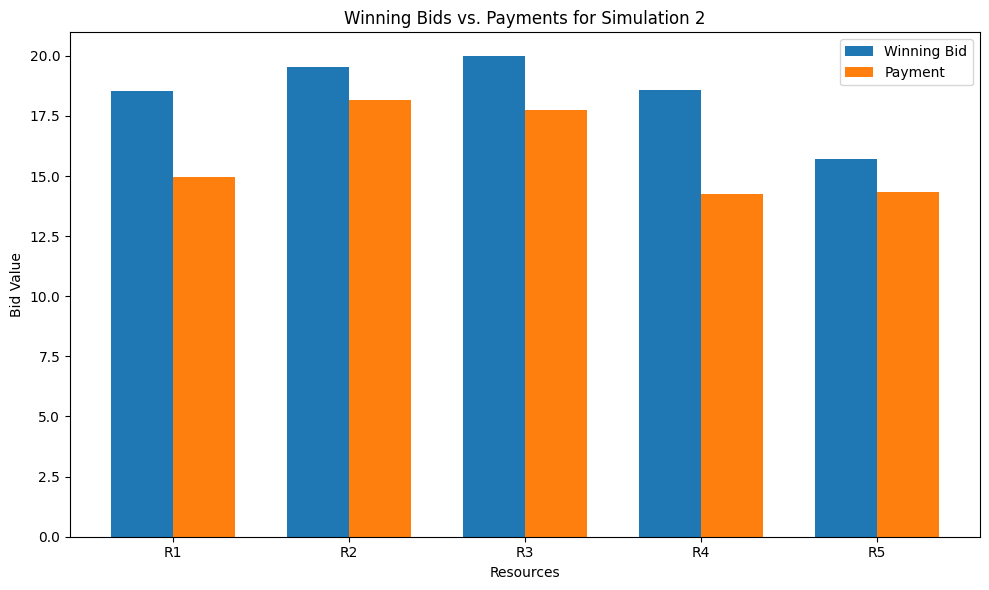

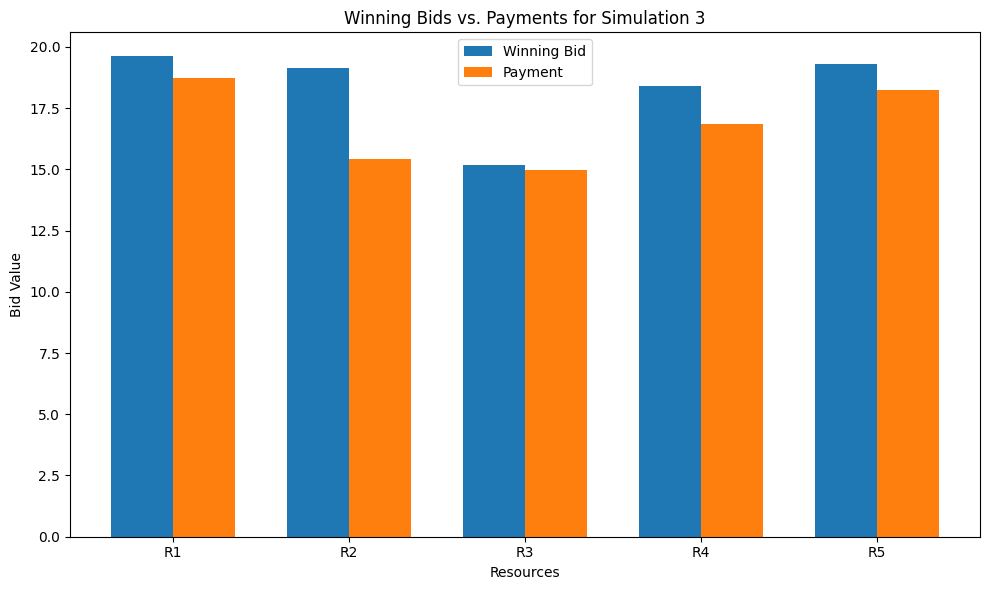

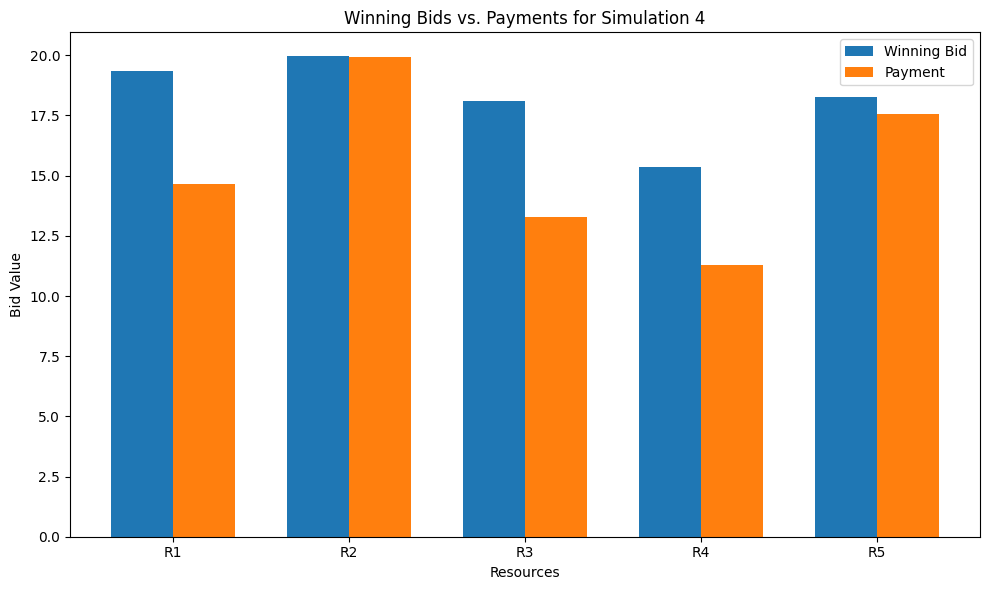

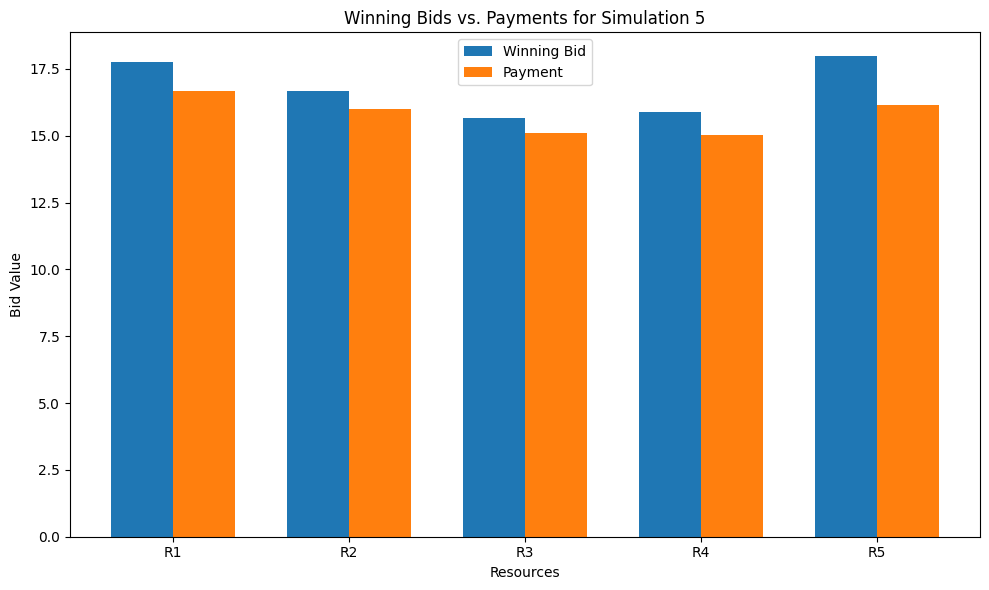

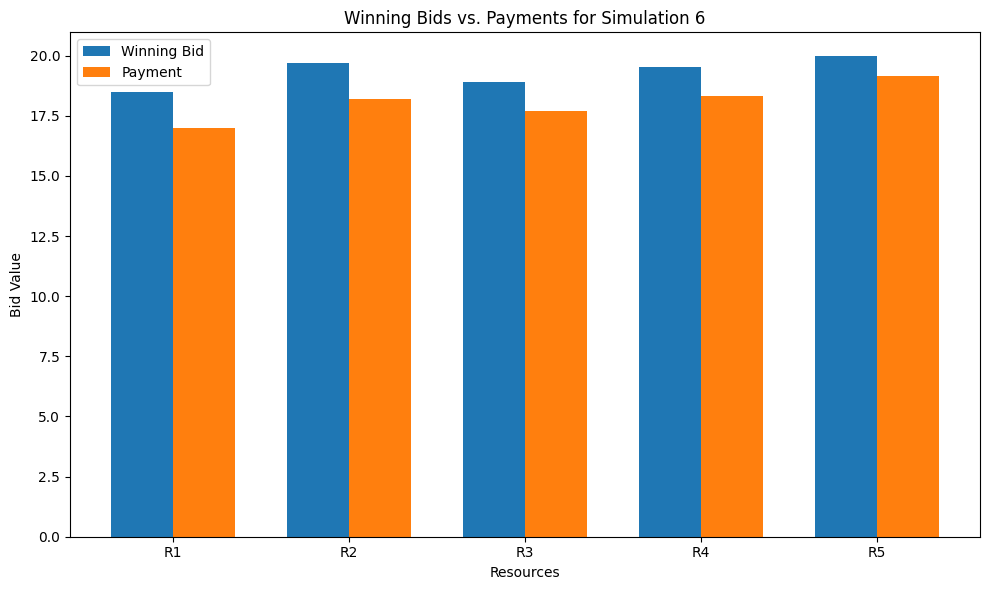

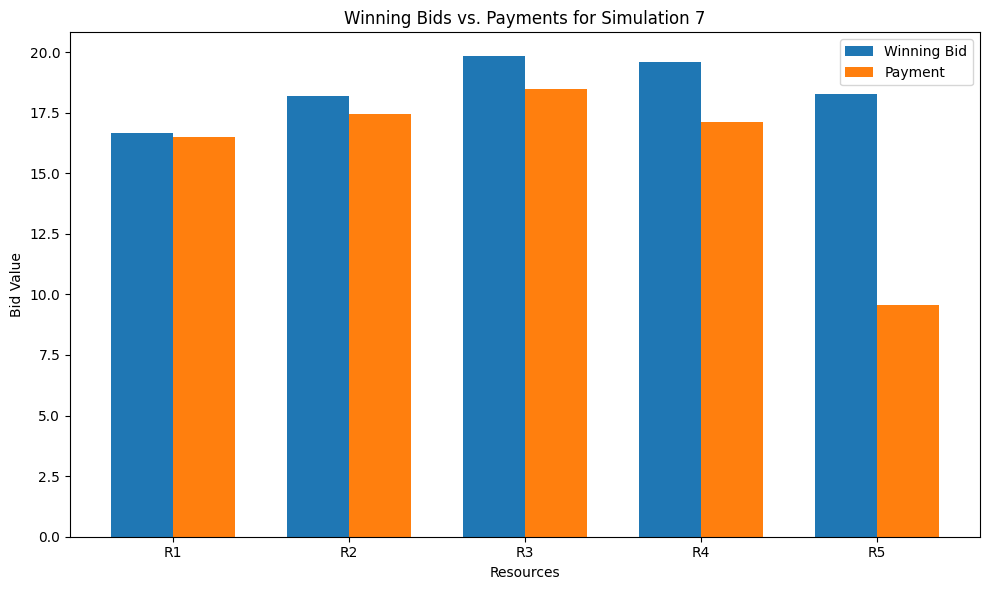

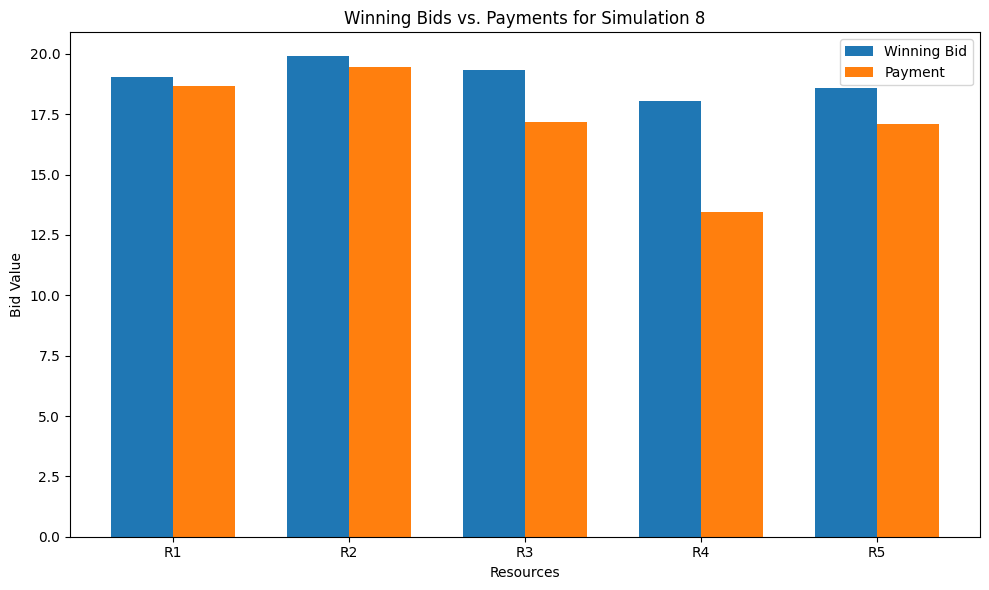

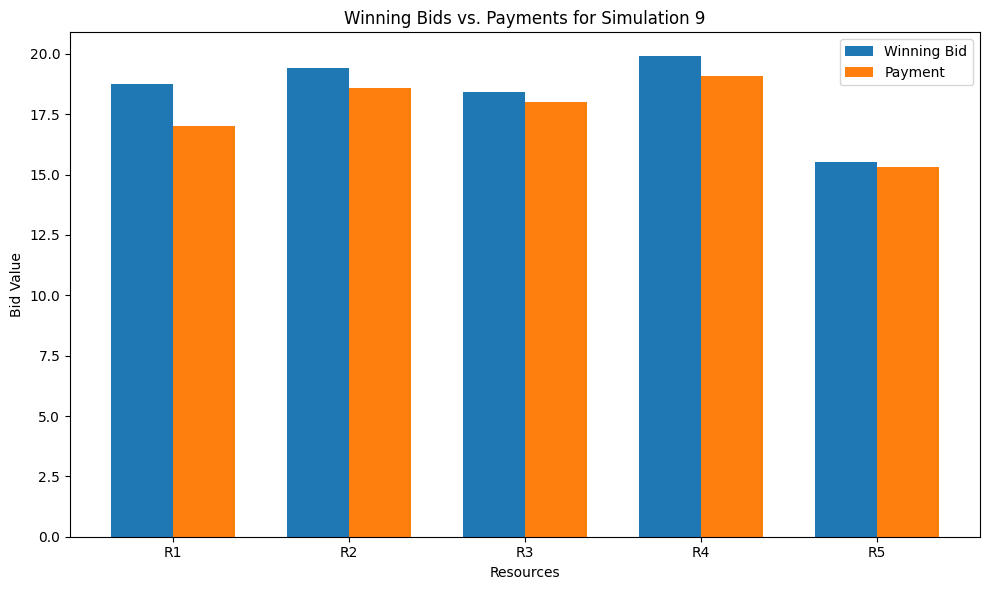

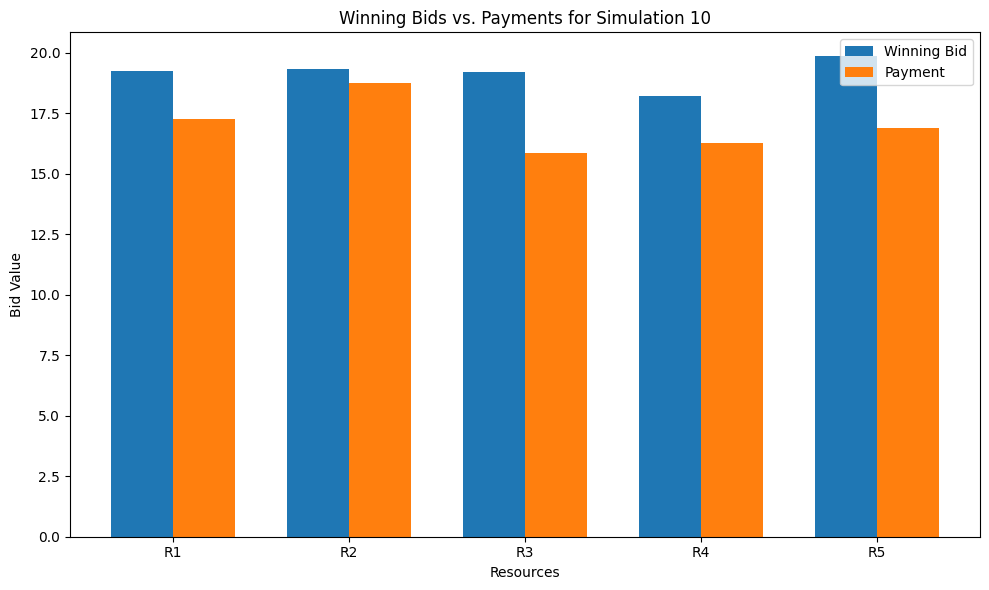

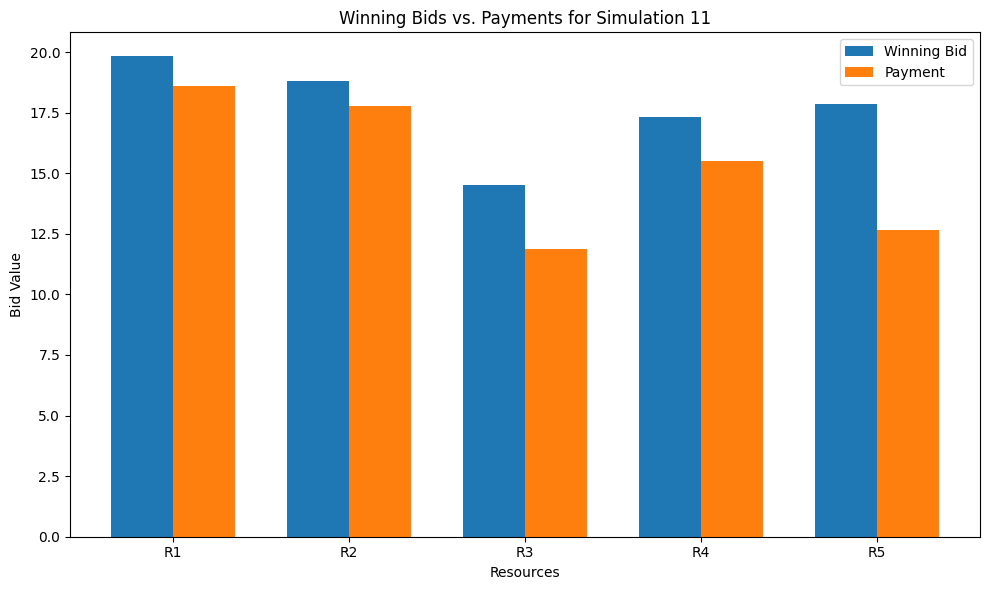

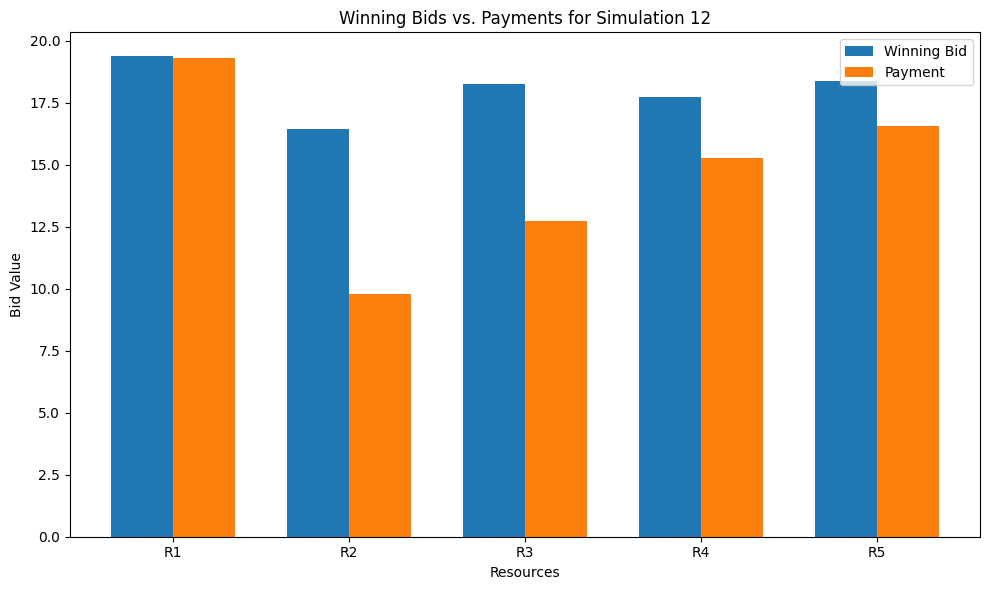

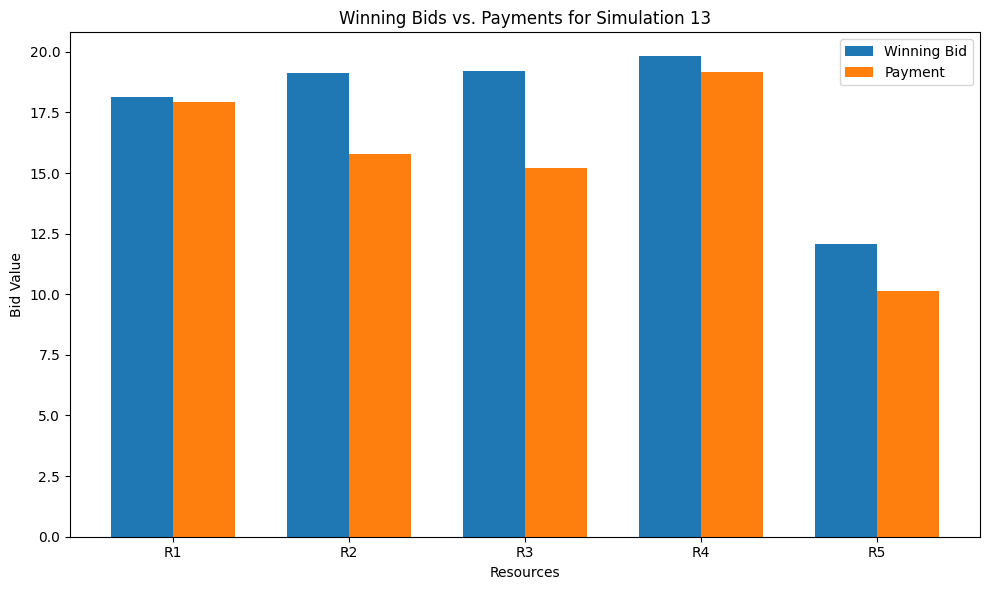

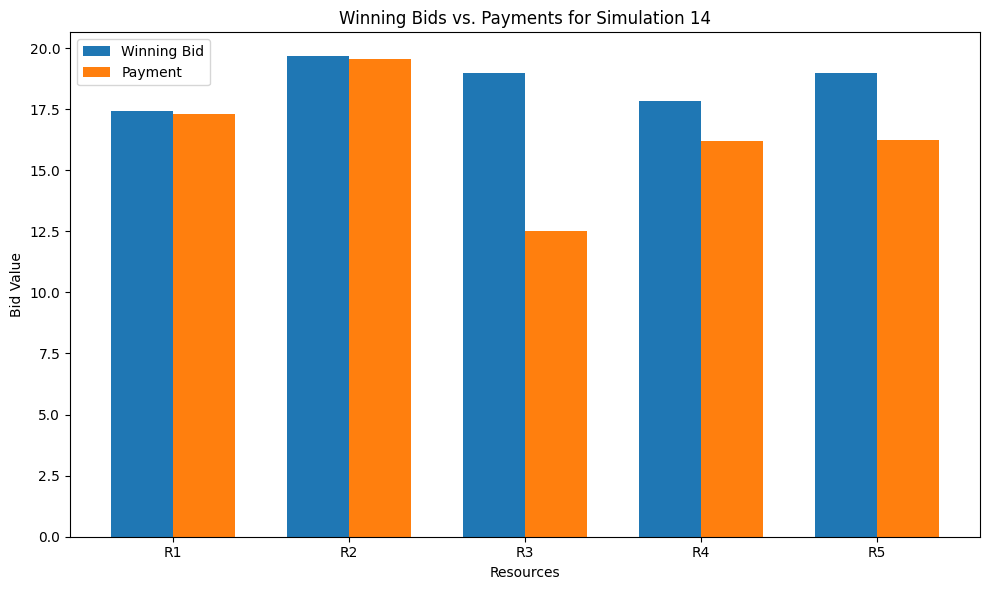

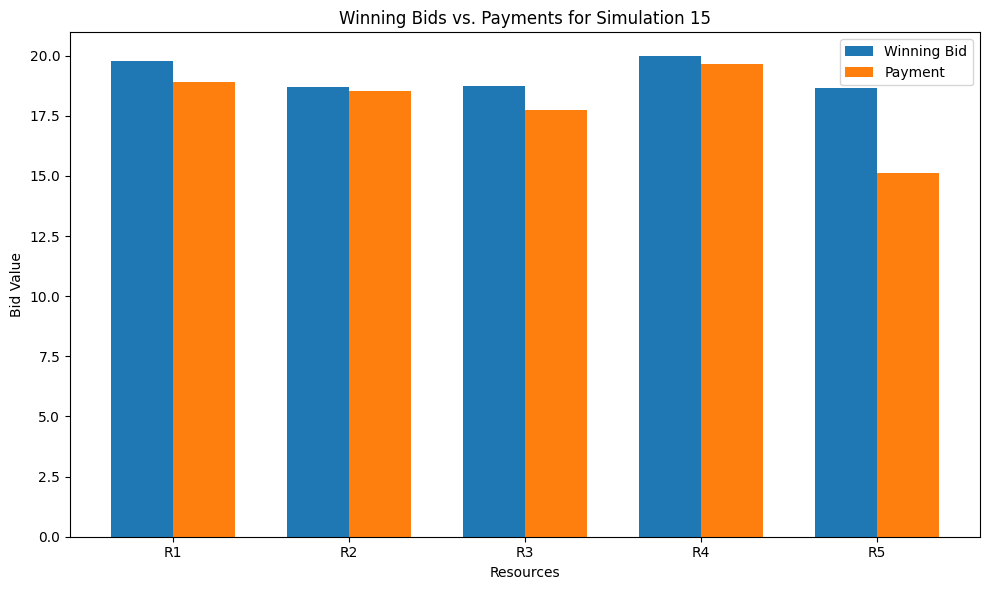

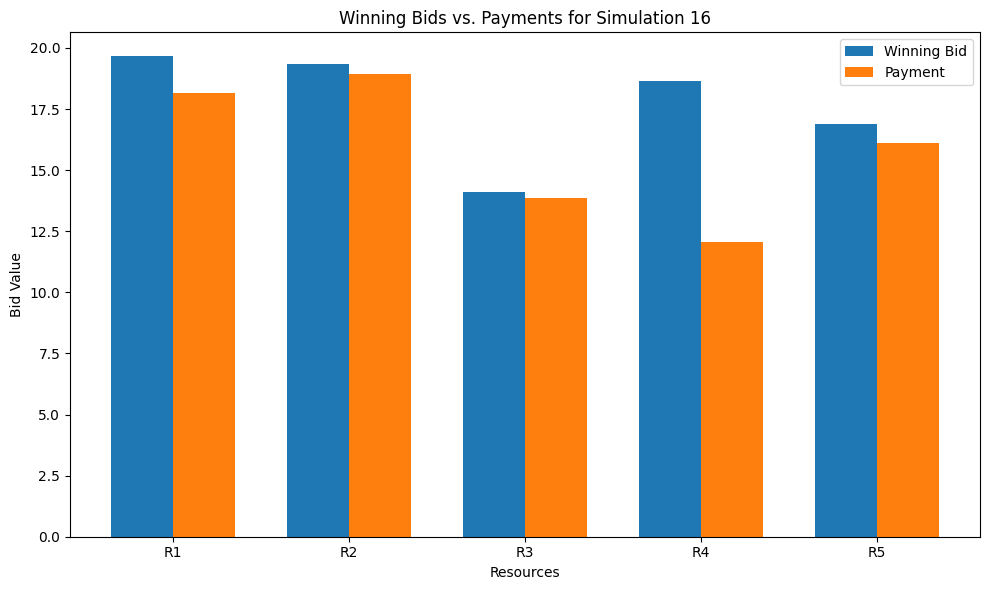

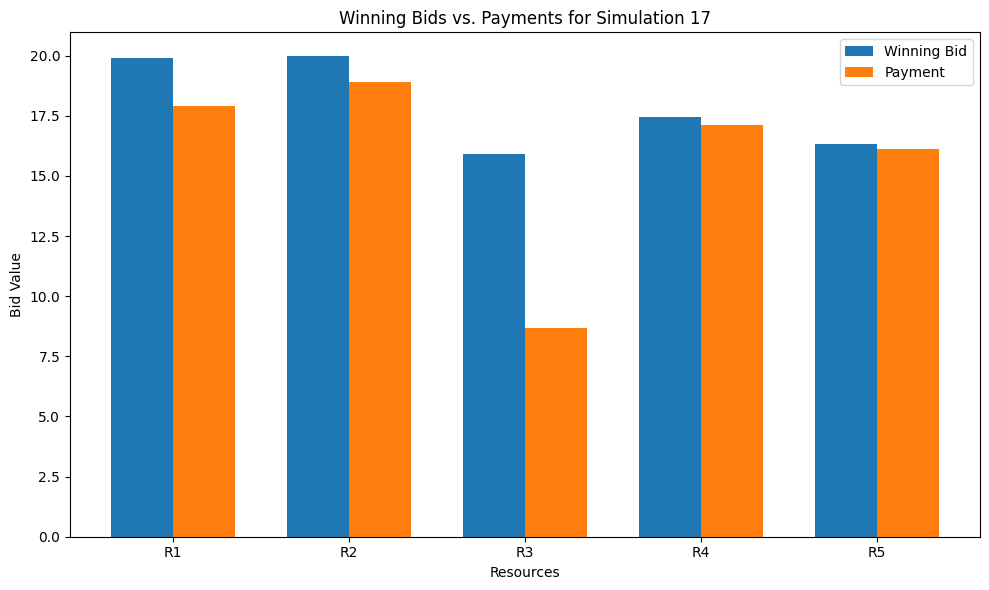

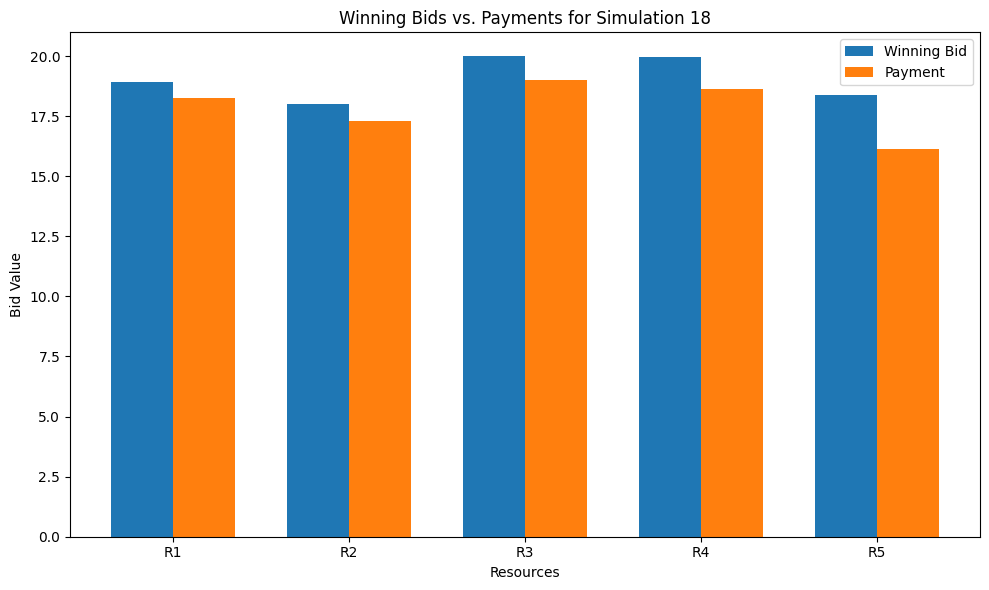

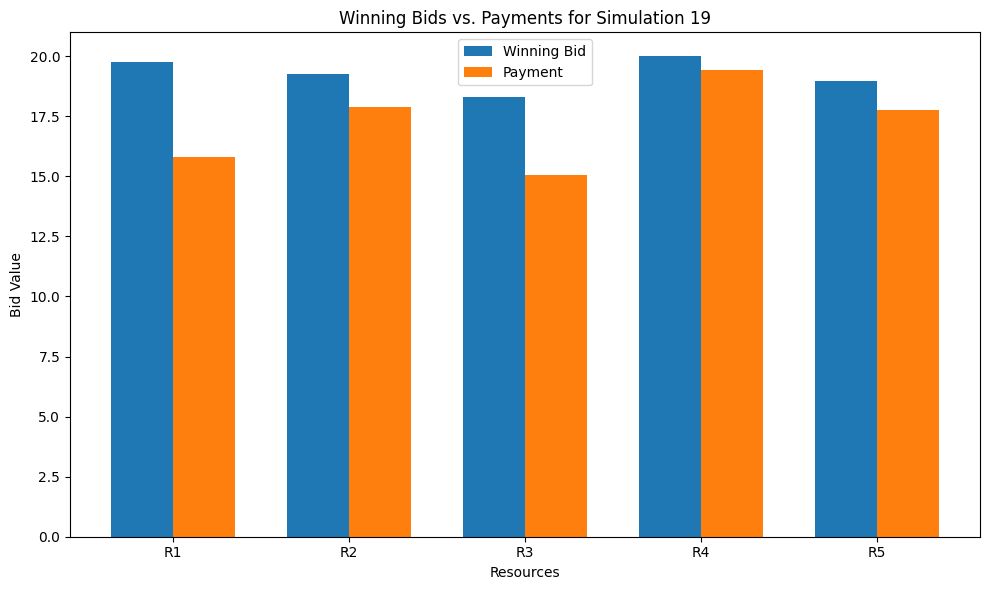

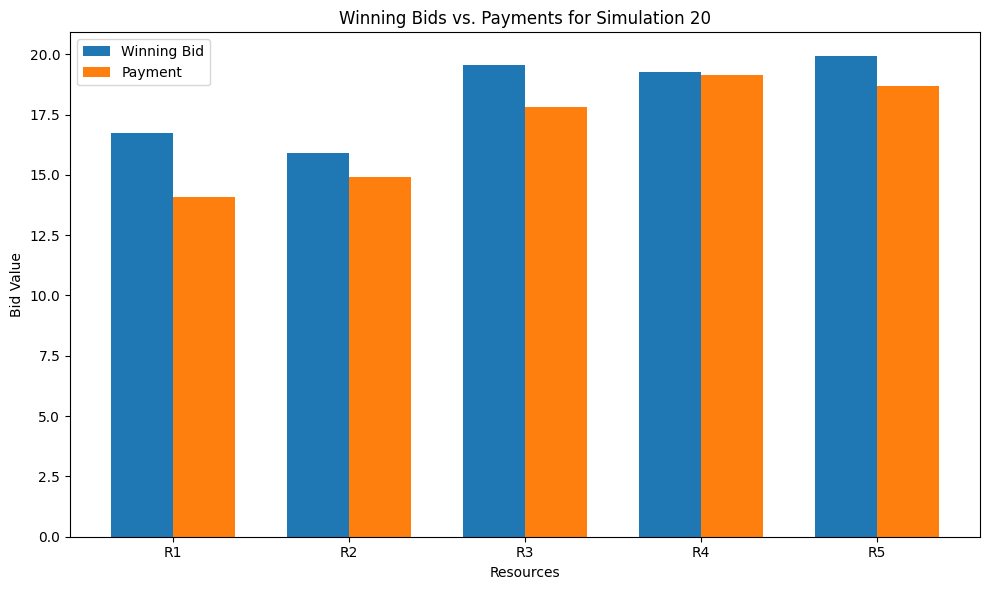

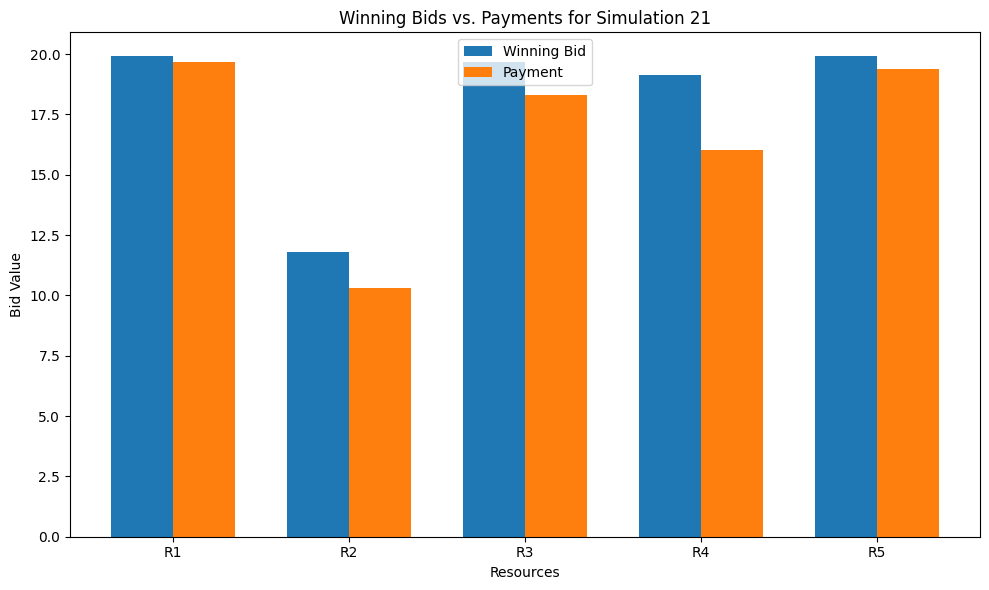

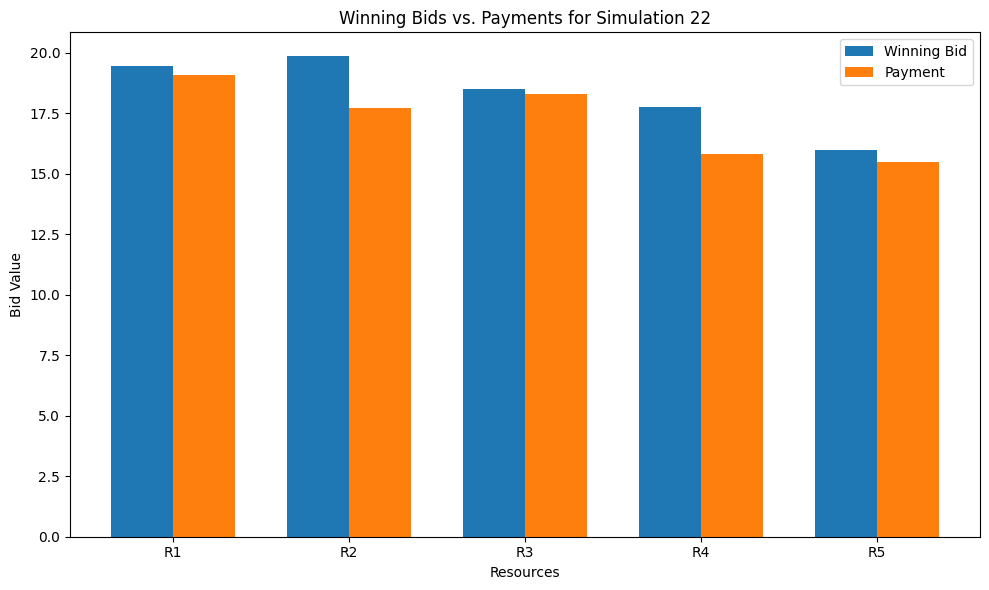

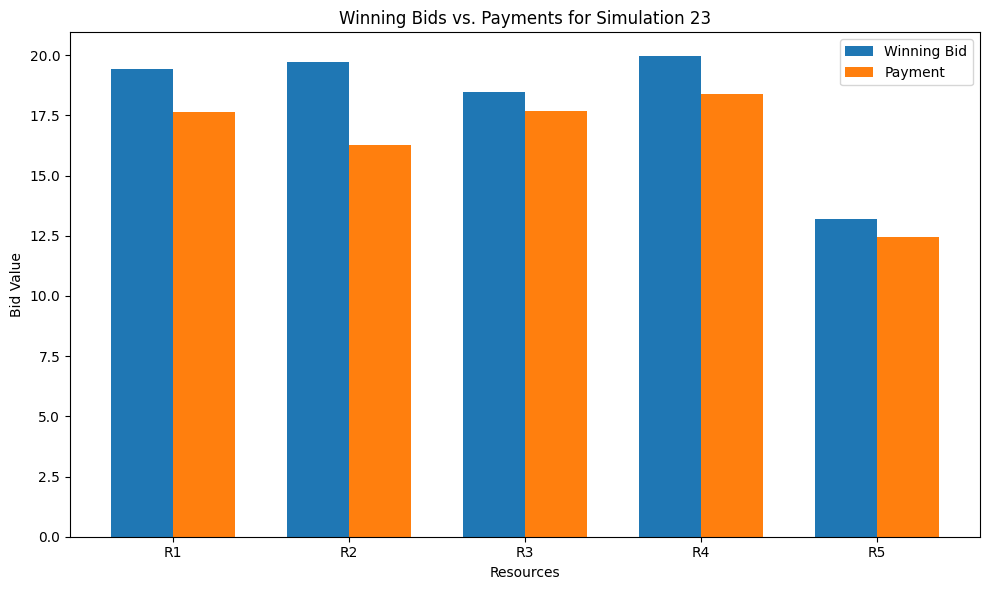

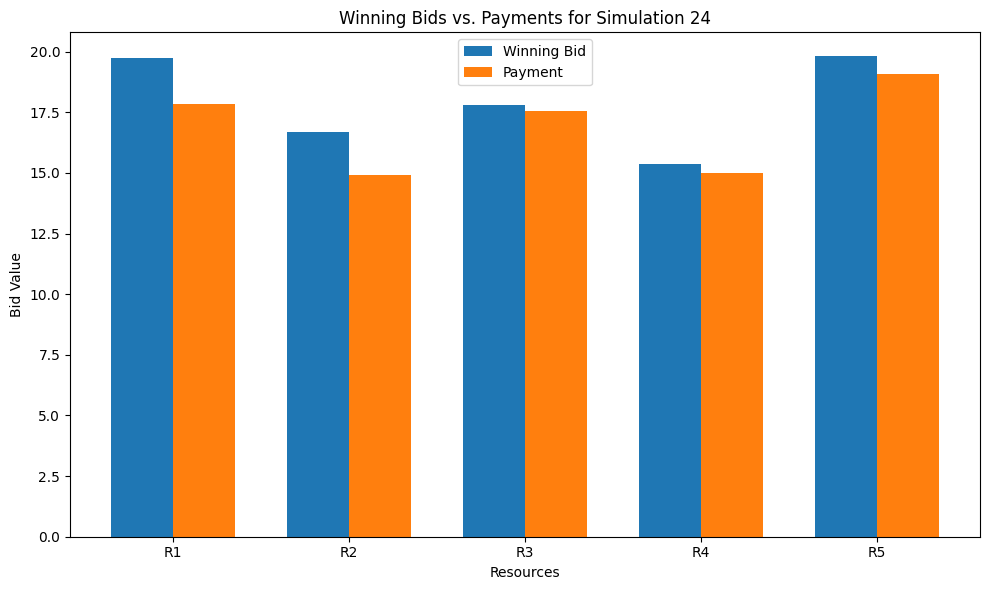

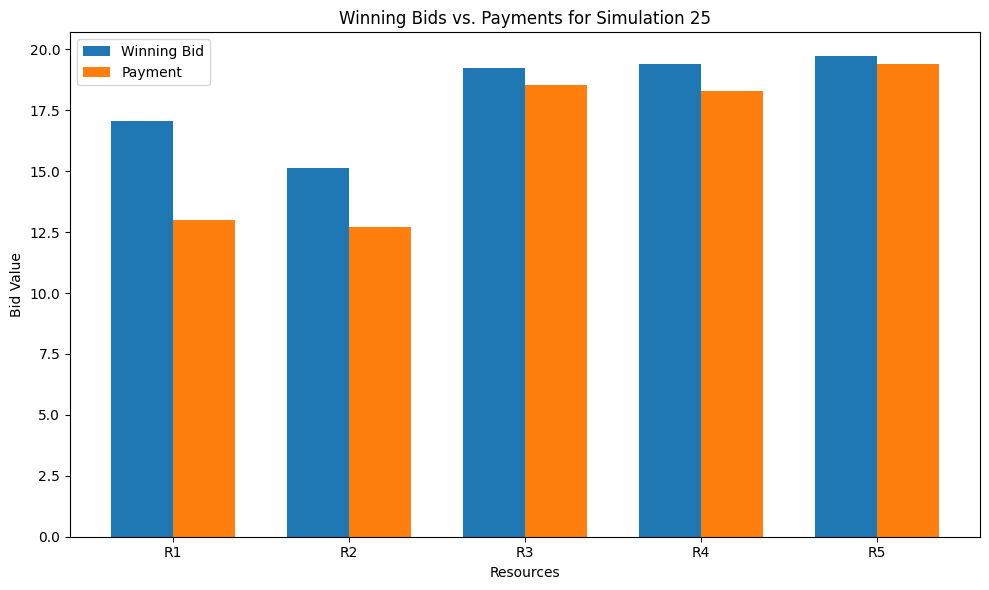

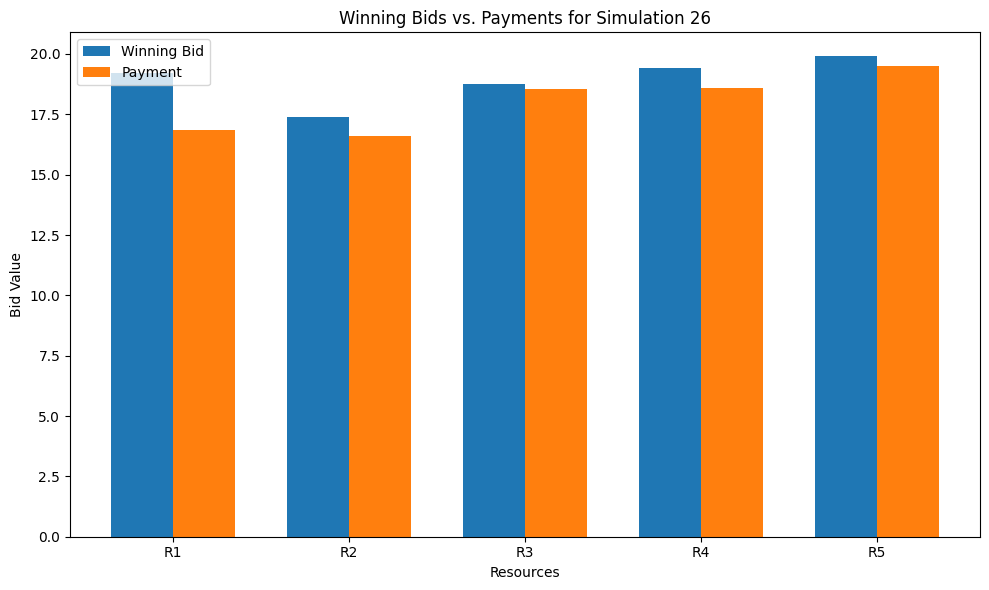

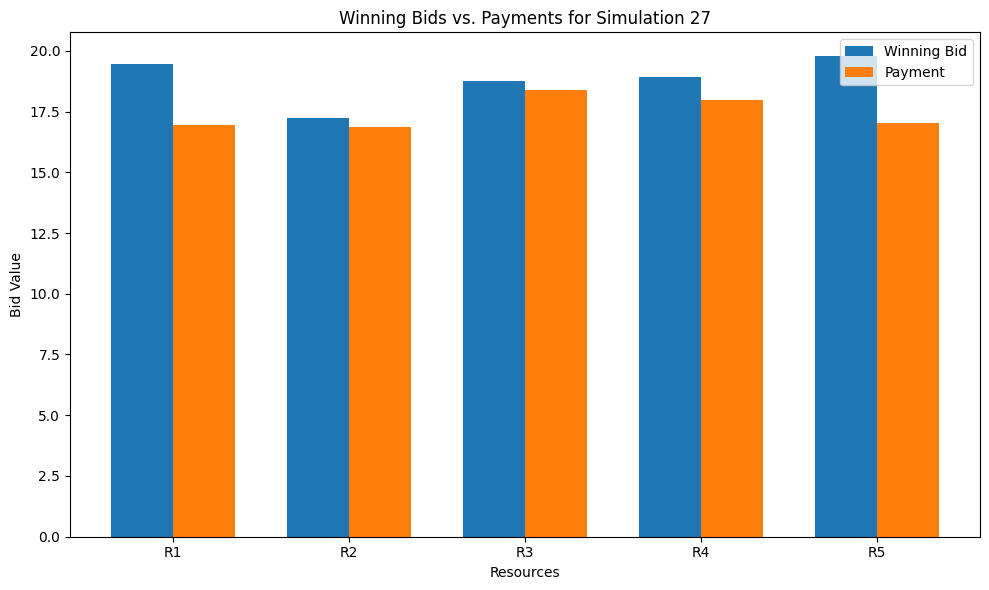

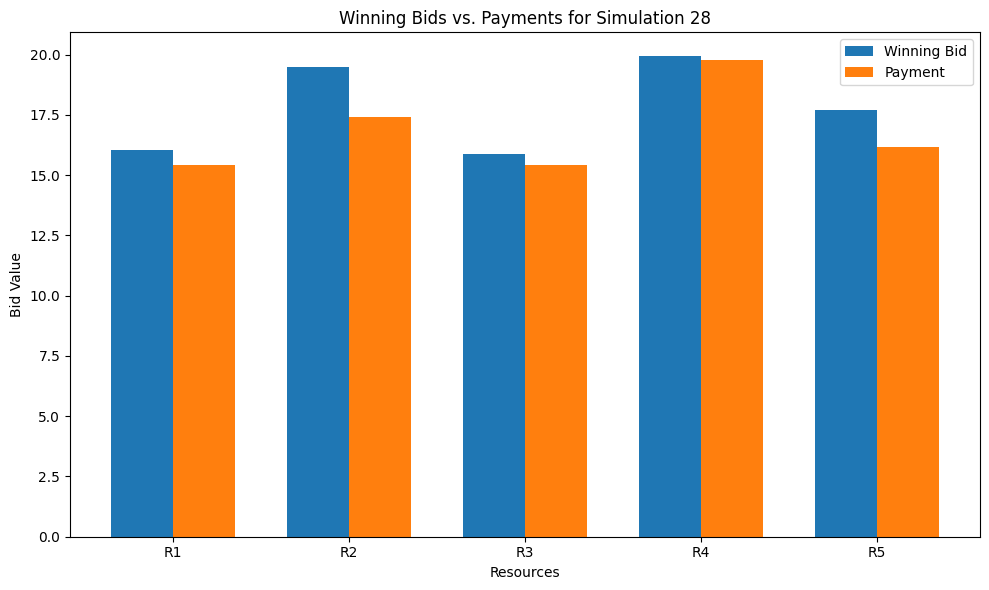

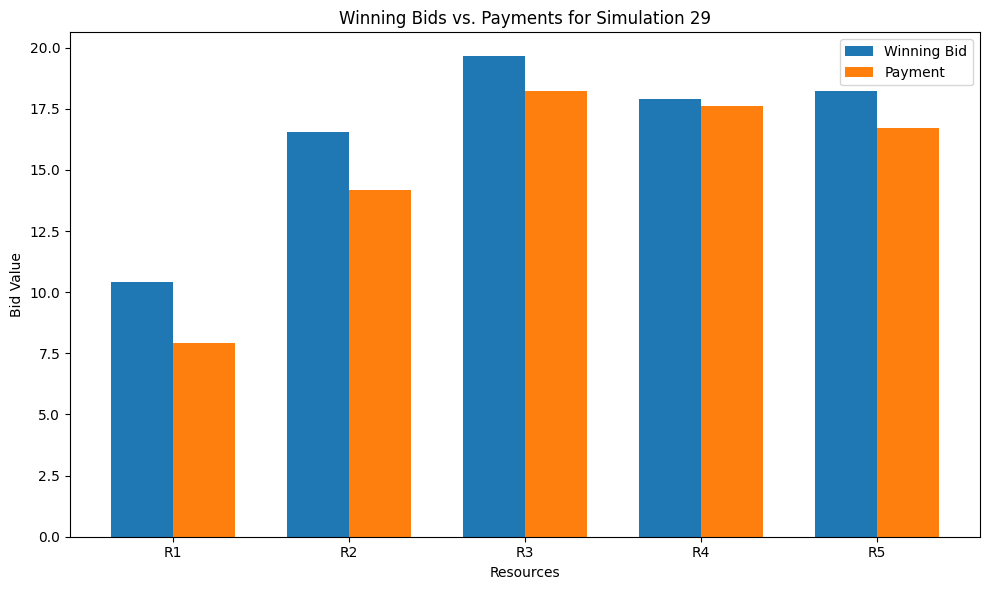

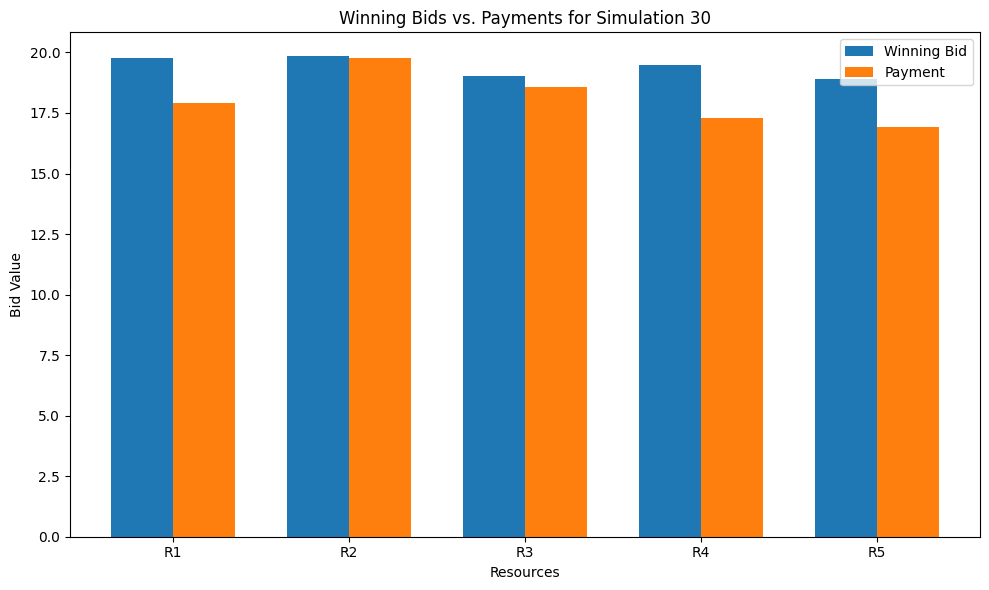

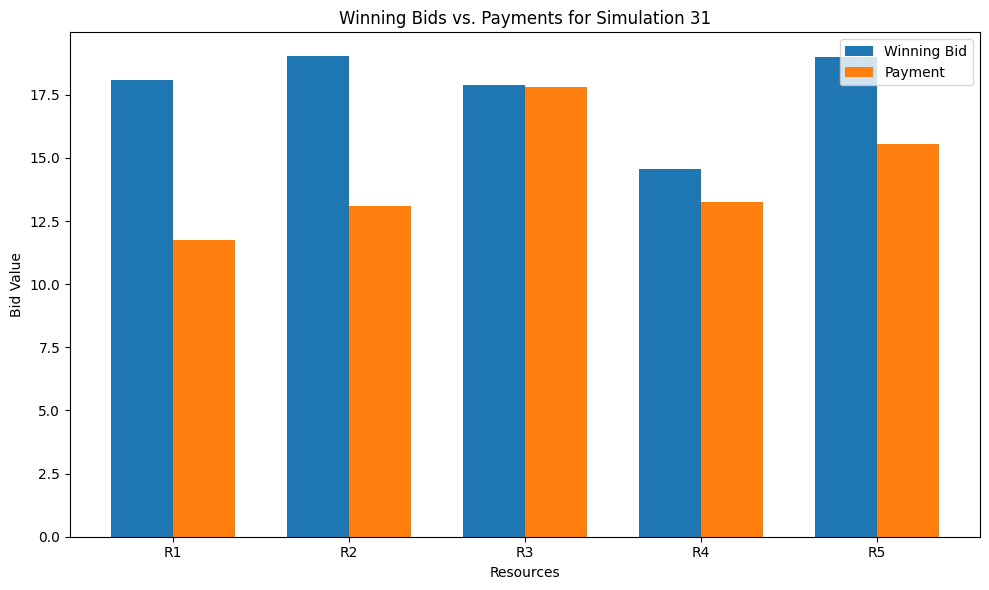

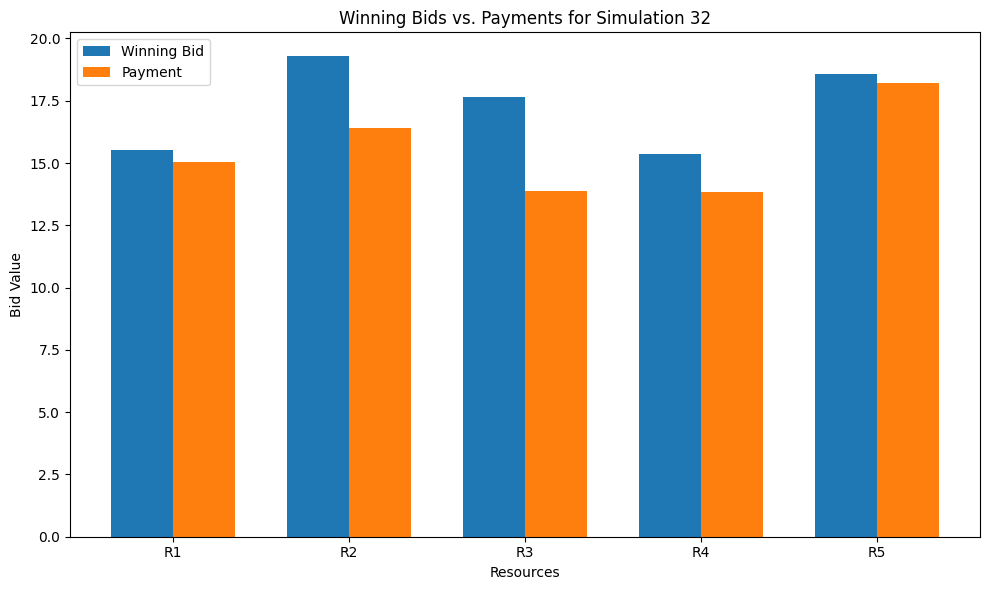

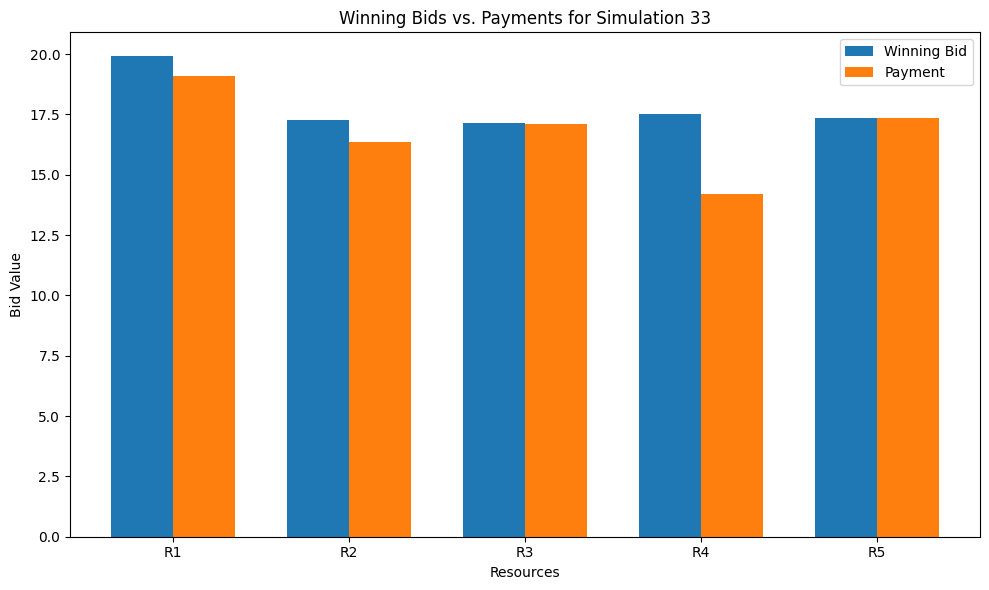

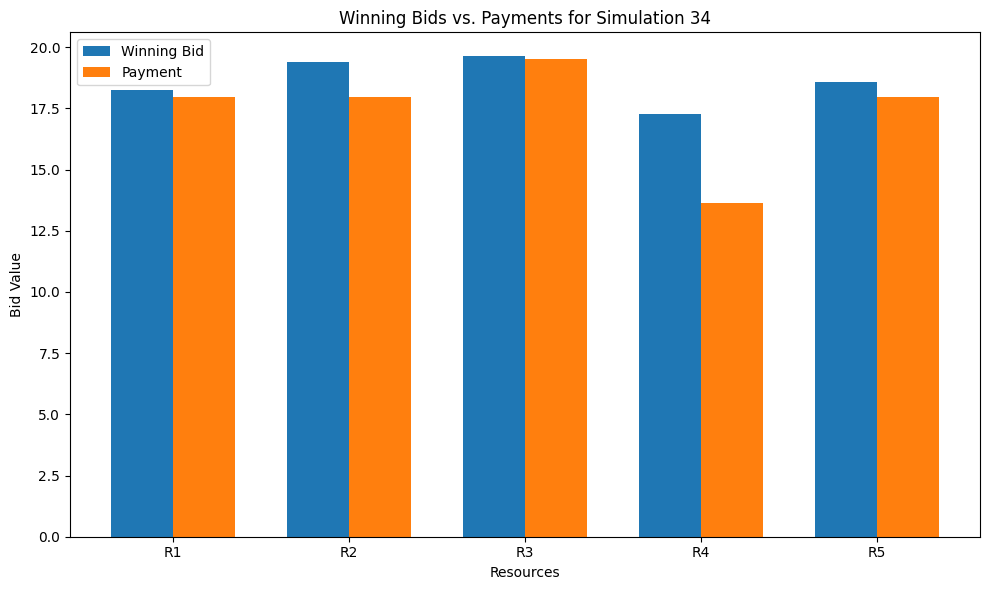

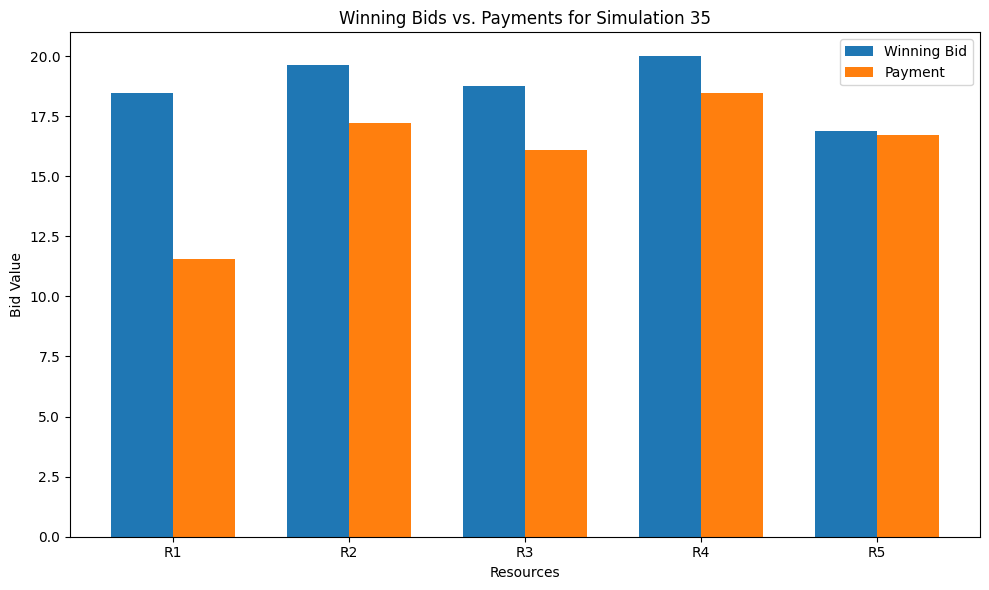

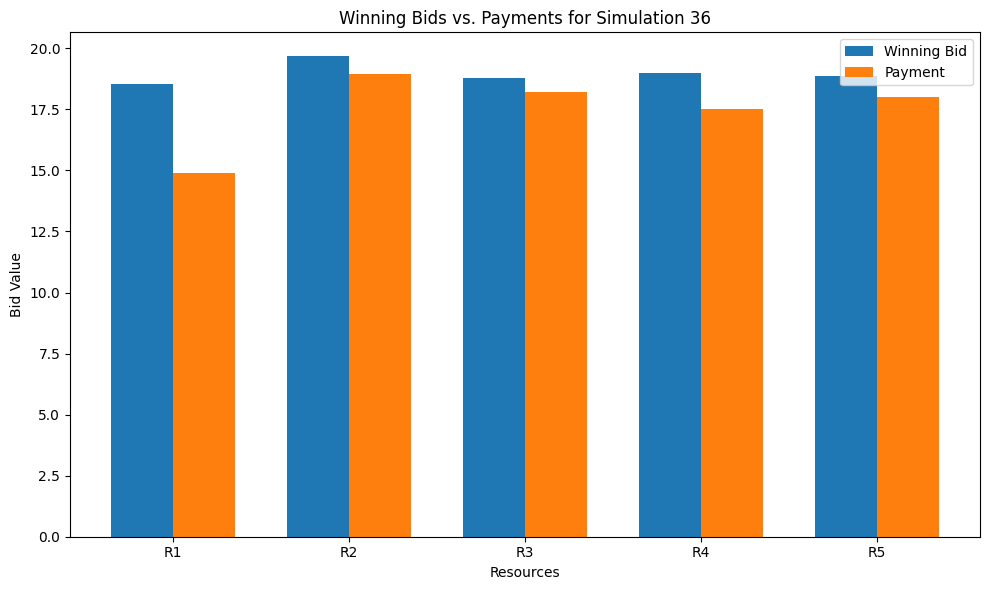

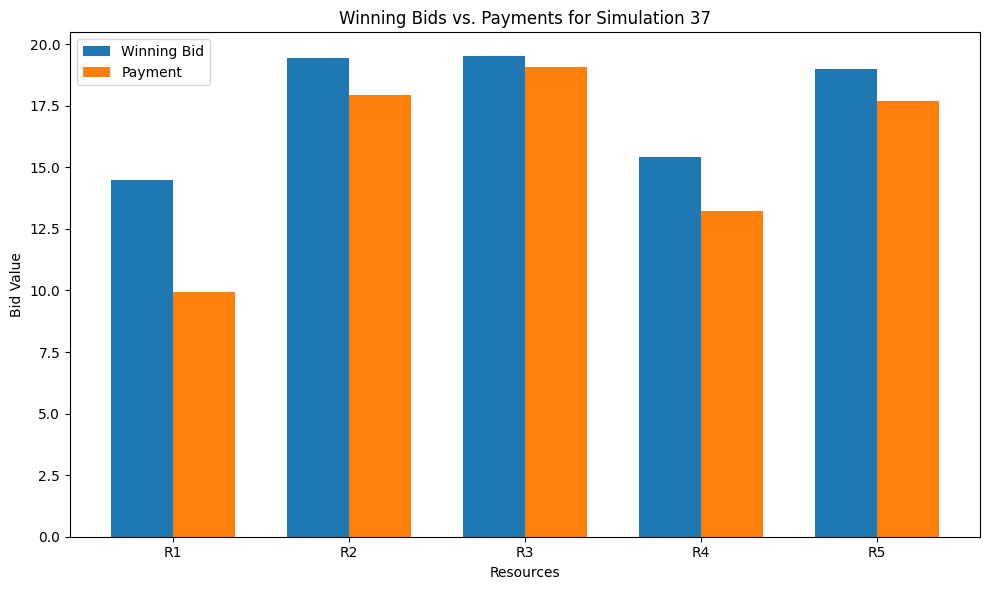

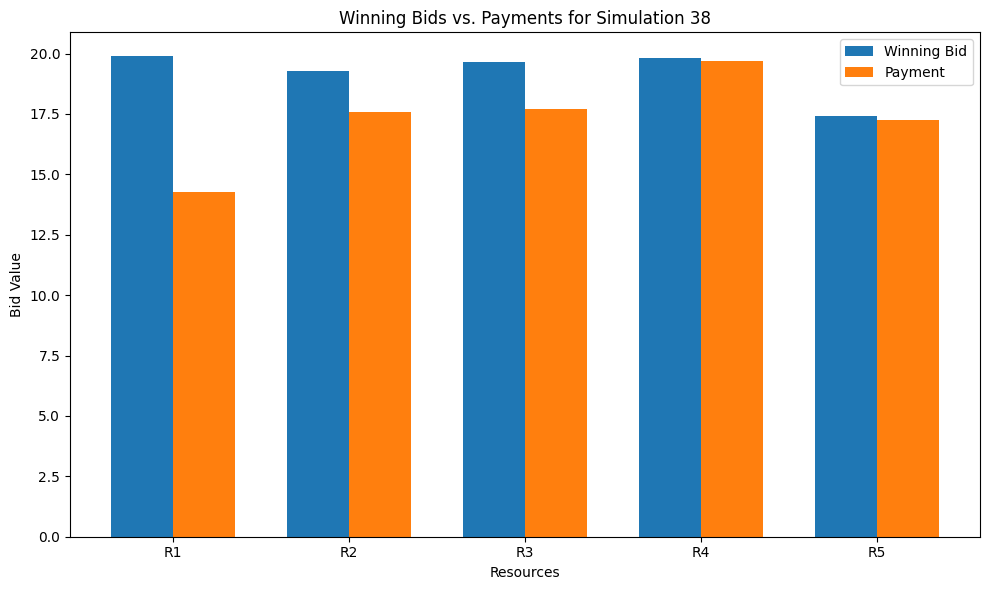

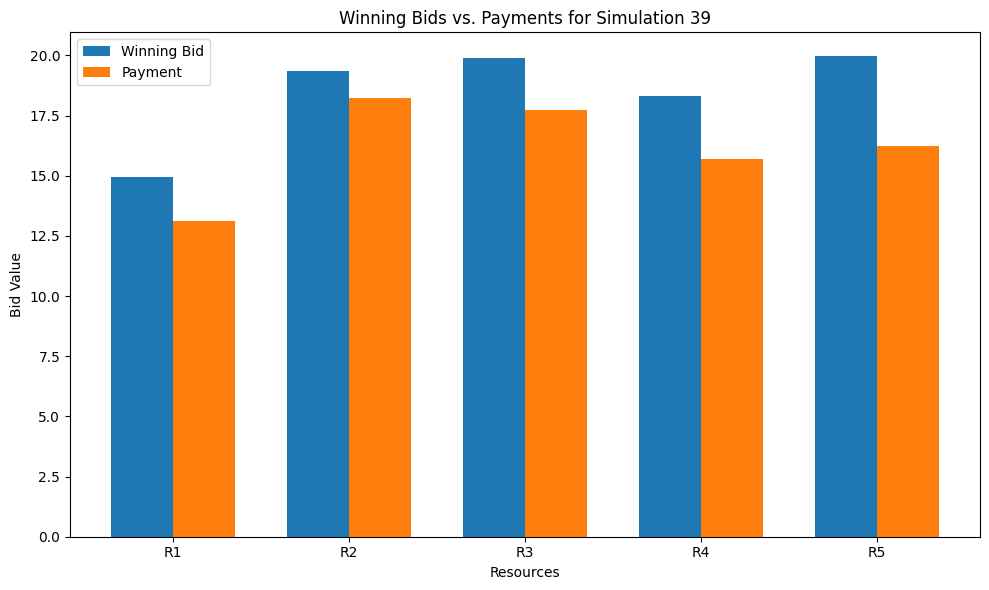

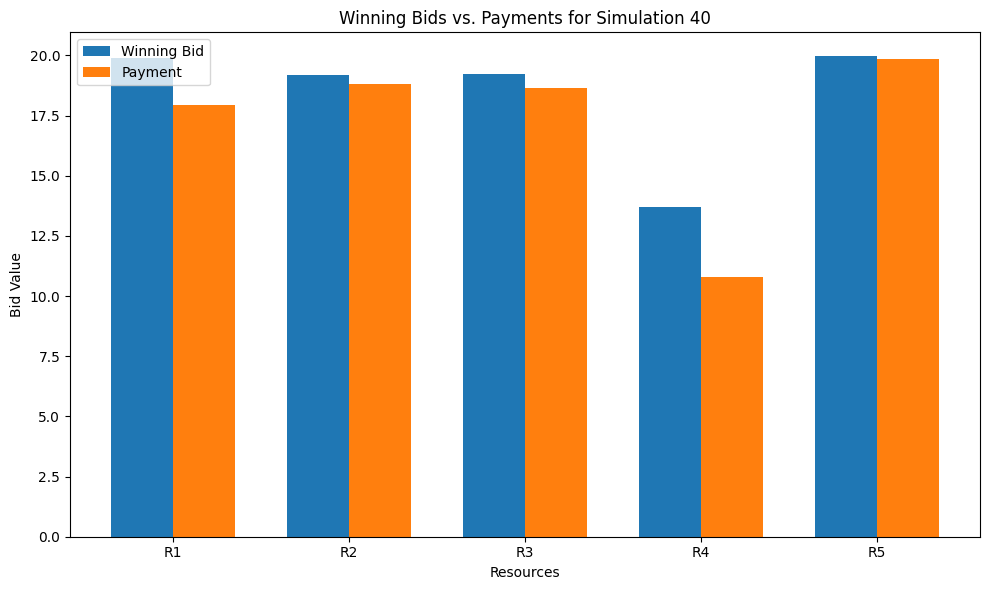

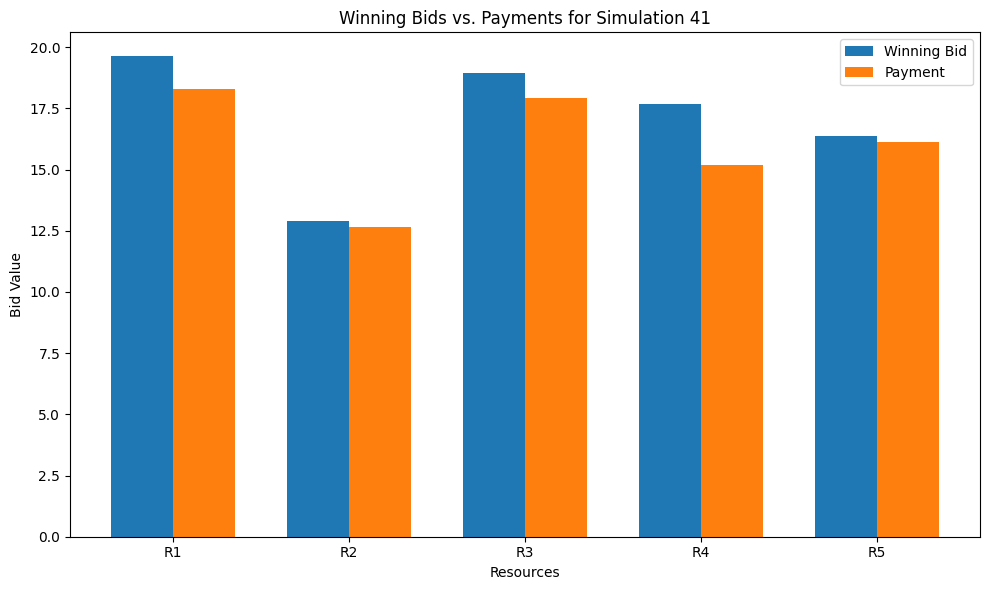

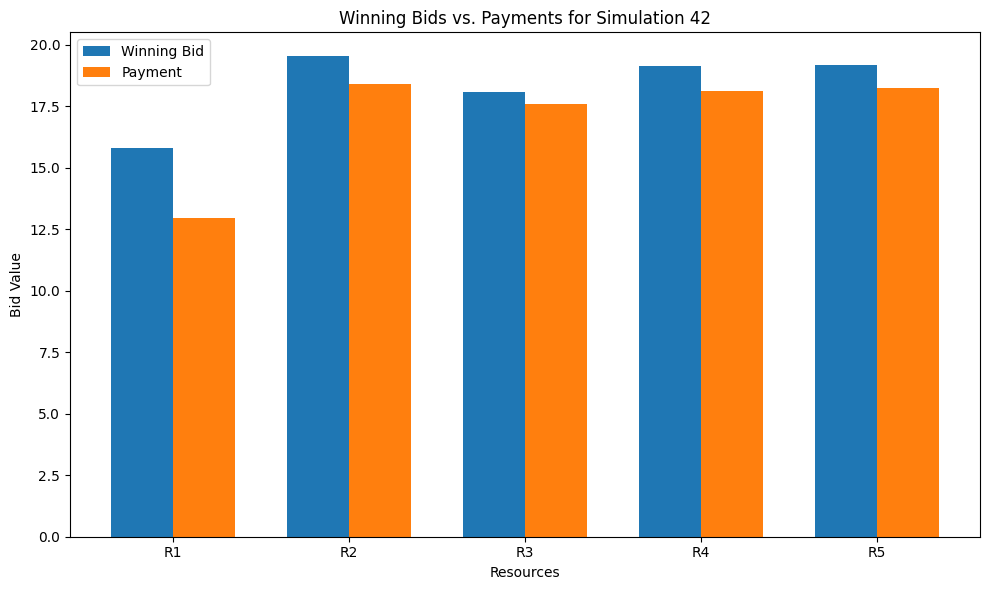

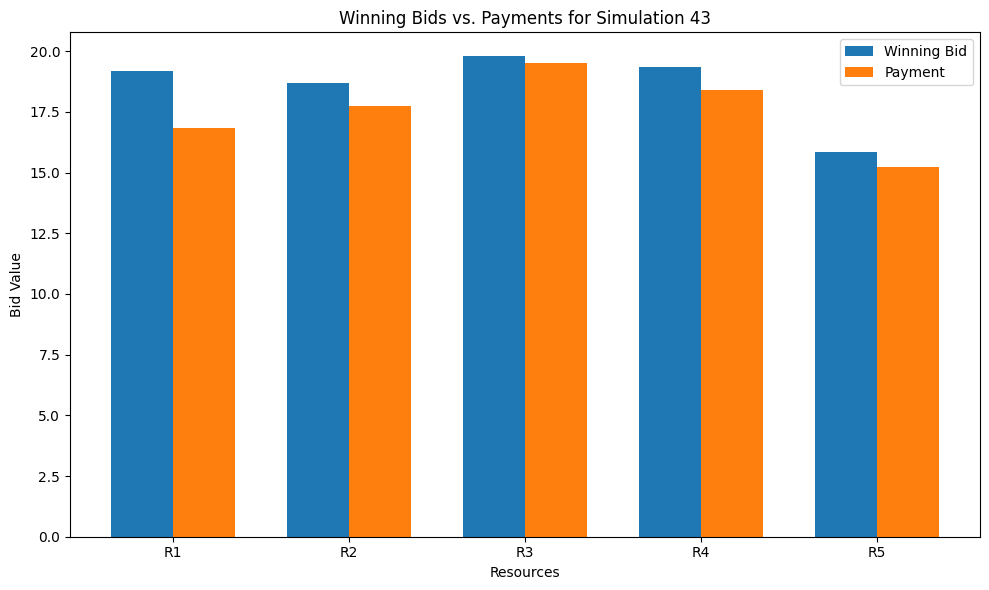

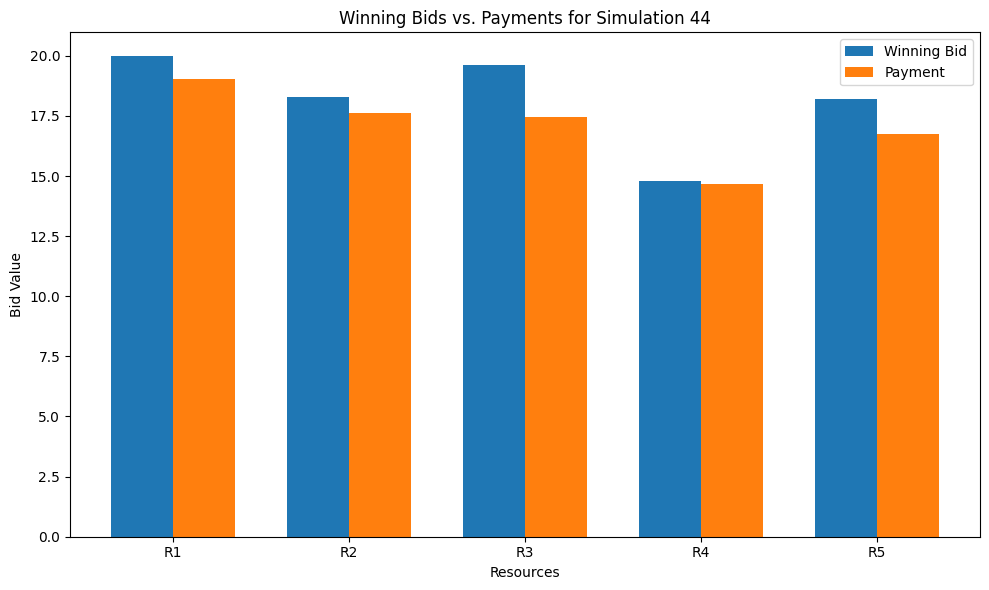

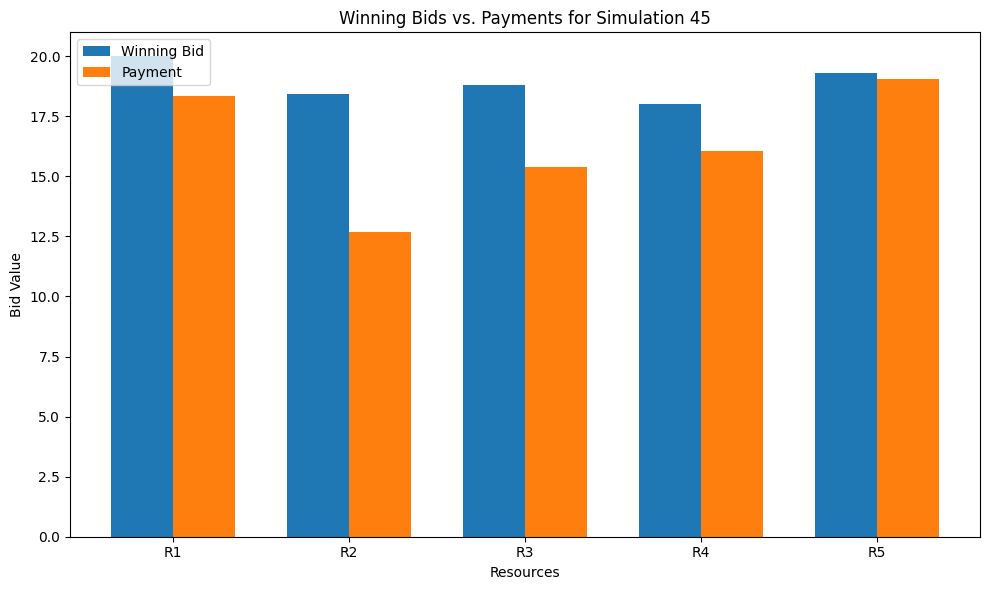

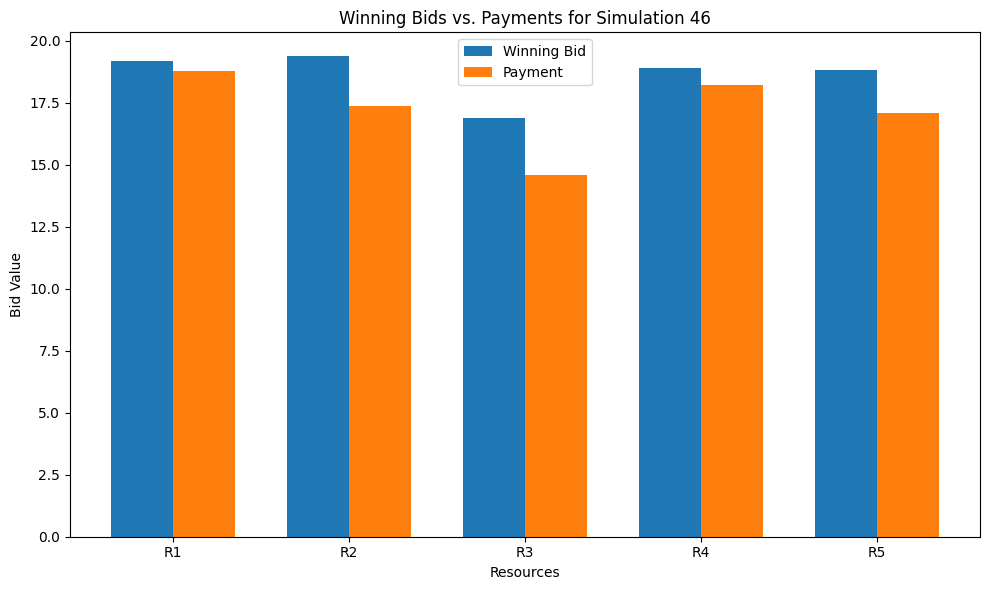

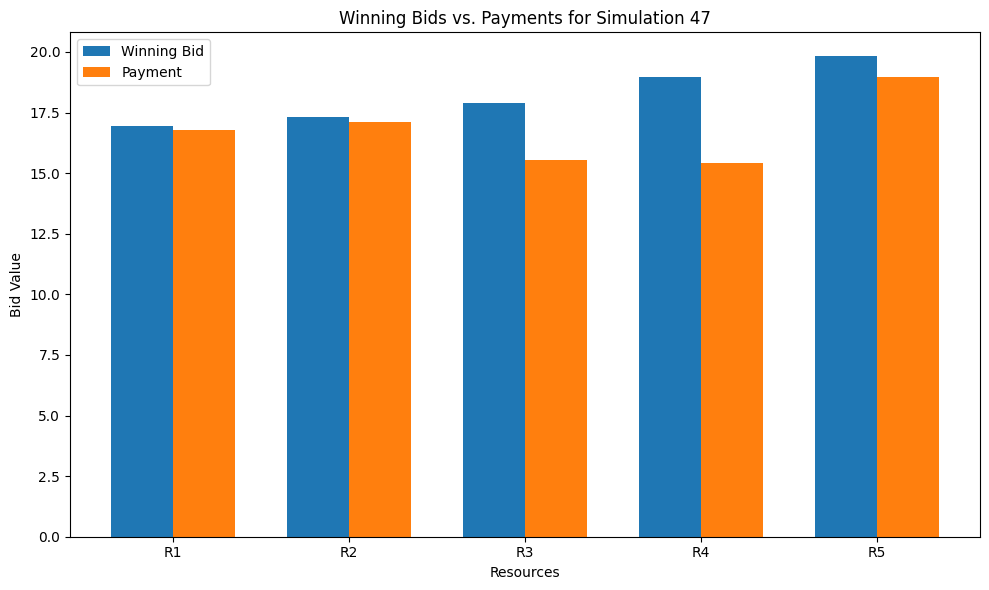

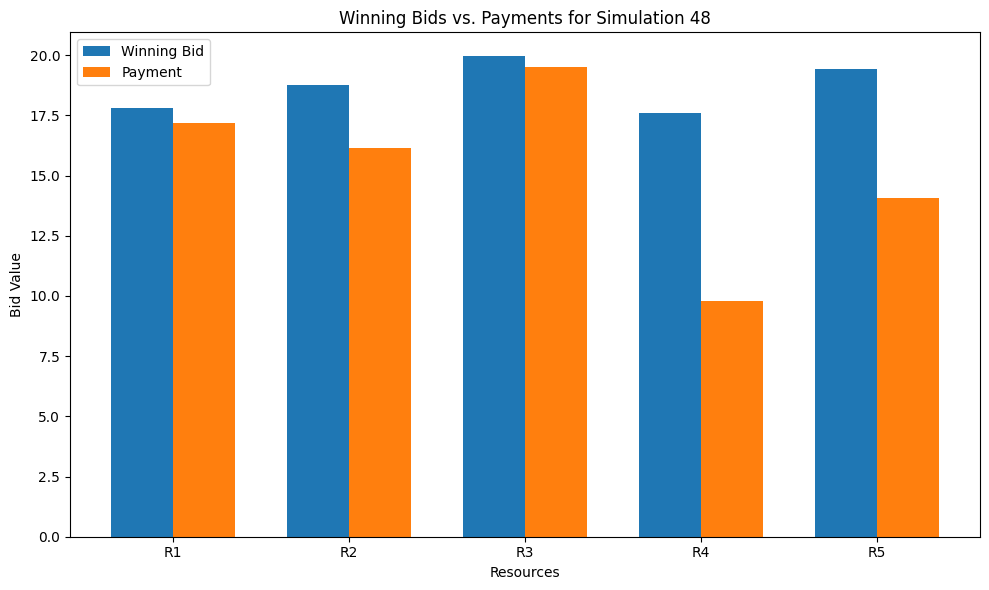

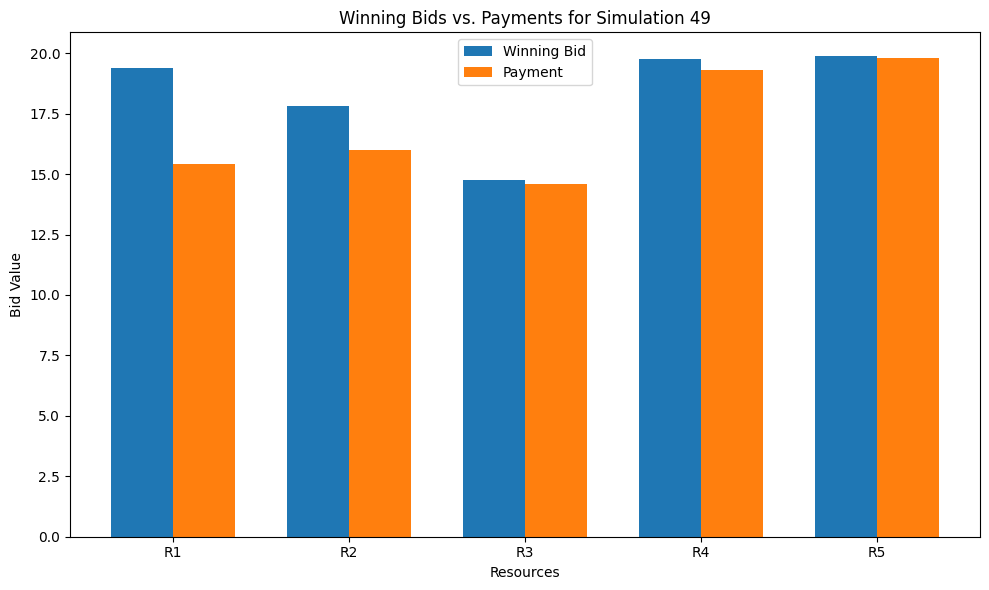

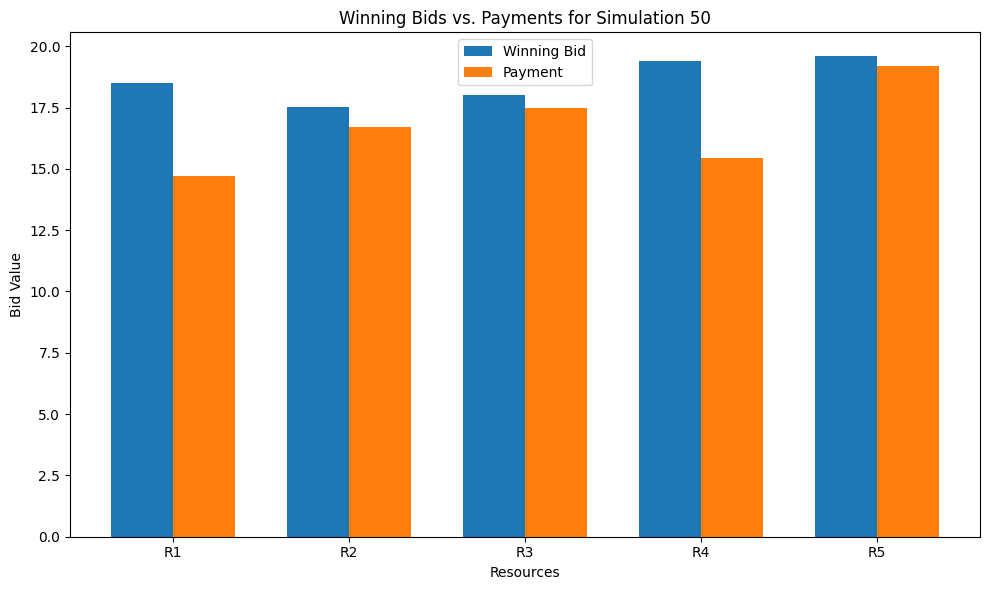

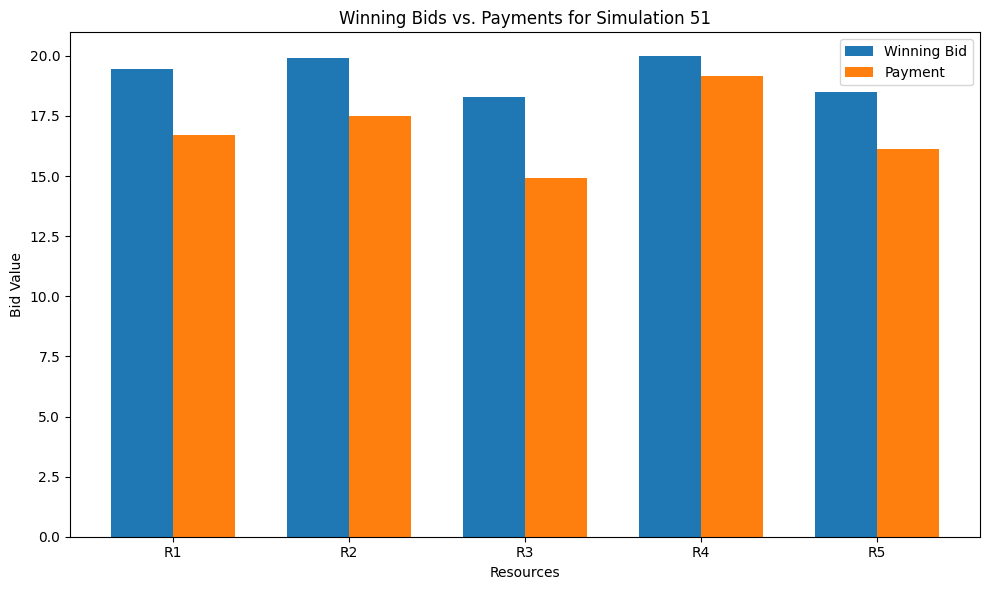

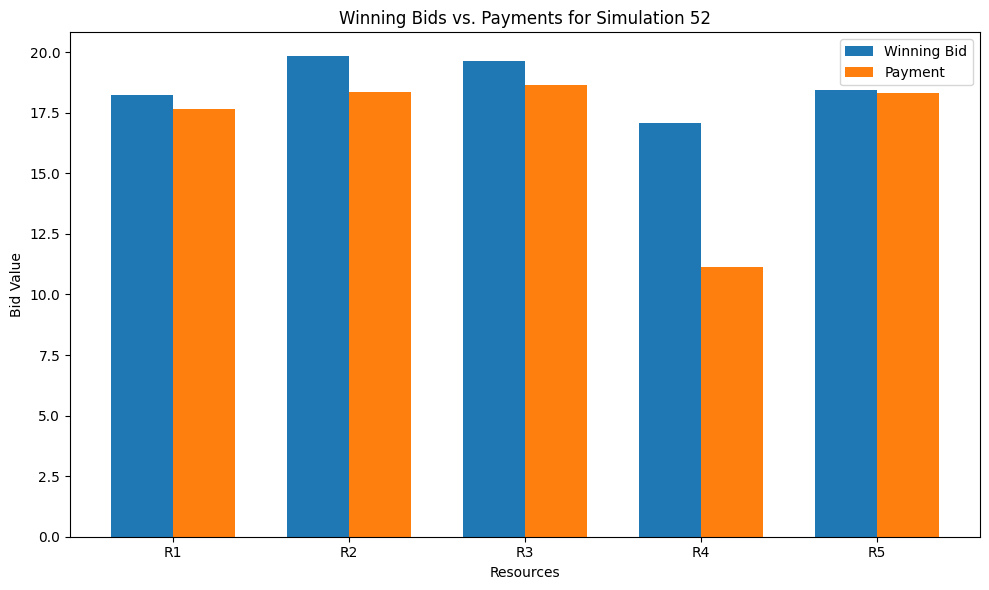

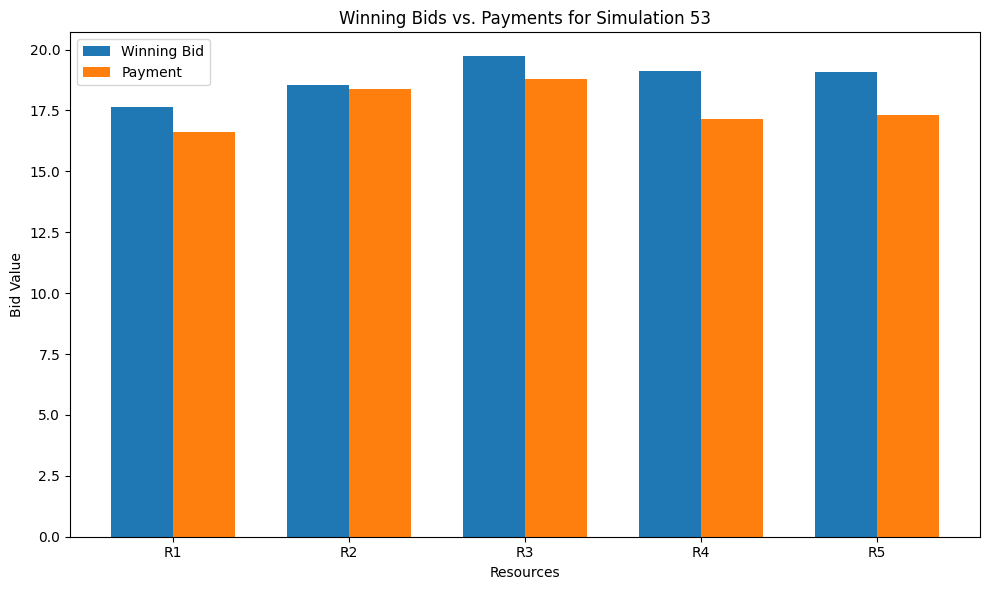

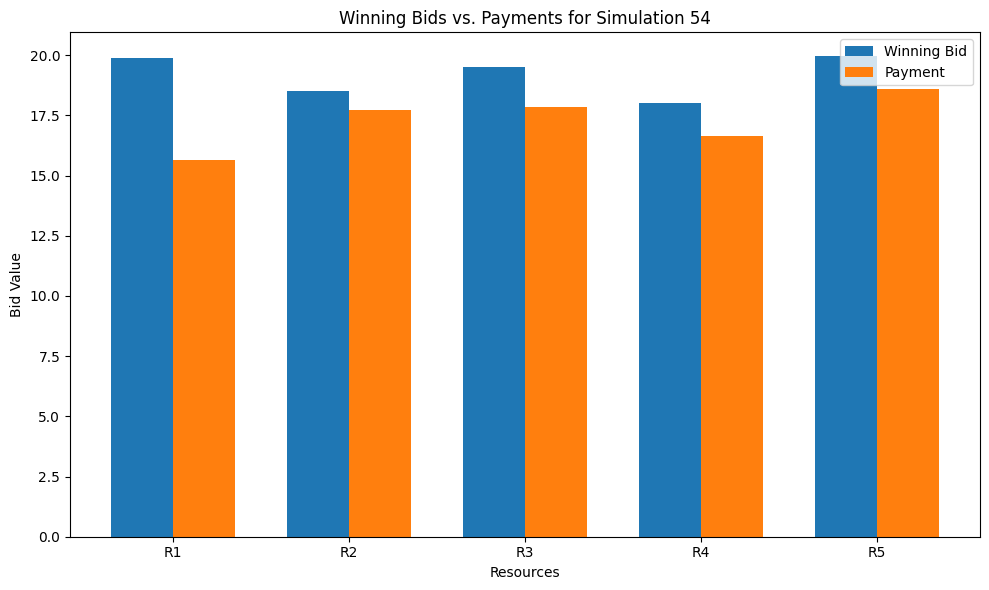

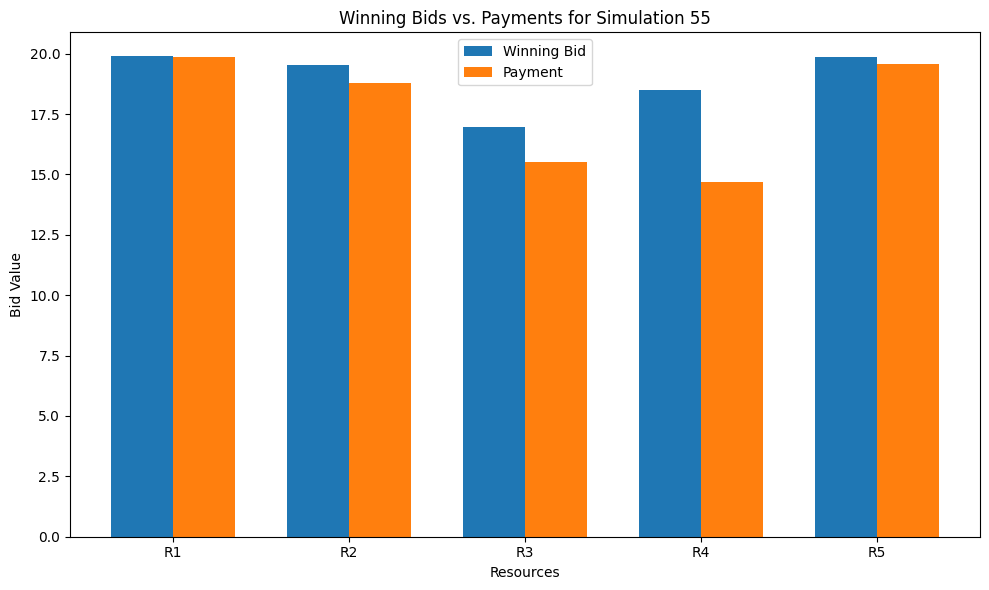

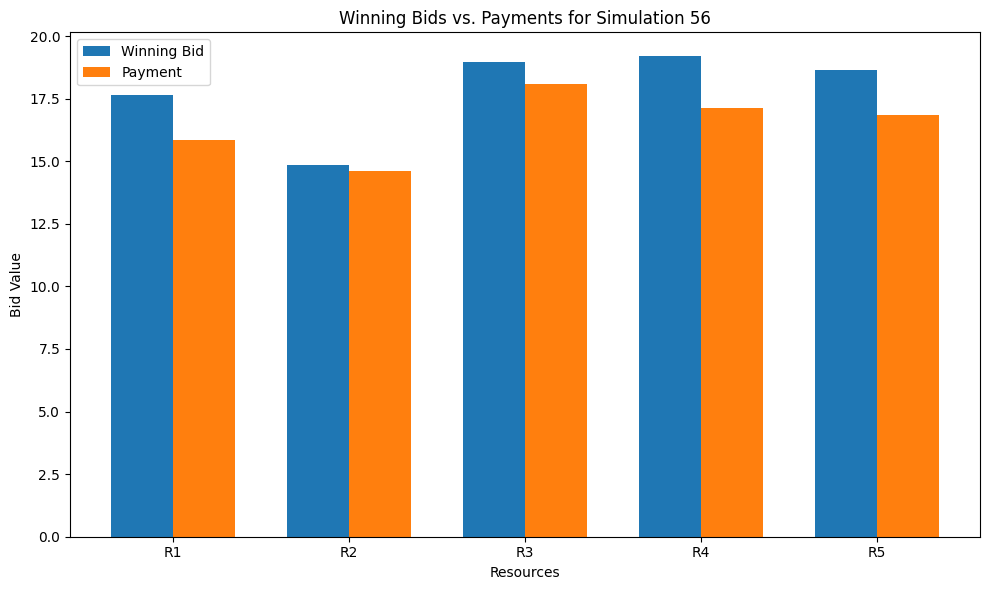

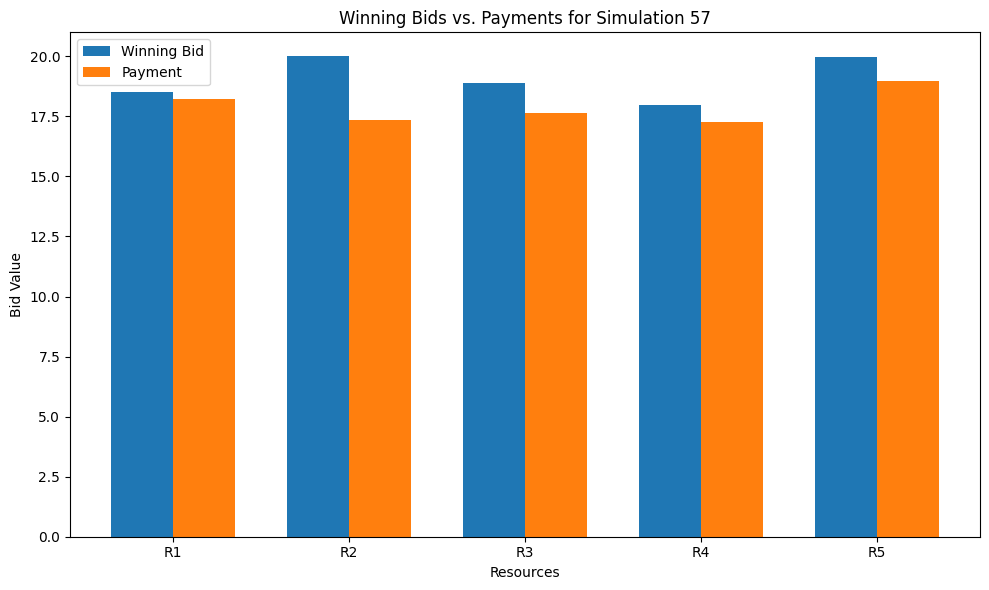

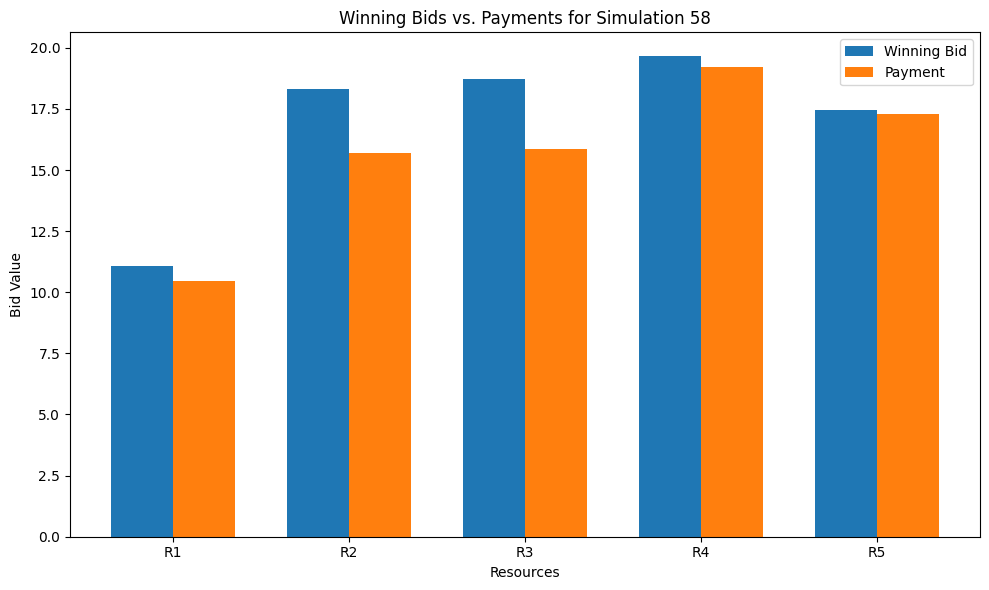

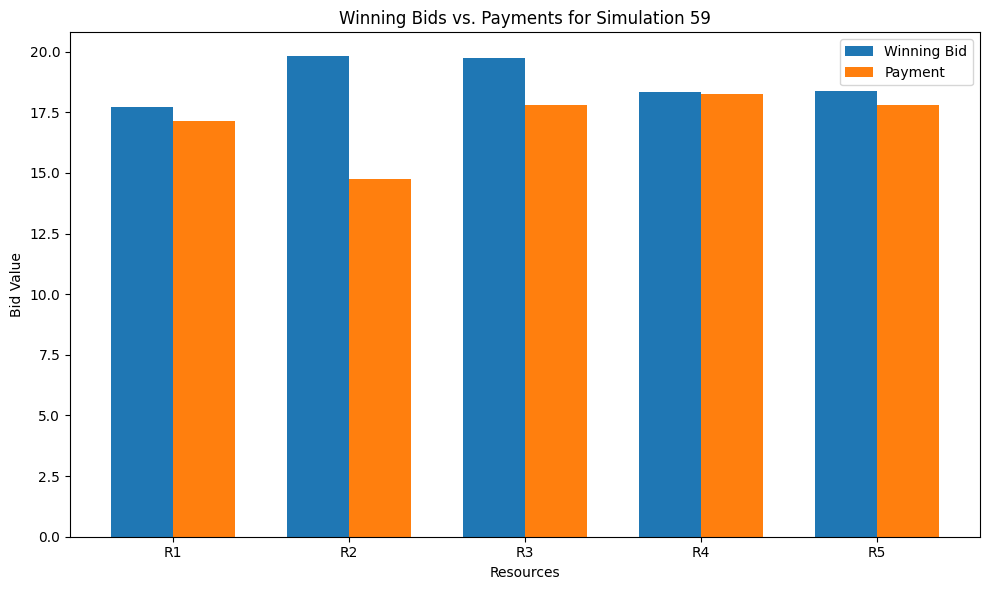

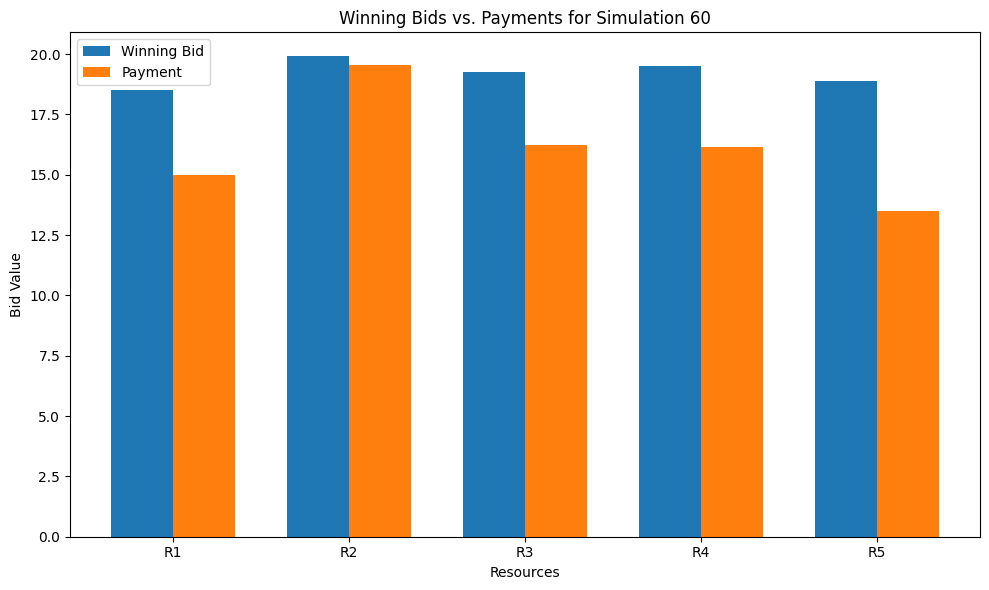

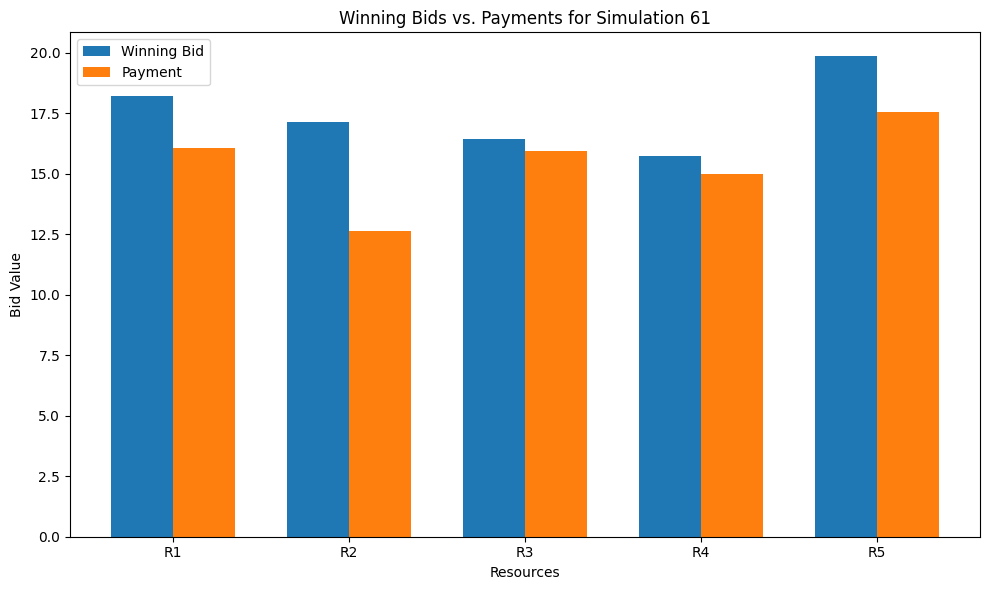

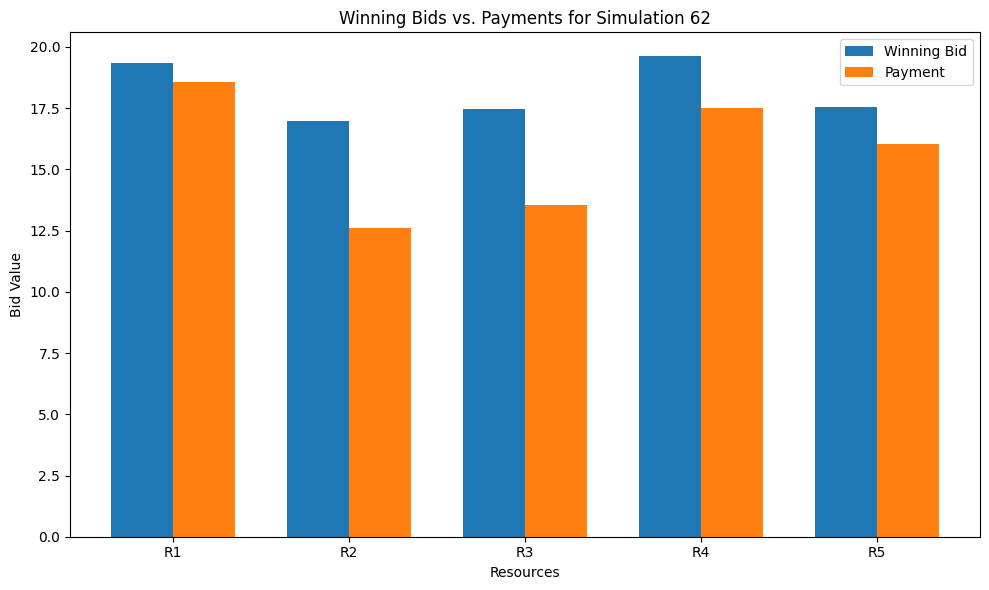

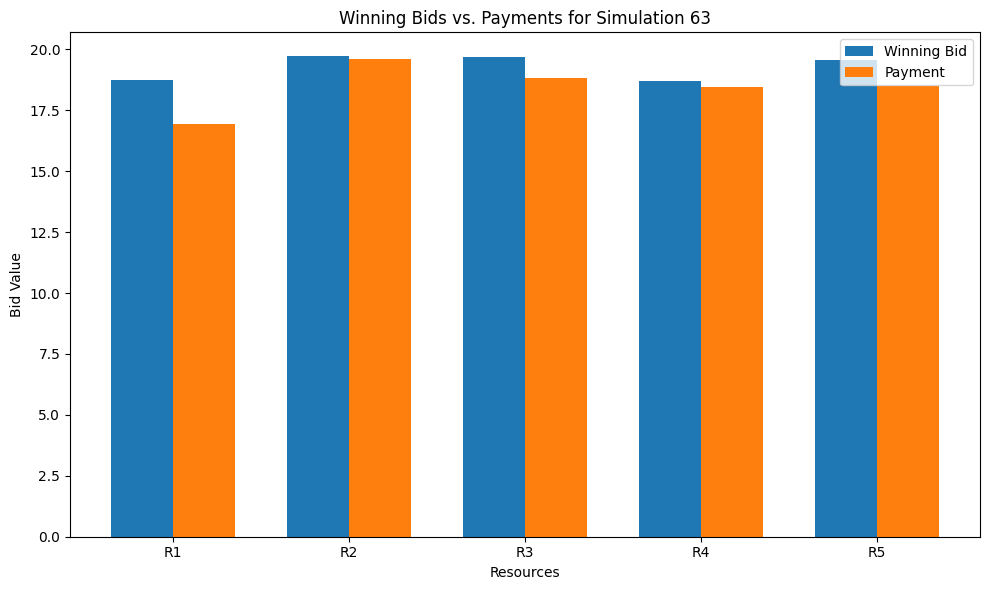

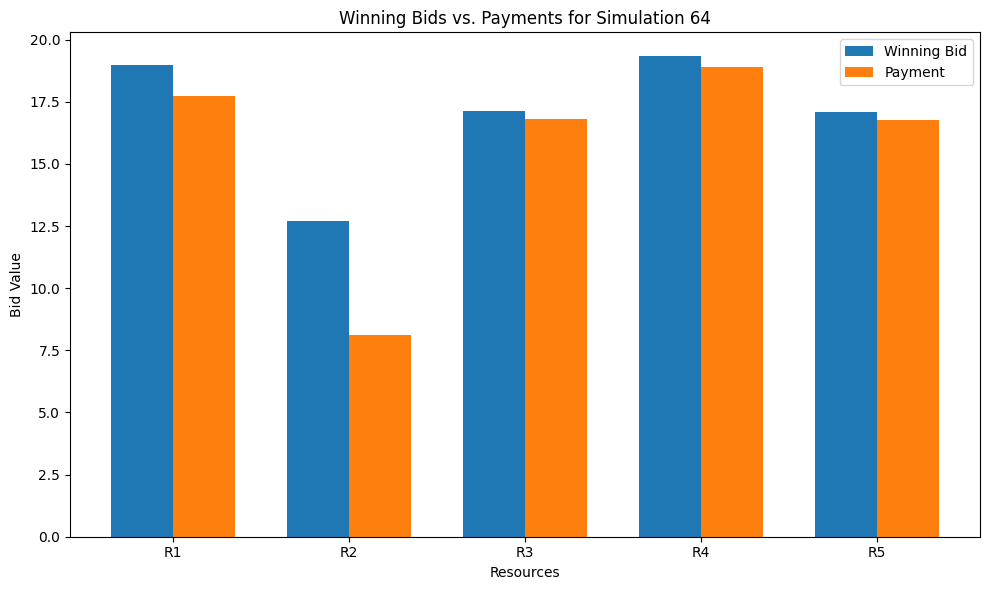

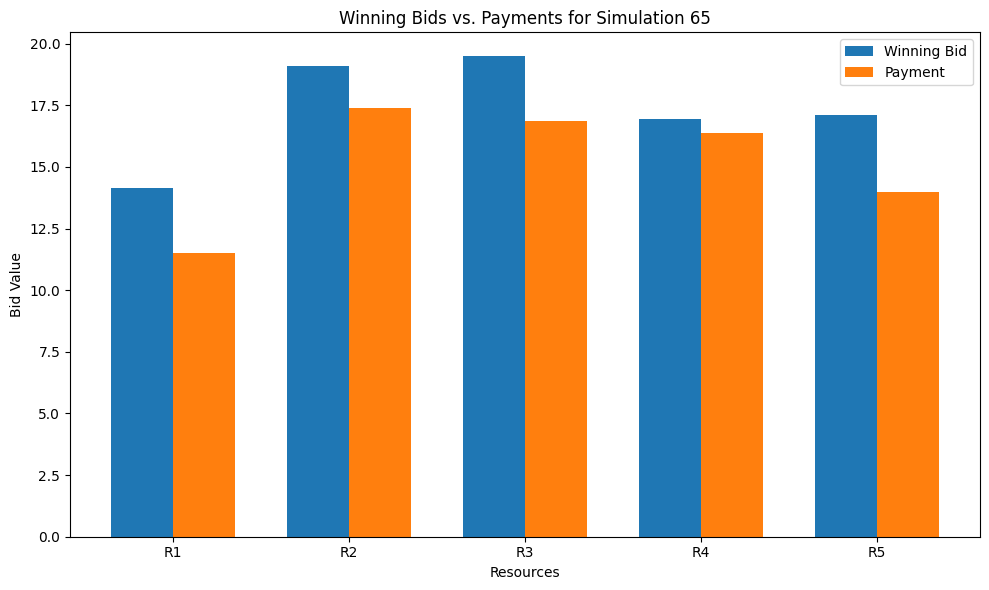

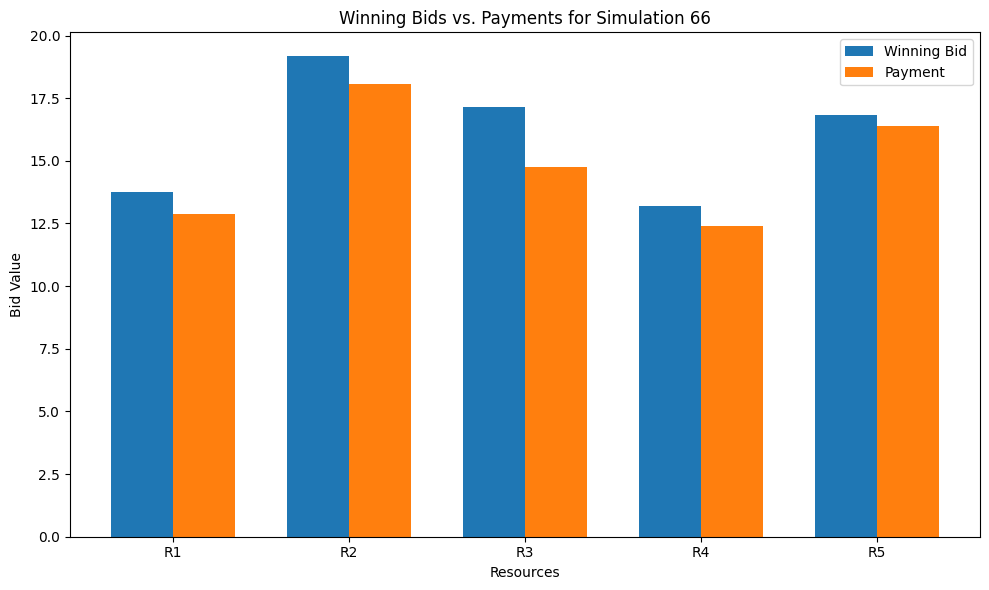

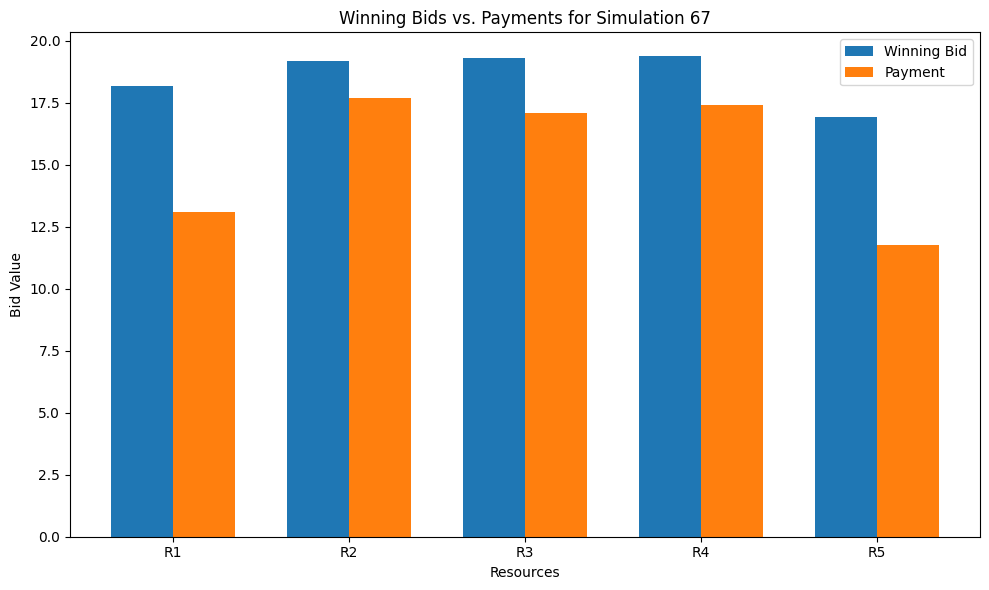

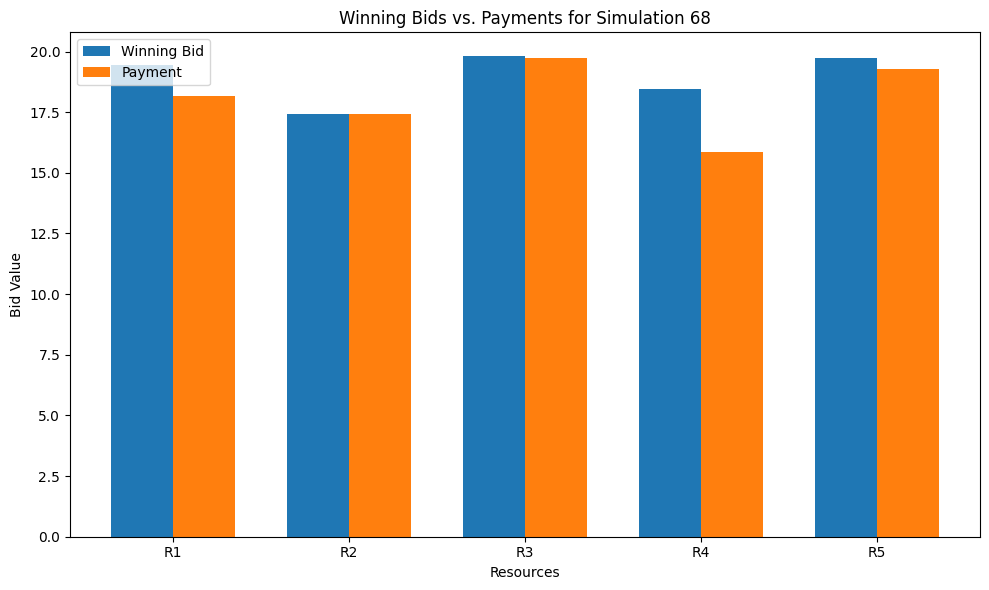

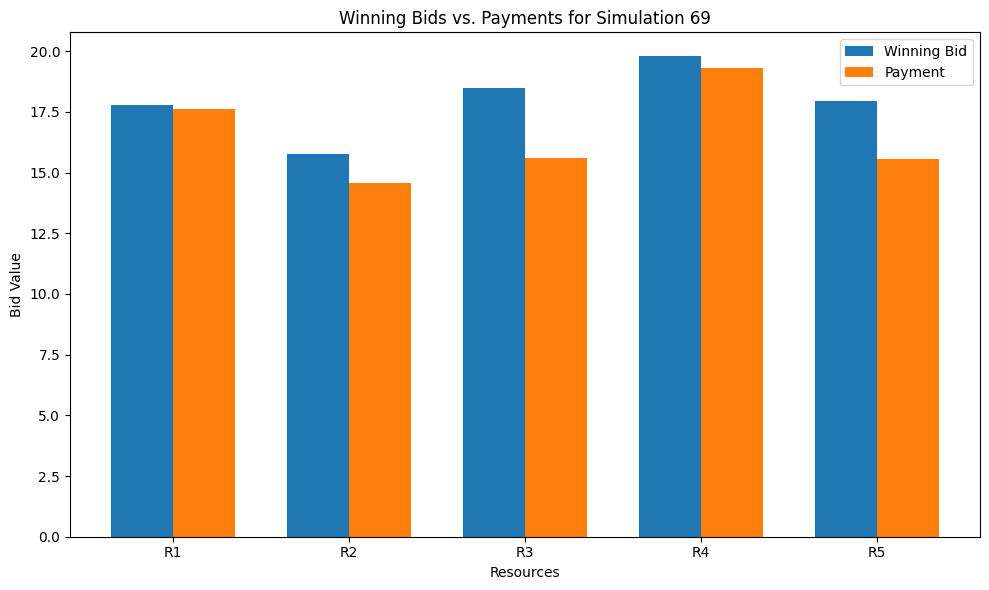

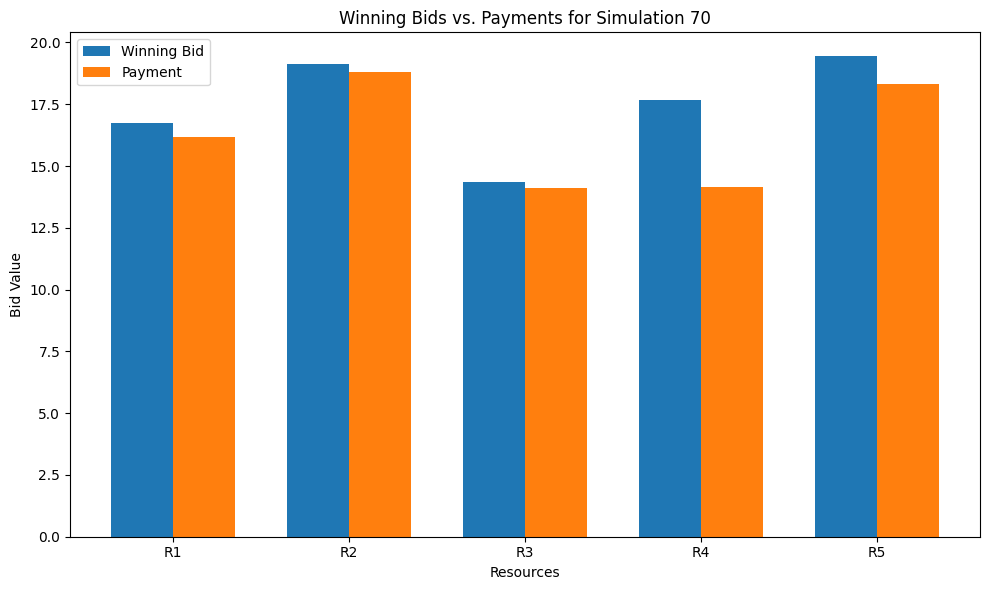

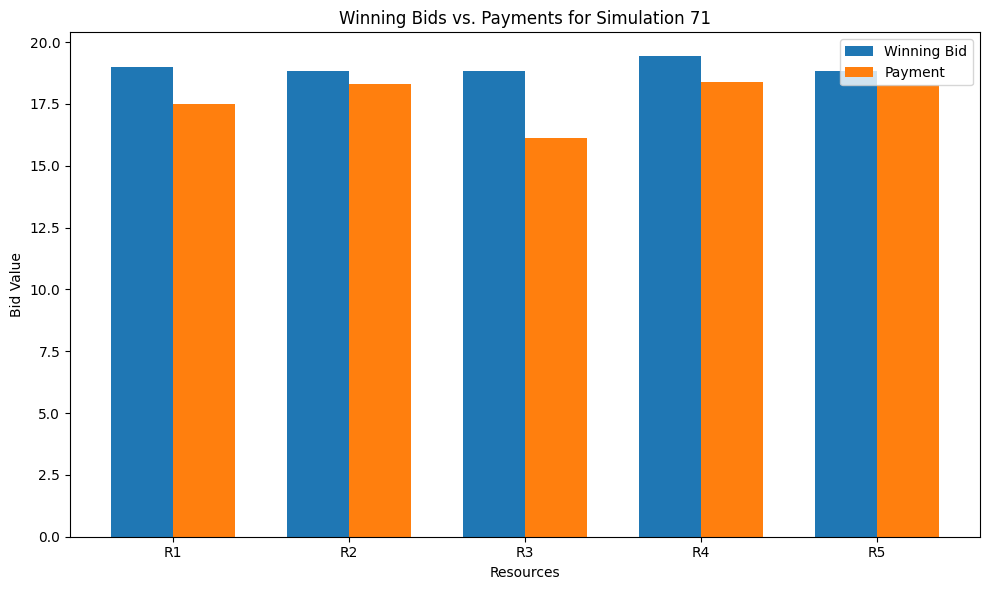

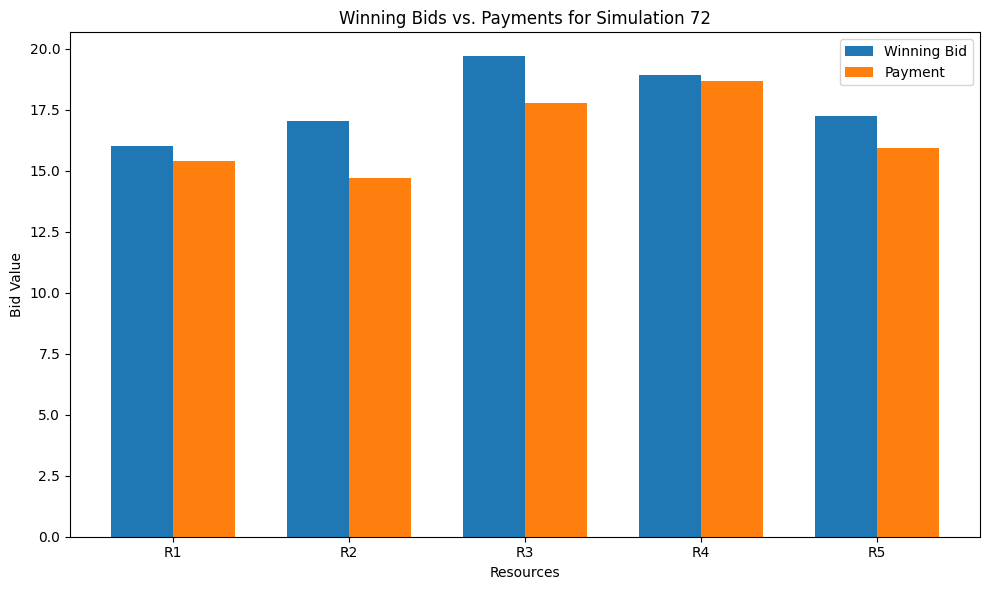

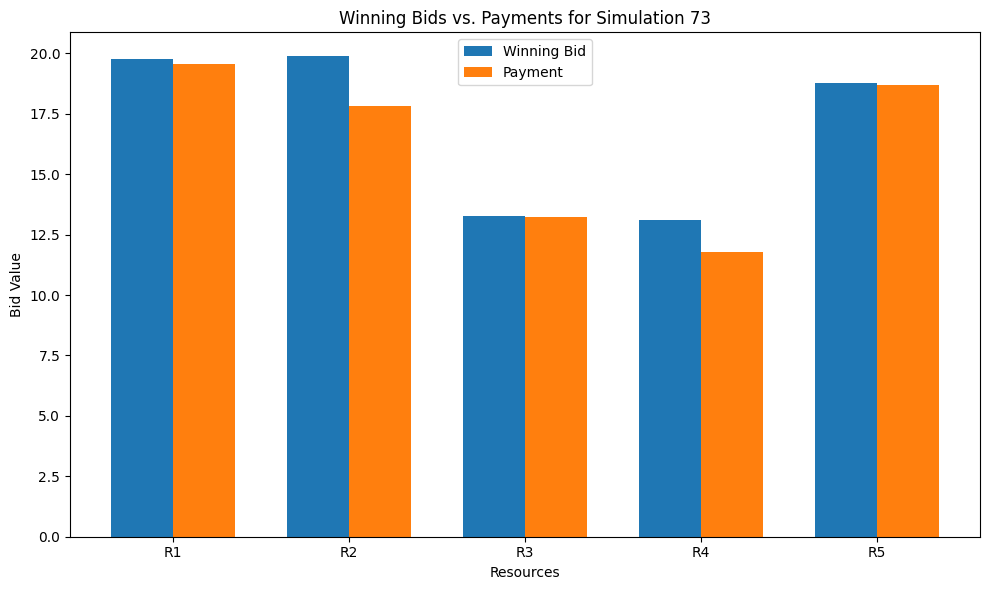

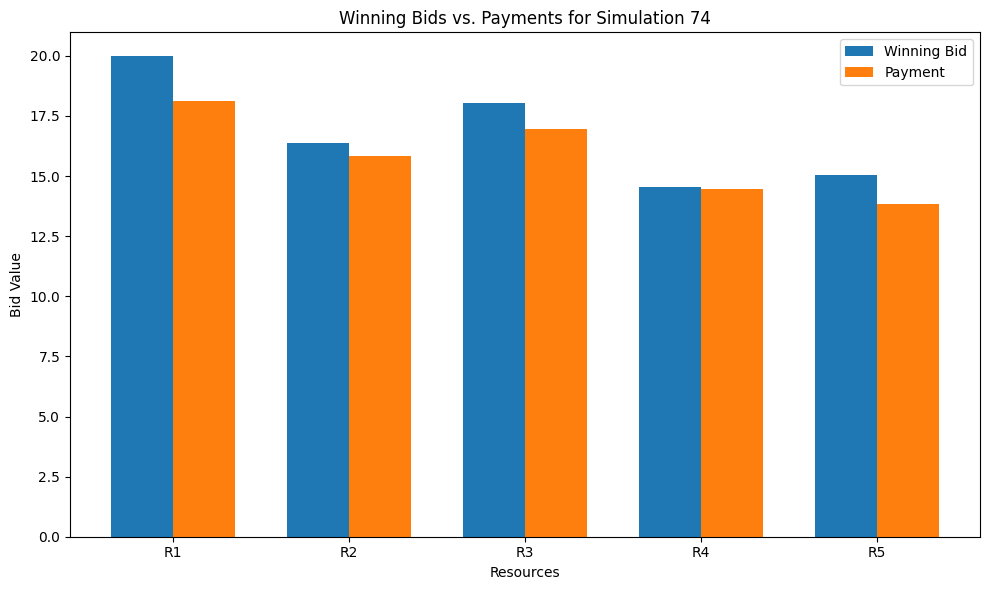

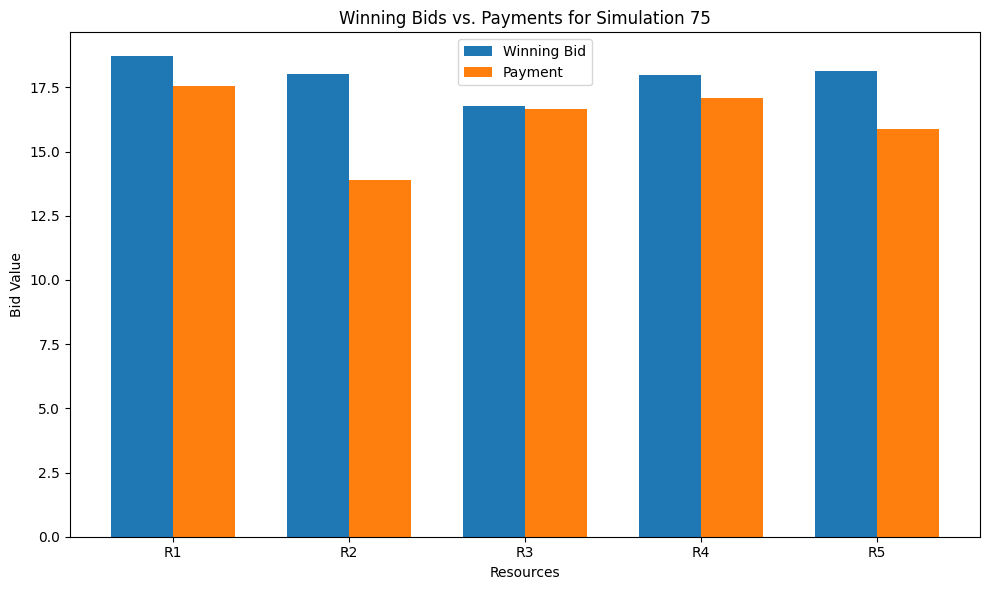

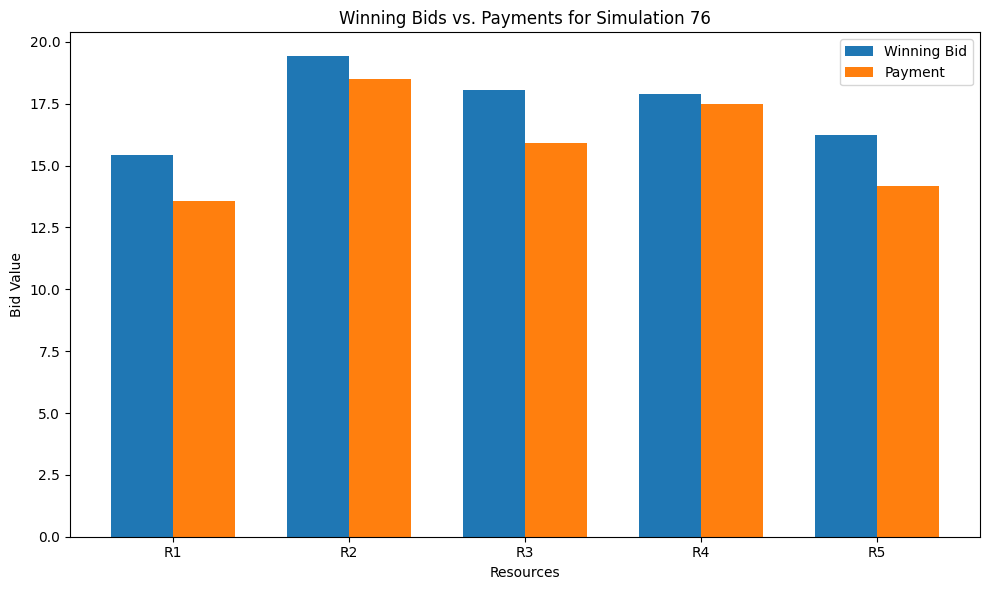

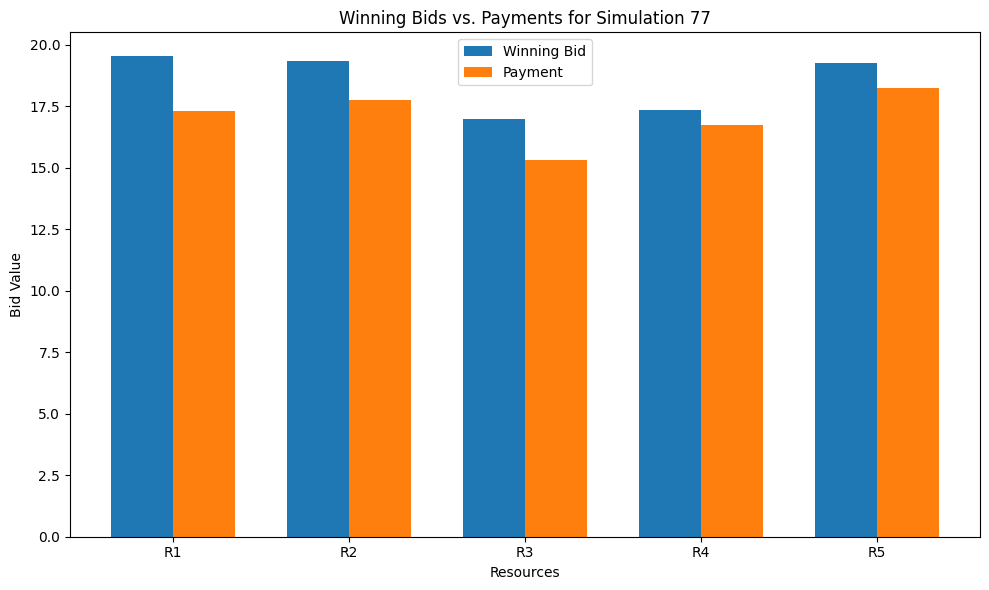

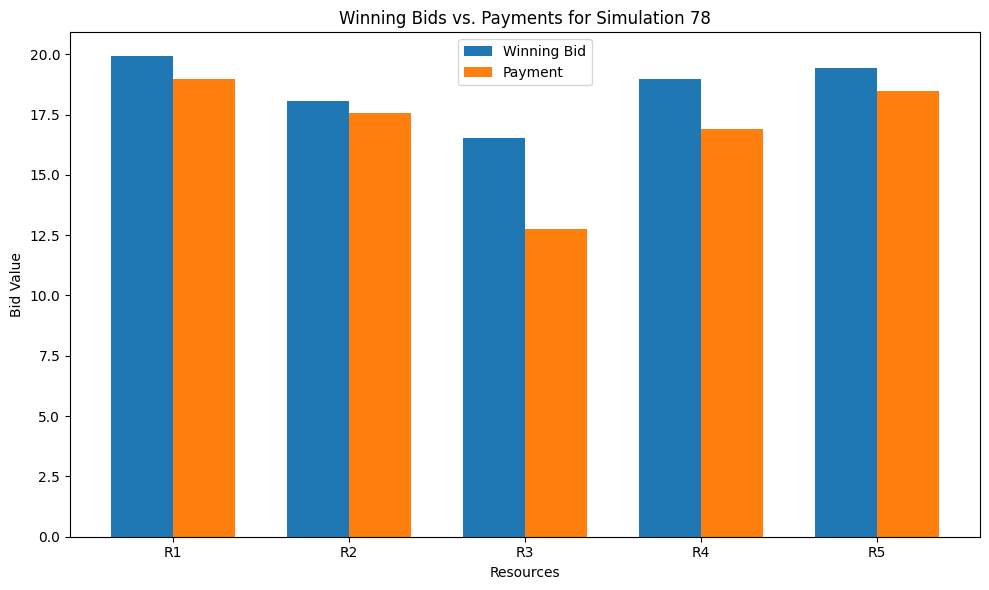

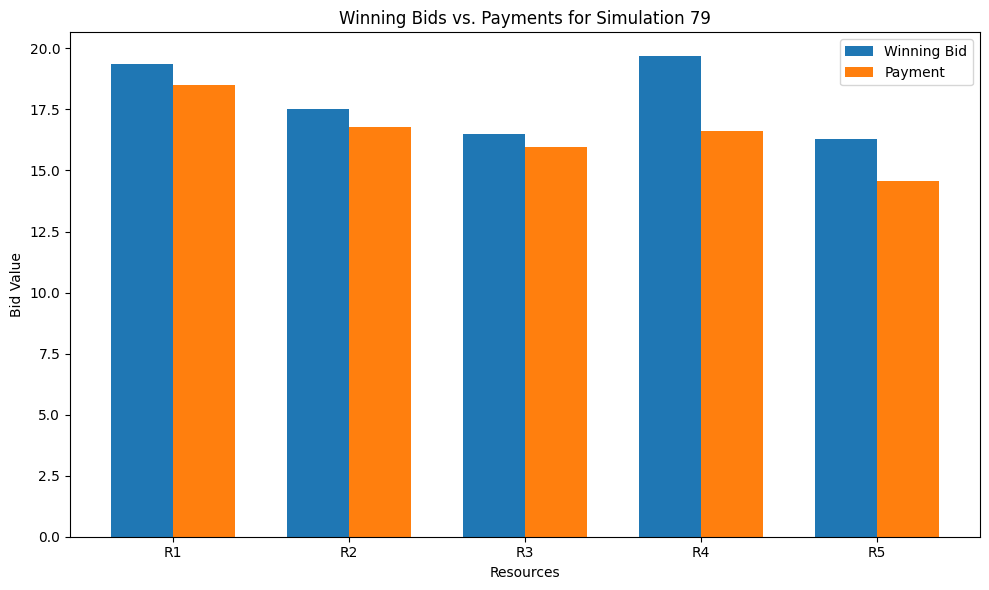

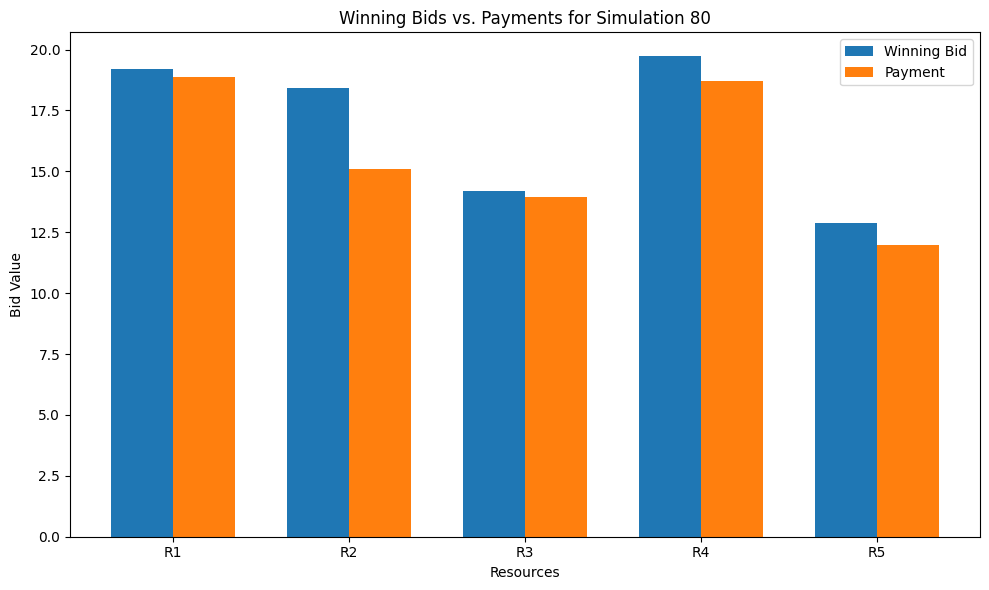

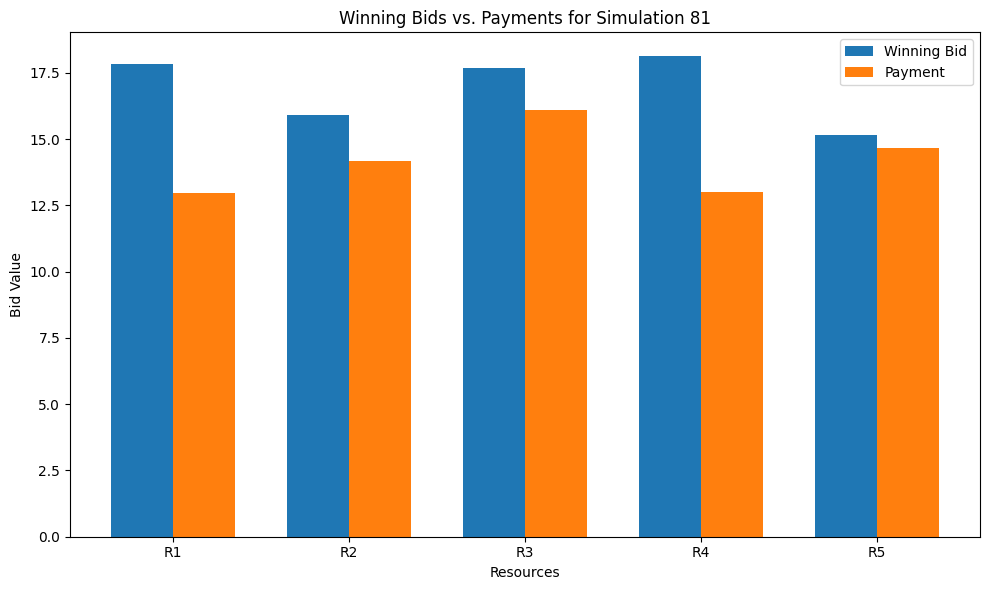

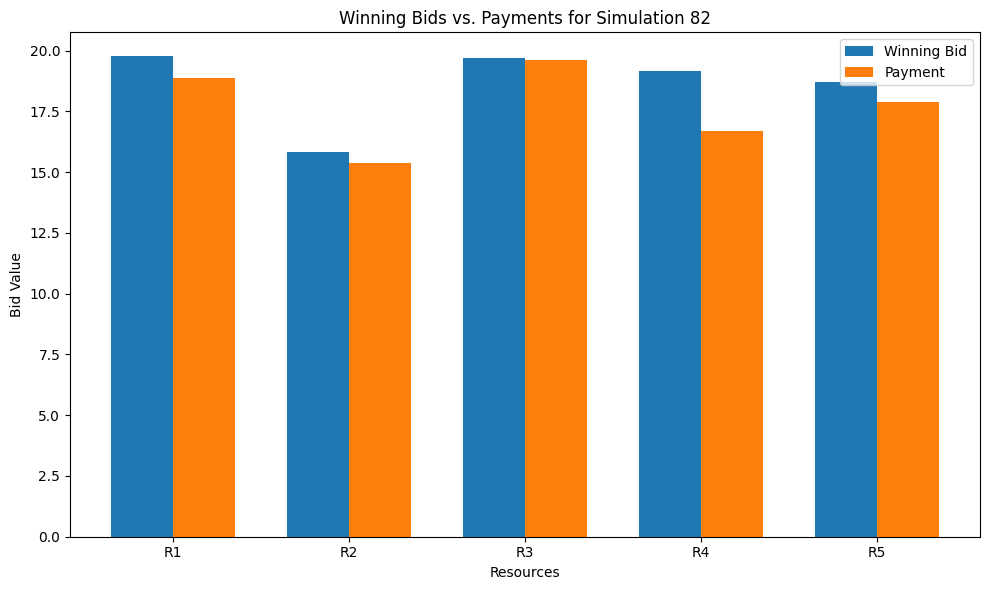

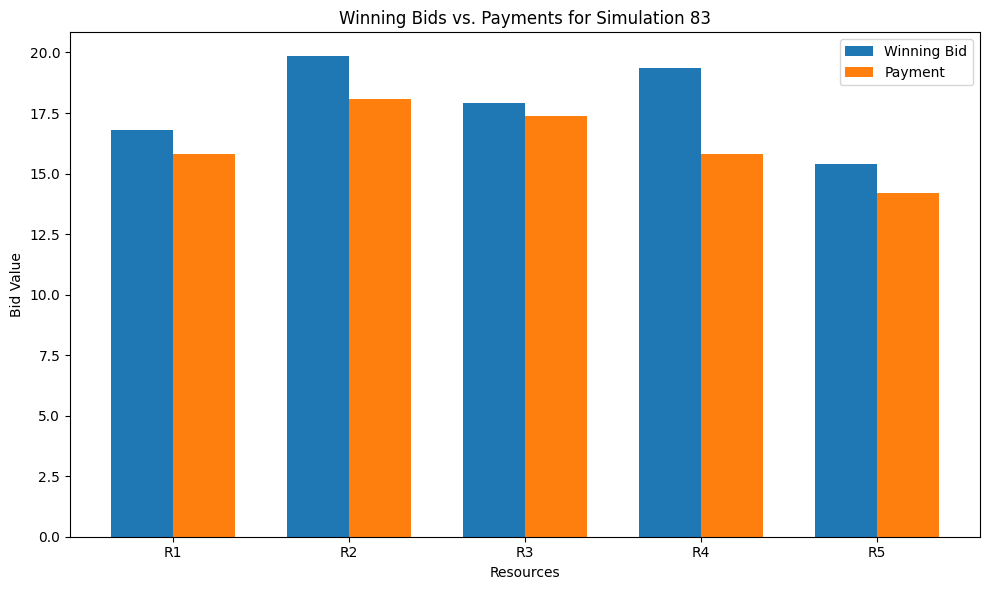

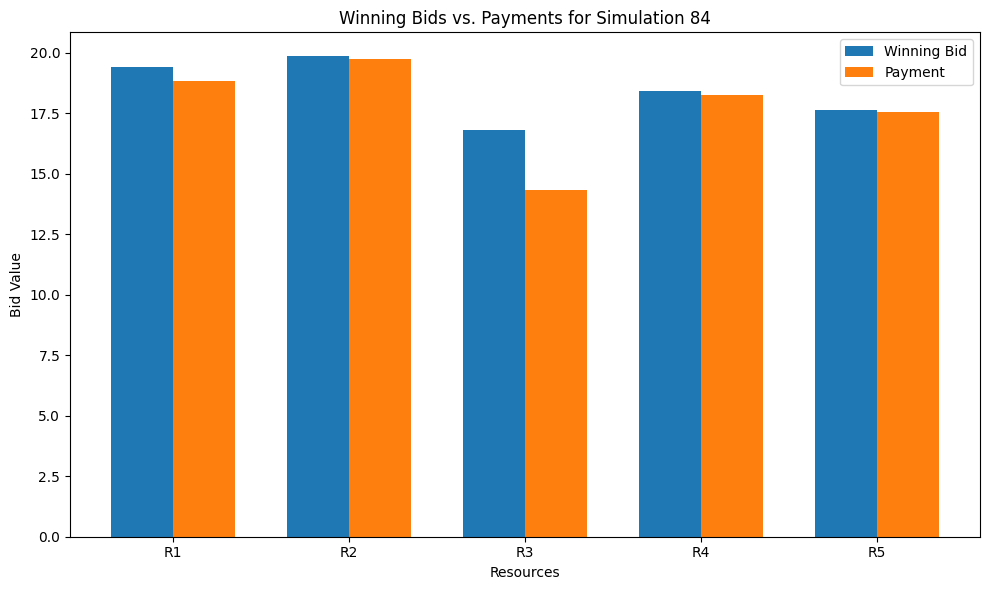

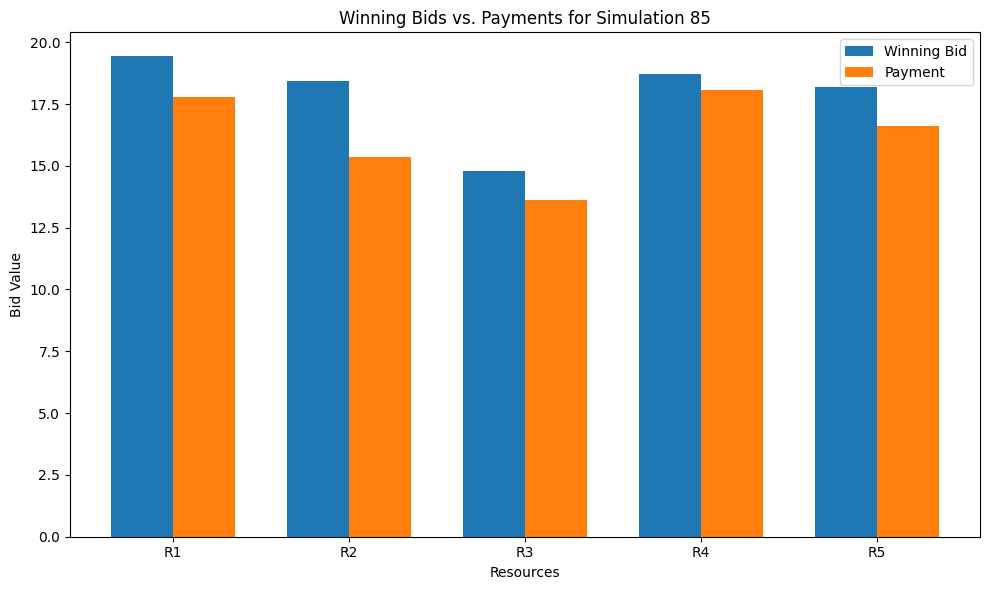

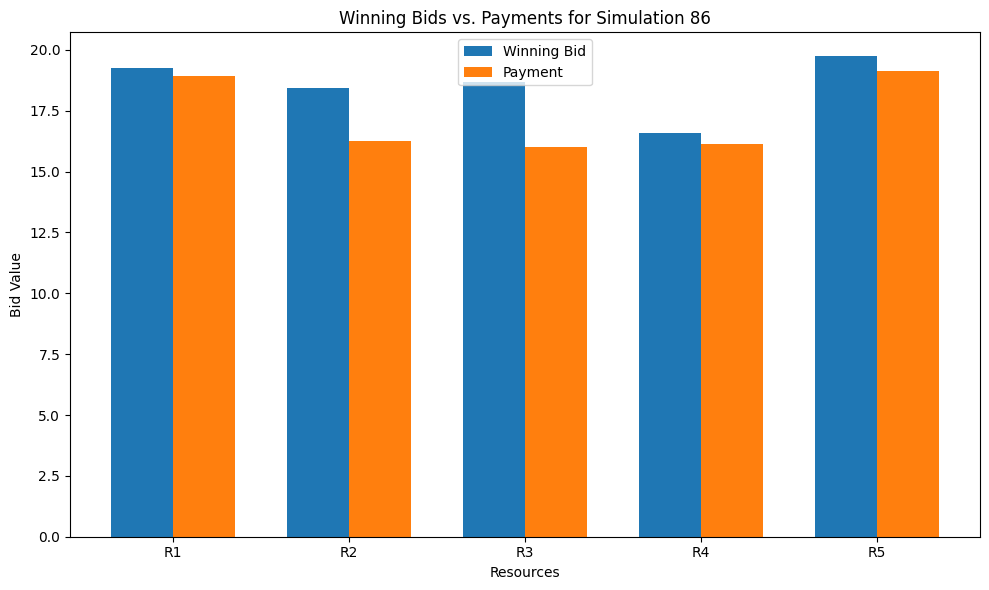

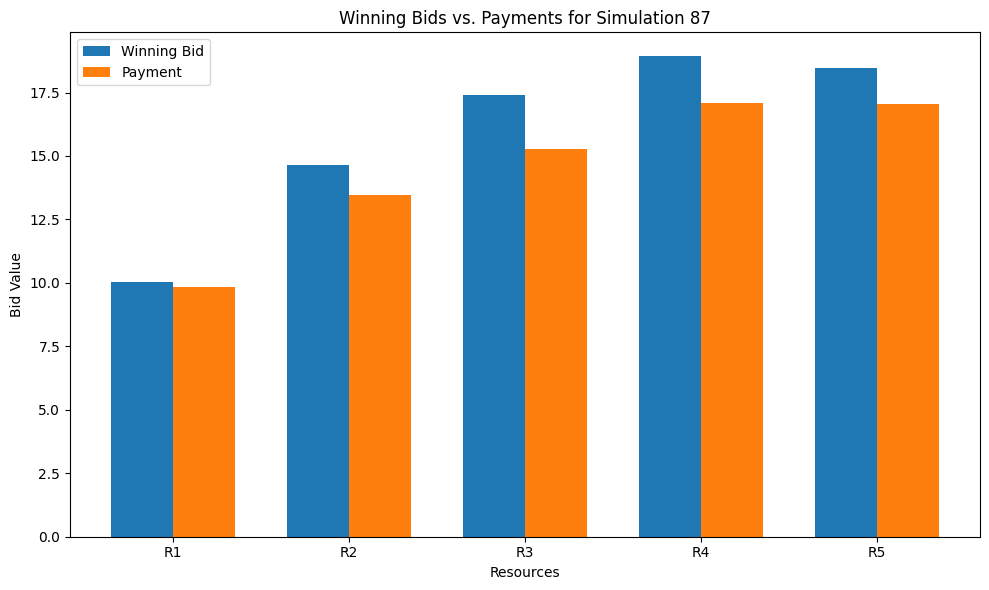

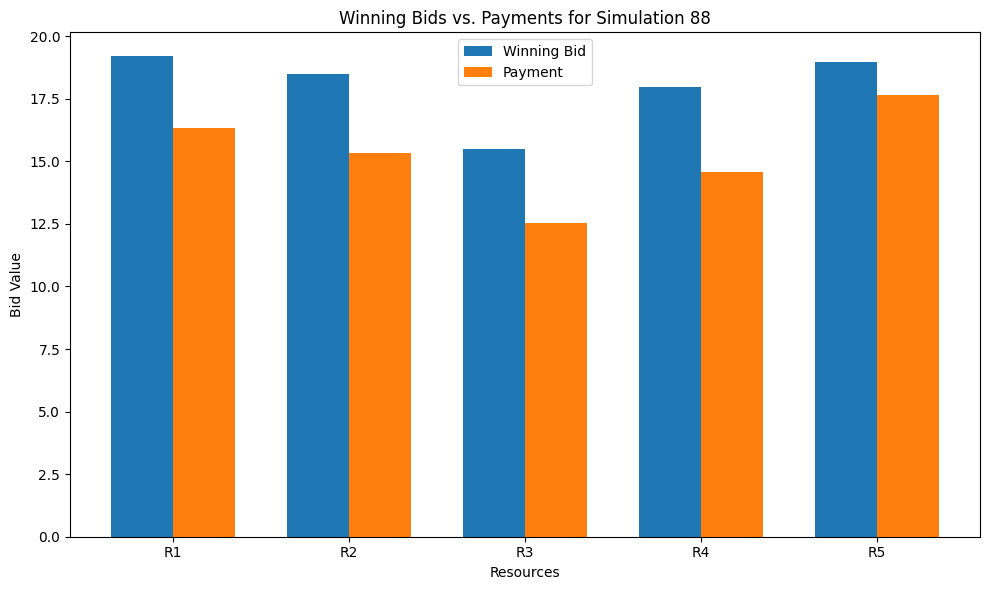

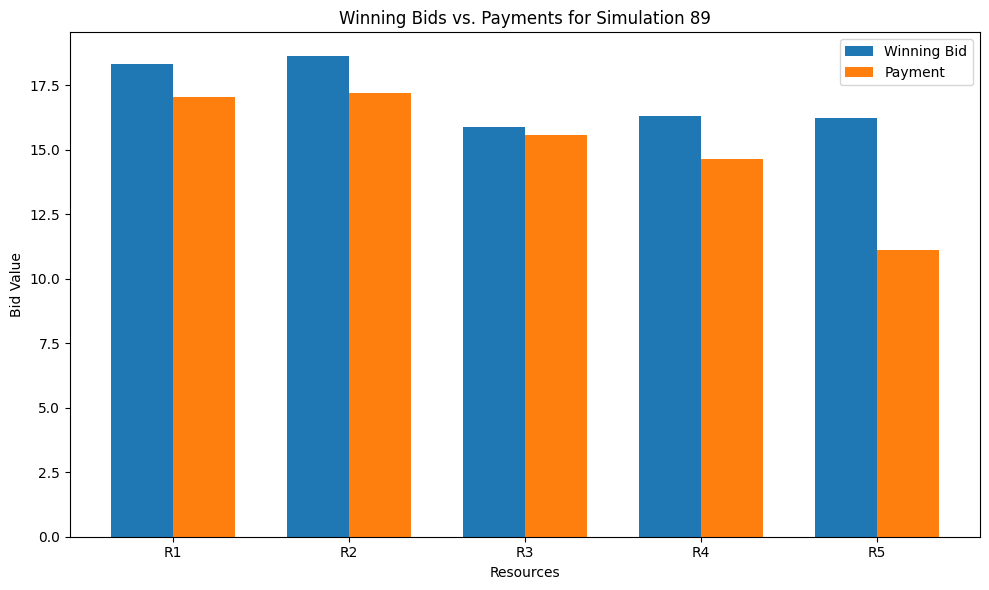

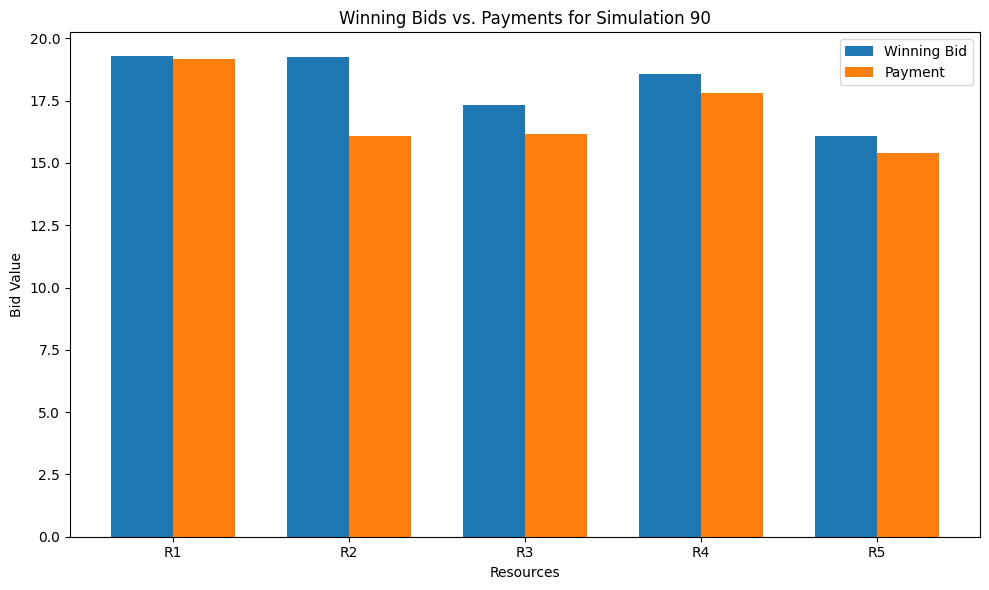

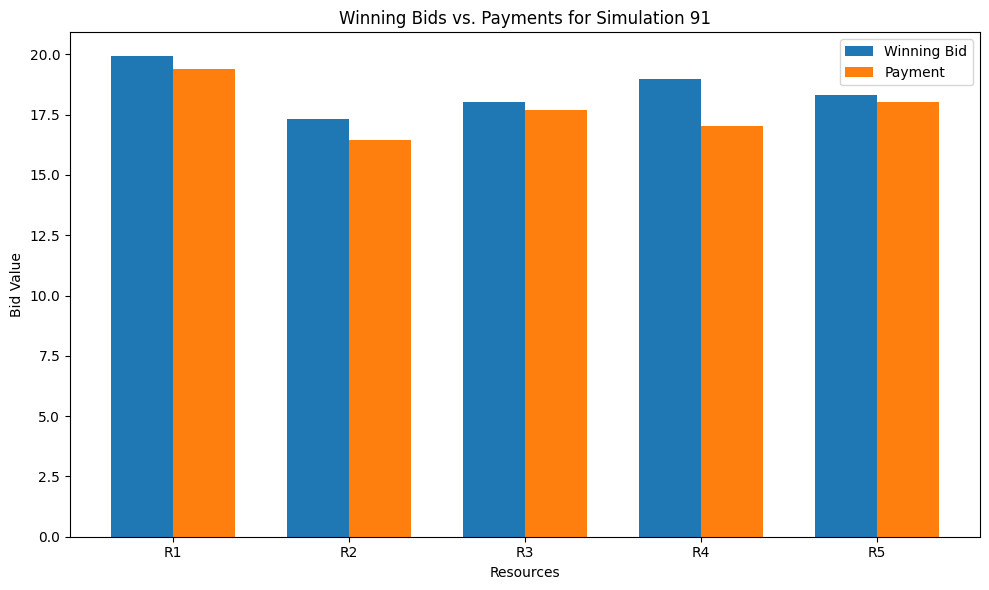

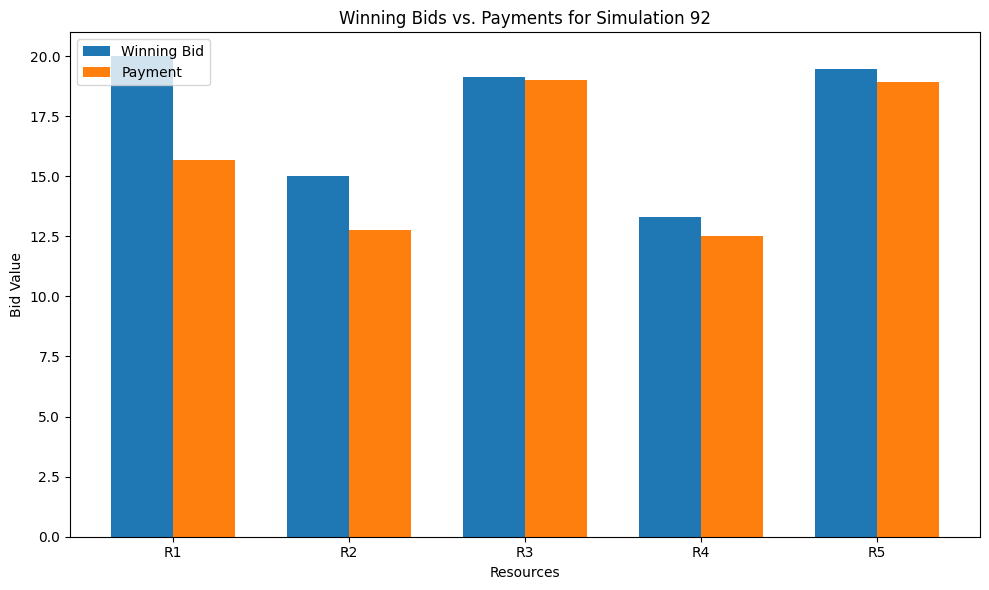

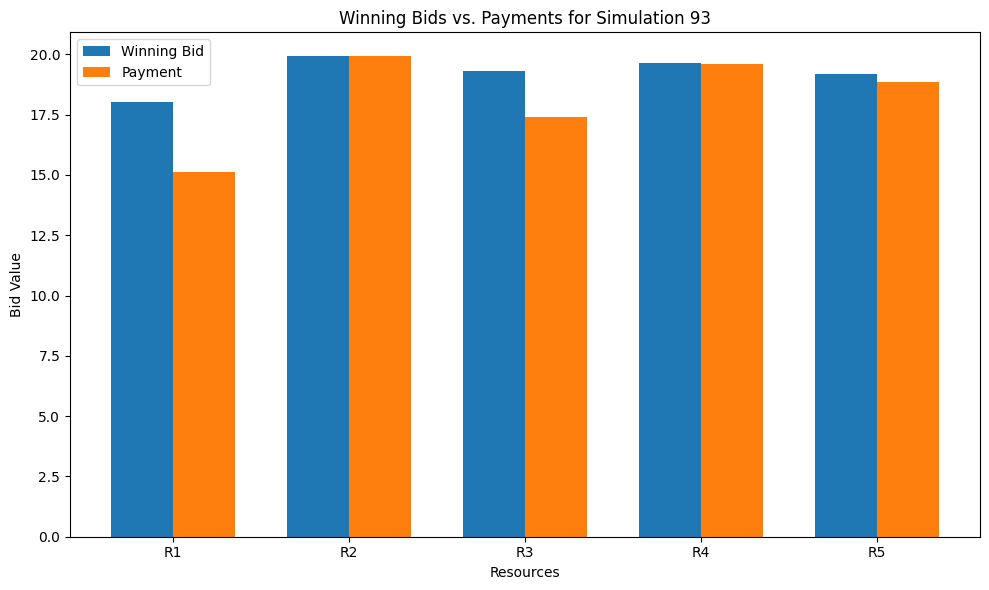

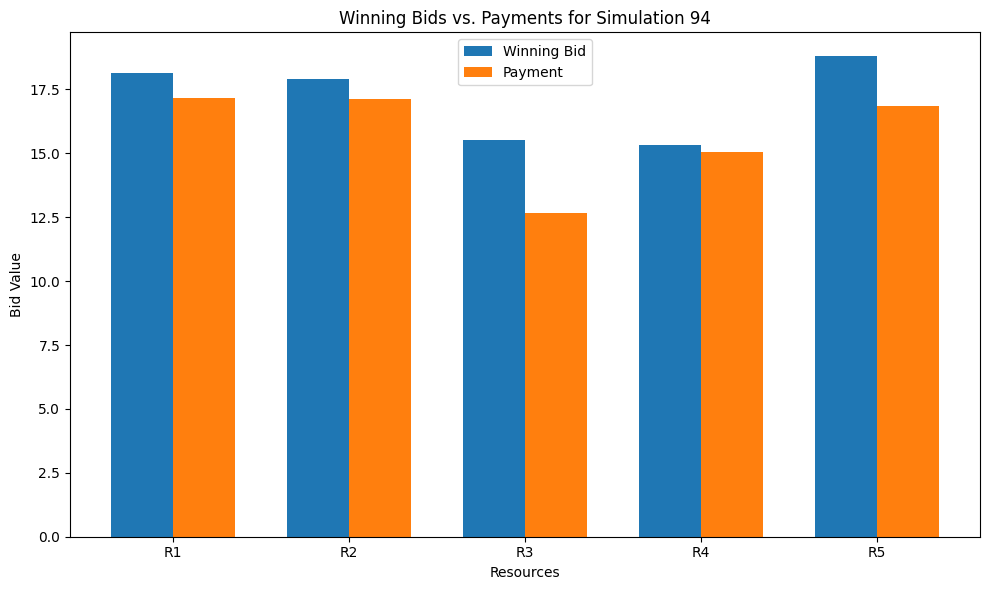

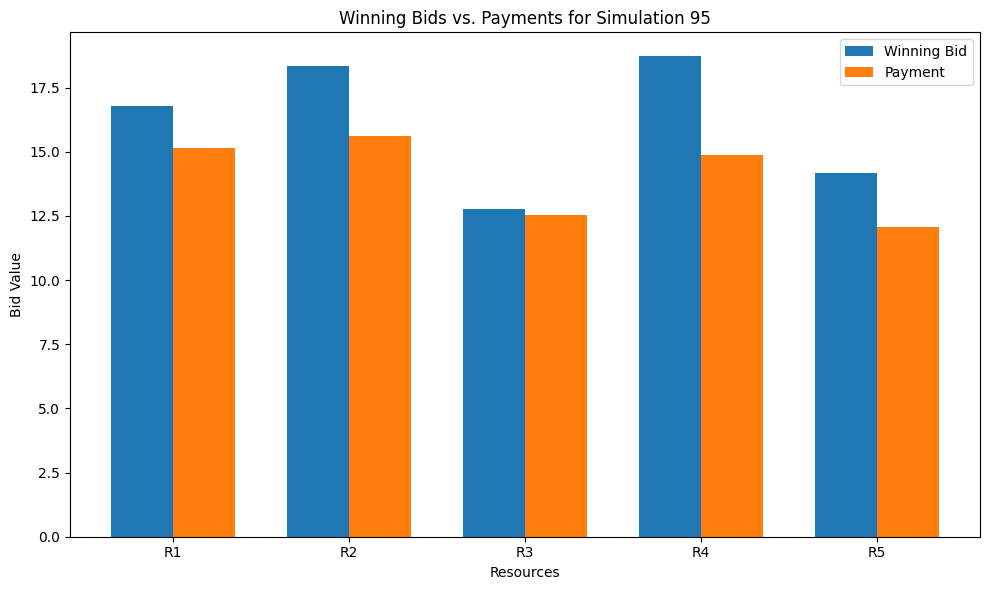

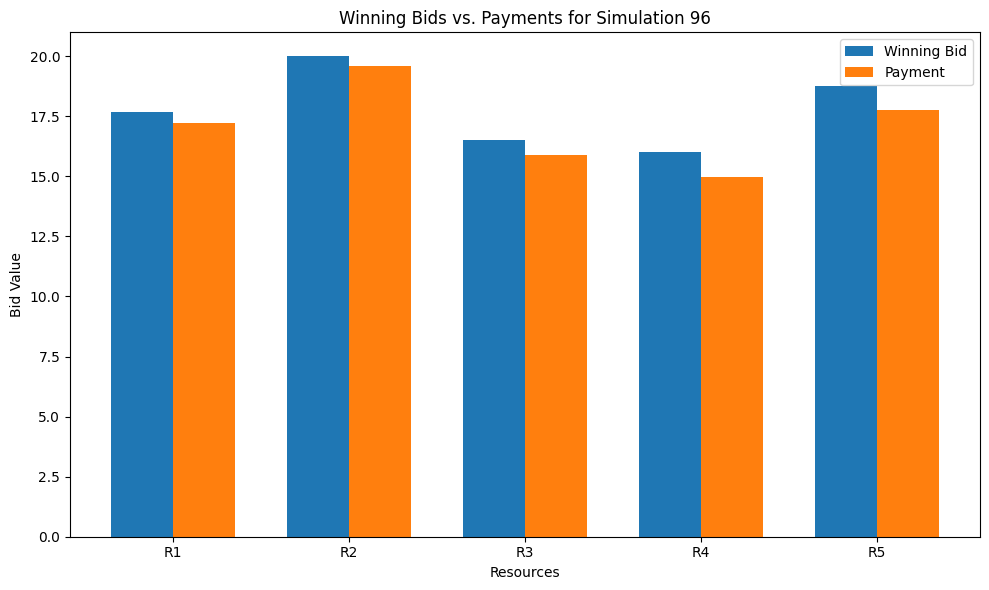

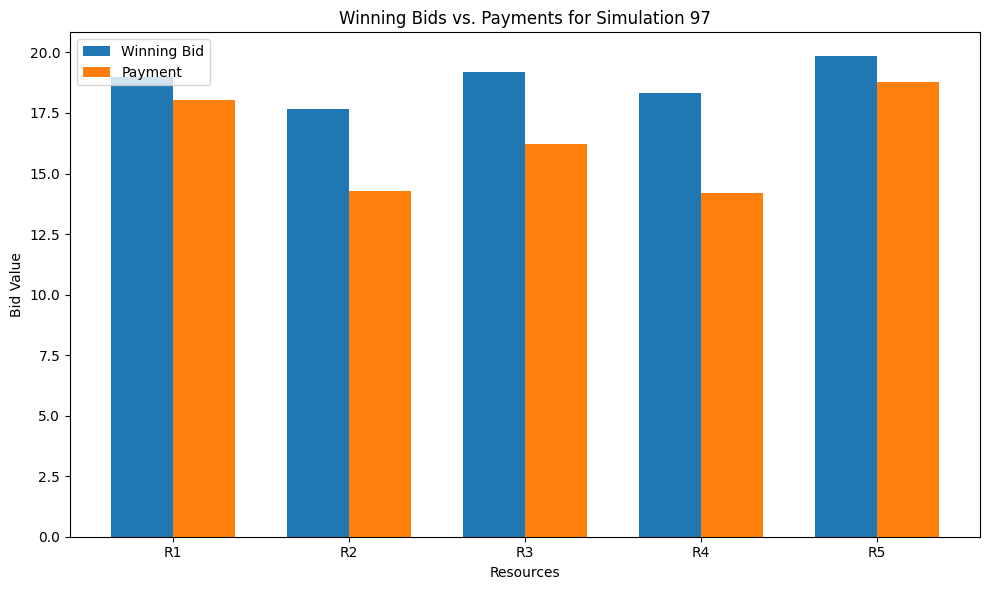

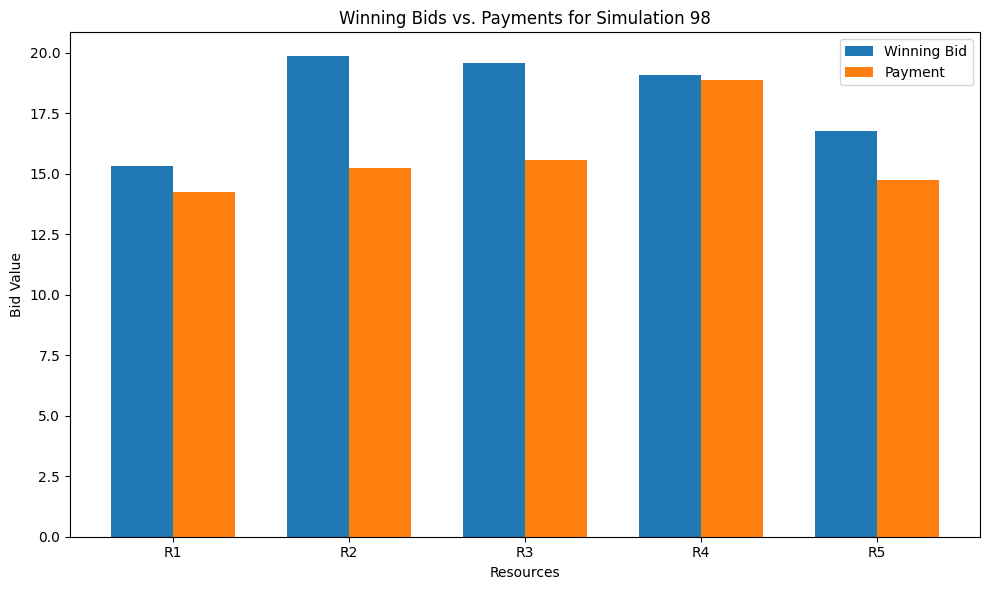

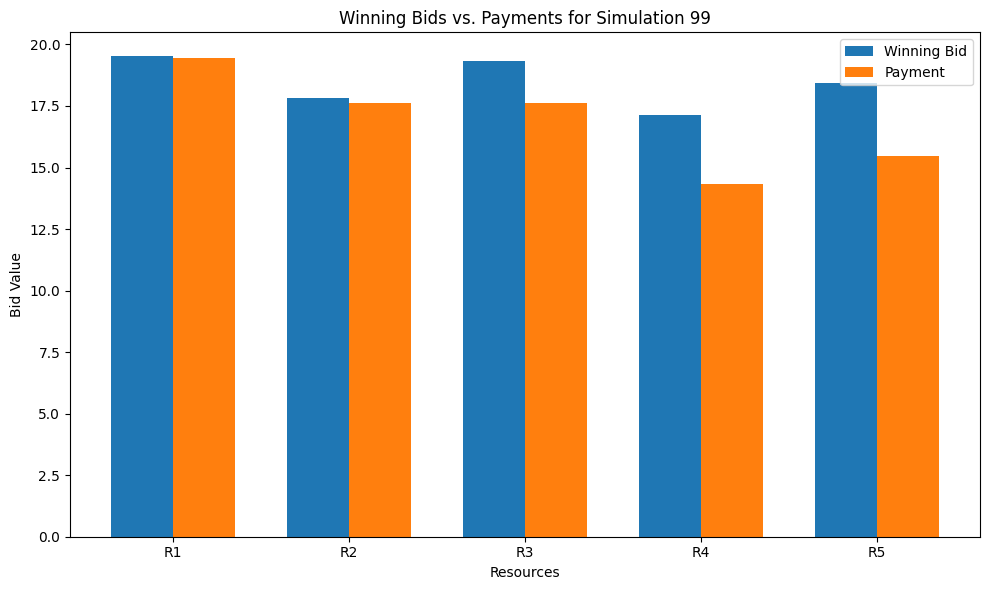

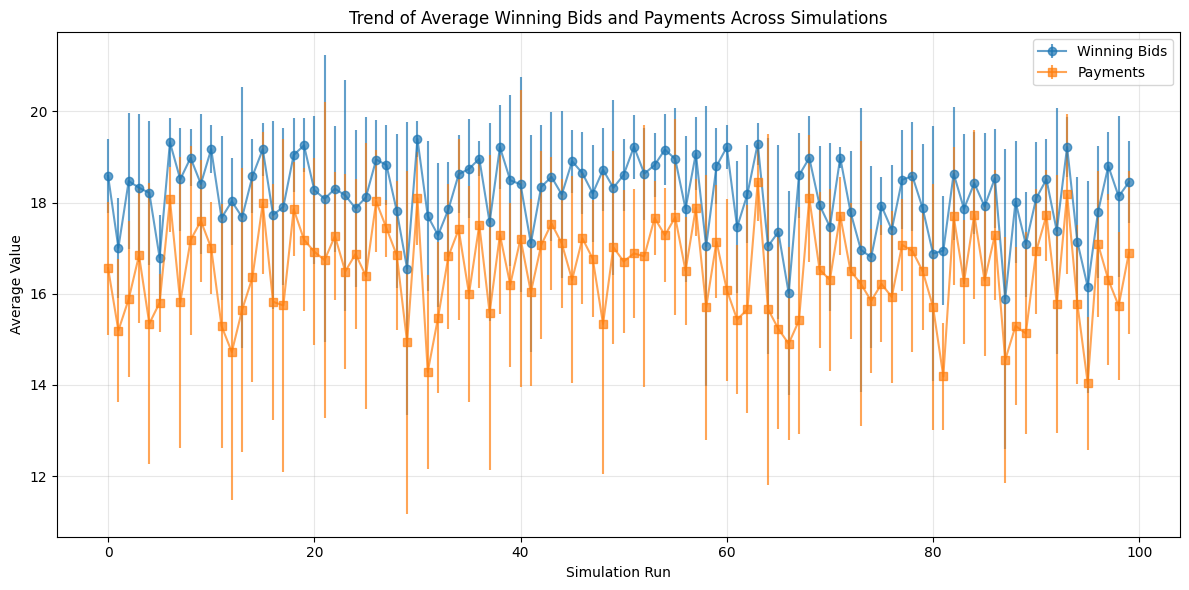

In [7]:
class QuantumResourceAuction:
    def __init__(self, resources, users, bids):
        """Initialize the auction with resources, users, and bids.
        
        Args:
            resources: List of quantum resources available for auction
            users: List of users participating in the auction
            bids: Dictionary with users as keys and lists of bids as values
        """
        self.resources = resources
        self.users = users
        self.bids = bids
        self.allocations = {}  # Maps resources to winning users
        self.payments = {user: 0 for user in users}  # Records payments by each user
        
    def run_auction(self):
        """Execute the second-price auction for all resources."""
        for resource_idx, resource in enumerate(self.resources):
            highest_bid = float('-inf')
            second_highest_bid = float('-inf')
            winner = None
            
            # Find highest and second-highest bids
            for user in self.users:
                bid = self.bids[user][resource_idx]
                
                if bid > highest_bid:
                    second_highest_bid = highest_bid
                    highest_bid = bid
                    winner = user
                elif bid > second_highest_bid:
                    second_highest_bid = bid
            
            # Allocate resource to winner
            if winner:
                self.allocations[resource] = winner
                self.payments[winner] += second_highest_bid
                
    def print_results(self):
        """Print the allocation results and payments."""
        print("\nResource Allocations:")
        for resource, user in self.allocations.items():
            print(f"Resource {resource} is allocated to User {user}")
        
        print("\nUser Payments:")
        for user, payment in self.payments.items():
            print(f"User {user} pays {payment:.2f}")
            
    def run_quantum_job(self):
        """Execute a quantum job on a simulator (represents using allocated resources)."""
        # Create a 5-qubit quantum circuit as described in the paper
        print("\nExecuting quantum job using allocated resources...")
        
        # Create a 5-qubit quantum circuit
        qc = QuantumCircuit(5, 5)
        
        # Apply Hadamard gate to the first qubit
        qc.h(0)
        
        # Apply CNOT gates to entangle qubits
        for i in range(1, 5):
            qc.cx(0, i)
        
        # Measure all qubits
        qc.measure(range(5), range(5))
        
        # Execute the circuit on a simulator
        simulator = Aer.get_backend('qasm_simulator')
        transpiled_circuit = transpile(qc, simulator)
        job = simulator.run(transpiled_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts(qc)
        
        print("Quantum Circuit:")
        print(qc)
        print("\nMeasurement outcomes:", counts)
        
        # In a real implementation, this would run on the allocated quantum resources
        return counts
        
    def visualize_results(self, simulation_id=0):
        """Visualize auction results."""
        # Plot winning bids vs payments
        resources_labels = [f"R{i+1}" for i in range(len(self.resources))]
        winning_bids = []
        payments = []
        
        for i, resource in enumerate(self.resources):
            if resource in self.allocations:
                winner = self.allocations[resource]
                winning_bids.append(self.bids[winner][i])
                
                # Calculate the second-highest bid (payment)
                bids_for_resource = [self.bids[user][i] for user in self.users if user != winner]
                payment = max(bids_for_resource) if bids_for_resource else 0
                payments.append(payment)
            else:
                winning_bids.append(0)
                payments.append(0)
                
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.arange(len(resources_labels))
        width = 0.35
        
        ax.bar(x - width/2, winning_bids, width, label='Winning Bid')
        ax.bar(x + width/2, payments, width, label='Payment')
        
        ax.set_xlabel('Resources')
        ax.set_ylabel('Bid Value')
        ax.set_title(f'Winning Bids vs. Payments for Simulation {simulation_id}')
        ax.set_xticks(x)
        ax.set_xticklabels(resources_labels)
        ax.legend()
        
        plt.tight_layout()
        return fig

def run_simulation(num_resources=5, num_users=10, min_bid=0, max_bid=20, simulation_id=0):
    """Run a single simulation of the quantum resource auction."""
    resources = [f"r{i+1}" for i in range(num_resources)]
    users = [f"u{i+1}" for i in range(num_users)]
    
    # Generate random bids for each user
    bids = {}
    for user in users:
        bids[user] = [random.uniform(min_bid, max_bid) for _ in range(num_resources)]
    
    # Create and run the auction
    auction = QuantumResourceAuction(resources, users, bids)
    auction.run_auction()
    
    # Print results for the first simulation or if requested
    if simulation_id == 0:
        print("\n===== Simulation Results =====")
        print("\nBid values:")
        print("User", end="\t")
        for r in range(num_resources):
            print(f"R{r+1}", end="\t")
        print()
        
        for user in users:
            print(f"{user}", end="\t")
            for bid in bids[user]:
                print(f"{bid:.1f}", end="\t")
            print()
        
        auction.print_results()
    
    # Run a quantum job as proof of concept
    if simulation_id == 0:
        quantum_results = auction.run_quantum_job()
    
    # Create visualization
    fig = auction.visualize_results(simulation_id)
    
    # Return auction results for aggregation
    return {
        'auction': auction,
        'winning_bids': [auction.bids[auction.allocations.get(r, users[0])][i] 
                        if r in auction.allocations else 0 
                        for i, r in enumerate(resources)],
        'payments': [max([auction.bids[u][i] for u in users if u != auction.allocations.get(r)])
                    if r in auction.allocations else 0 
                    for i, r in enumerate(resources)],
        'fig': fig
    }

def run_multiple_simulations(num_simulations=100, num_resources=5, num_users=10, min_bid=0, max_bid=20):
    """Run multiple simulations and analyze results."""
    all_winning_bids = []
    all_payments = []
    all_bids = []
    
    # Run simulations
    for i in range(num_simulations):
        results = run_simulation(num_resources, num_users, min_bid, max_bid, i)
        all_winning_bids.extend(results['winning_bids'])
        all_payments.extend(results['payments'])
        
        # Flatten all bids for histogram
        for user in results['auction'].users:
            all_bids.extend(results['auction'].bids[user])
    
    # Calculate averages
    avg_winning_bid = np.mean(all_winning_bids)
    avg_payment = np.mean(all_payments)
    
    print("\n===== Aggregate Results =====")
    print(f"Overall Average Winning Bid: {avg_winning_bid:.2f}")
    print(f"Overall Average Payment: {avg_payment:.2f}")
    
    # Plot histogram of all bids
    plt.figure(figsize=(10, 6))
    plt.hist(all_bids, bins=20, alpha=0.7, color='blue')
    plt.axvline(avg_winning_bid, color='r', linestyle='--', label=f'Avg Winning Bid: {avg_winning_bid:.2f}')
    plt.axvline(avg_payment, color='g', linestyle='--', label=f'Avg Payment: {avg_payment:.2f}')
    plt.xlabel('Bid Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of All Bids Across Simulations')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot trend of average winning bids and payments across simulations
    avg_winning_bids_per_sim = []
    avg_payments_per_sim = []
    std_winning_bids_per_sim = []
    std_payments_per_sim = []
    
    for i in range(num_simulations):
        results = run_simulation(num_resources, num_users, min_bid, max_bid, i)
        avg_winning_bids_per_sim.append(np.mean(results['winning_bids']))
        avg_payments_per_sim.append(np.mean(results['payments']))
        std_winning_bids_per_sim.append(np.std(results['winning_bids']))
        std_payments_per_sim.append(np.std(results['payments']))
    
    plt.figure(figsize=(12, 6))
    x = range(num_simulations)
    plt.errorbar(x, avg_winning_bids_per_sim, yerr=std_winning_bids_per_sim, 
                 fmt='o-', alpha=0.7, label='Winning Bids')
    plt.errorbar(x, avg_payments_per_sim, yerr=std_payments_per_sim, 
                 fmt='s-', alpha=0.7, label='Payments')
    plt.xlabel('Simulation Run')
    plt.ylabel('Average Value')
    plt.title('Trend of Average Winning Bids and Payments Across Simulations')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Run a single simulation and show detailed results
    print("Running a single simulation...")
    run_simulation()
    
    # Run multiple simulations for statistical analysis
    print("\nRunning multiple simulations for statistical analysis...")
    run_multiple_simulations(num_simulations=100)